<a href="https://colab.research.google.com/github/Johyeonje/Deep_Learning_Books/blob/master/2%EC%9E%A5_%EC%82%B0%ED%83%84%EB%8D%B0%EB%A5%B4_%EC%A0%9C%ED%92%88_%EC%B6%94%EC%B2%9C_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image

#2.1 경진대회 소개

* 문제 유형 : Multi-class Classification(다중 클래스 분류)
* 평가 척도 : Mean Average Precision @ 7
* **내용 : 고객의 과거 이력과 유사한 고객군들의 데이터를 기반으로 다음달에 해당 고객이 무슨 제품을 사용할지를 예측하는 문제**

상황
* 영업사원이 고객의 나이, 연봉, 자산, 결혼 유무, 거주 지역, 성격 등의 정보를 토대로 이상적인 자산 계획을 세워주고 적절한 금융 제품을 추천해주는 것 

#2.3 평가 척도

* 신규 구매 제품을 예측하는 것
  * 여기서 '신규 구매 제품'이란 지난달 기준으로 고객이 보유하고 있지 않은 금융 제품 중, 이번 달에 신규로 구매하게 되는 제품
* 제출해야 하는 것
  * 지난달(2016-05-28)에 고객이 보유하지 않은 제품 중 이번달(2016-06-28)에 구매할 것으로 예측되는 제품 상위 7개
* 고객 고유 식별 번호임 ncodpers와 함께 'ind'로 시작하는 24개 금융 제품 중 예상 제품 상위 7개를 공백으로 띄워 저장

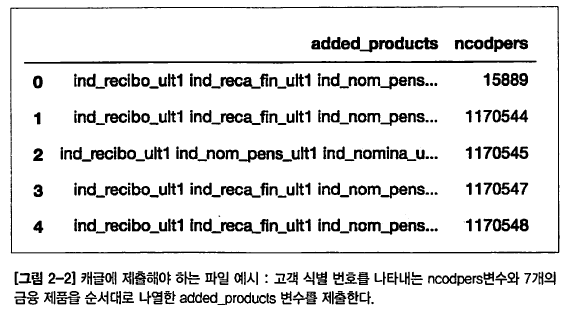

In [ ]:
Image('/content/drive/My Drive/DeepLearning/머신러닝 탐구생활/images/Santander_ex.png', width=700)

#### MAP@7(Mean Average Precision @ 7)
먼저 Average Precision이란?
: 예측 정확도의 평균   
ex) 7개의 금융 제품을 예측하는 경우 (1, 0, 0, 1, 1, 1, 0)이라고 예측했다고 하면   
```
# Prediction (예측 결과)
1 0 0 1 1 1 0
```
첫 번째에서는 1/1 = 100%, 두 세 번째는 오답이므로 0%, 네 번째 예측 결과물이 정답인 경우 정확도가 2/4 = 50%인 것이다.   
```
# Precision (예측 정확도)
1/1 0 0 2/4 3/5 4/6 0
```
이러한 예측 결과물의 Average Precision은 정확도의 합을 정답의 개수만큼 나눈 숫자이다.   
여기서 중요한 것은 예측 개수인 7로 나누는 것이 아니라 정답의 개수인 4로 정확도의 합을 나눈다는 것, 그러므로 이번 예측 결과물의 Average Precision은 0.69이다.
```
# Average Precision (예측 정확도의 평균)
(1/1 + 2/4 + 3/5 + 4/6) / 4 = 0.69
```

Mean Average Precision은 모든 예측 결과물의 Average Precision의 평균 값을 의미   
@7은 최대 7개의 금융 제품을 예측할 수 있다는 뜻   
이 방법은 예측 순서에 매우 예민한 평가 척도이다. 앞쪽에서 많이 맞출 수록 더 좋은 점수를 받기 때문   

mapk()의 입력 값인 actual, predicted는 (고객 수*7)의 dimension을 갖는 list of list이다. 7개의 금융 제품명이 숫자 목록 형태로 저장되고, 이러한 목록이 고객 수 만큼 있는 list of list 이다.

###MAP@7 평가 척도를 구하는 코드

In [ ]:
import numpy as np

def apk(actual, predicted, k=7, default=0.0):
  # MAP@7 이므로 최대 7개만 사용
  if len(predicted) > k:
    predicted = predicted[:k]

  score = 0.0
  num_hits = 0.0

  for i, p in enumerate(predicted):
    # 점수를 부여하는 조건은 다음과 같다 :
    # 예측 값이 정답에 있고 ('p in actual')
    # 예측 값이 중복이 아니면 ('p not in predicted[:i]')
    if p in actual and p not in predicted[:i]:
      num_hits += 1.0
      score += num_hits / (i+1.0)

  # 정답 값이 공백일 경우, 무조건 0.0점을 반환
  if not actual:
    return default

  # 정답의 개수(len(actual))로 average precision을 구한다.
  return score / min(len(actual), k)

def mapk(actual, predicted, k=7, default=0.0):
  #list of list인 정답 값(actual)과 예측 값(predicted)에서 고객별 Average Precision을 구하고
  #np.mean()을 통해 평균을 계산한다.
  return np.mean([apk(a, p, k, default) for a, p in zip(actual, predicted)])

#2.4 주요 접근

데이터 형태 : Tabular 형태의 시계열(Time-series)
* 시계열 데이터 : 기본적으로 'A라는 시간에 B라는 고객이 C라는 제품을 구매했다.'라는 정보가 담긴 데이터를 의미. 데이터에는 고객 B에 대한 다양한 정보가 포함됨.   
ex) 나이, 직업유무, 결혼유무, 고객등급, 거주지역, 국적 등..   
뿐만아니라 C라는 제품에 대한 정보고 포함   
ex) 가격, 인기도, 제품의 분류, 특징 등   


모델이 예측해야 하는 정답 값을 식별하는데 도움이 되는 정보가 많은 데이터가 양질의 데이터이다.

##데이터 전처리 작업이 필수

* 데이터 노이즈 제거
  * 결측값 제거(NA 혹은 nan)
  * 변수 분포를 따르지 않는 이상치(outlier)
  * 사람의 실수로 인해 잘못 입력된 값
  * 개인정보 보호를 위해 익명화된 변수 등..

## 피처 엔지니어링 필수

: 기존에 주어진 변수들을 제외한 파생 변수를 생성하는 기술   
lag 데이터 : 과거 시간 정보를 활용하는 것

#2.5 데이터 준비

In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c santander-product-recommendation
!unzip /content/sample_submission.csv.zip
!unzip /content/test_ver2.csv.zip
!unzip /content/train_ver2.csv.zip

Saving kaggle.json to kaggle.json
 94% 201M/214M [00:01<00:00, 97.9MB/s]
100% 214M/214M [00:02<00:00, 108MB/s] 
  0% 0.00/2.28M [00:00<?, ?B/s]
100% 2.28M/2.28M [00:00<00:00, 155MB/s]
 40% 5.00M/12.4M [00:00<00:00, 33.2MB/s]
100% 12.4M/12.4M [00:00<00:00, 60.7MB/s]
Archive:  /content/sample_submission.csv.zip
  inflating: sample_submission.csv   
Archive:  /content/test_ver2.csv.zip
  inflating: test_ver2.csv           
Archive:  /content/train_ver2.csv.zip
  inflating: train_ver2.csv          


#2.6 탐색적 분석

In [ ]:
import pandas as pd
import numpy as np

trn = pd.read_csv('/content/train_ver2.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
trn.shape

(13647309, 48)

In [ ]:
trn.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


###변수별 따로 확인하기

변수의 데이터 타입도 동시에 확인할 수 있다.

In [ ]:
for col in trn.columns:
  print('{}\n'.format(trn[col].head()))

0    2015-01-28
1    2015-01-28
2    2015-01-28
3    2015-01-28
4    2015-01-28
Name: fecha_dato, dtype: object

0    1375586
1    1050611
2    1050612
3    1050613
4    1050614
Name: ncodpers, dtype: int64

0    N
1    N
2    N
3    N
4    N
Name: ind_empleado, dtype: object

0    ES
1    ES
2    ES
3    ES
4    ES
Name: pais_residencia, dtype: object

0    H
1    V
2    V
3    H
4    V
Name: sexo, dtype: object

0     35
1     23
2     23
3     22
4     23
Name: age, dtype: object

0    2015-01-12
1    2012-08-10
2    2012-08-10
3    2012-08-10
4    2012-08-10
Name: fecha_alta, dtype: object

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ind_nuevo, dtype: float64

0          6
1         35
2         35
3         35
4         35
Name: antiguedad, dtype: object

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: indrel, dtype: float64

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: ult_fec_cli_1t, dtype: object

0    1
1    1
2    1
3    1
4    1
Name: indrel_1mes, dtype: obje

* fecha_dato : 날짜를 기록하는 변수로 datetime이 아닌 object이다.
* age : 나이를 기록하는 변수로 정수 값이 아닌 object이다. 전처리에서 정수로 변환 필요
* renta : 가구 총수입을 나타내는 renta 변수는 소수값을 가진다. NaN을 포함

In [ ]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

###info 분석

RangeIndex : 행의 크기   
Data columns : 열의 크기   
   
,# 0 ~ 23 : 고객 관련 변수   
,# 24 ~ 47 : 금융 제품 변수   
   
데이터타입   
object는 주로 string이 포함된 값을 의미   
나머지는 그 자체

그 외에 데이터 항목들에 대한 이해가 필요하다.

###수치형 / 범주형 변수

int64, float64 의 데이터 타입을 갖는 수치형 변수를 num_cols로 추출하고 describe()로 간단한 통계를 내본다.

In [ ]:
num_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['int64', 'float64']]
trn[num_cols].describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07


위와 같은 통계 값을 보고 다음과 같은 분석을 할 수 있다.

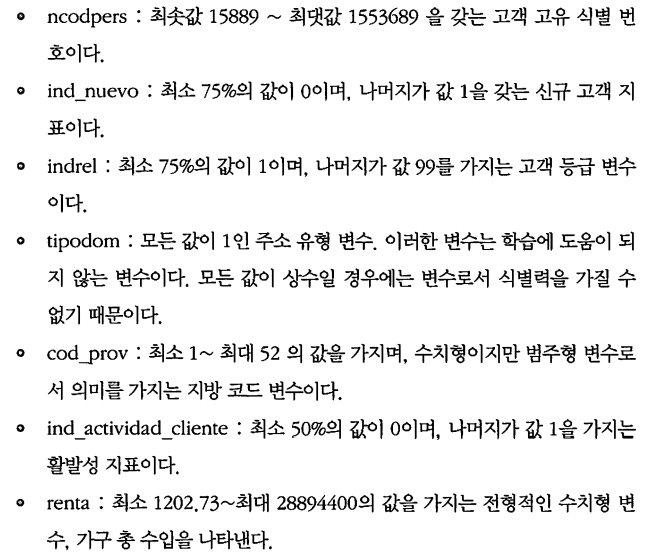

In [ ]:
Image('/content/drive/My Drive/DeepLearning/머신러닝 탐구생활/images/describe_trn.png', width=600)

범주형 변수 살펴보기

In [ ]:
cat_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['object']]
trn[cat_cols].describe()

,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,13647309,13619575,13619575,13619505,13647309,13619575,13647309,24793,13497528.0,13497528,13619575,13619575,1808,13461183,13619575,13553718,13457941
unique,17,5,118,2,235,6756,507,223,13.0,5,2,2,2,162,2,52,3
top,2016-05-28,N,ES,V,23,2014-07-28,0,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,931453,13610977,13553710,7424252,542682,57389,134335,763,7277607.0,7304875,13553711,12974839,1791,4055270,13584813,4409600,7960220


top : 가장 빈도가 많은 수   
freq : top의 빈도 수

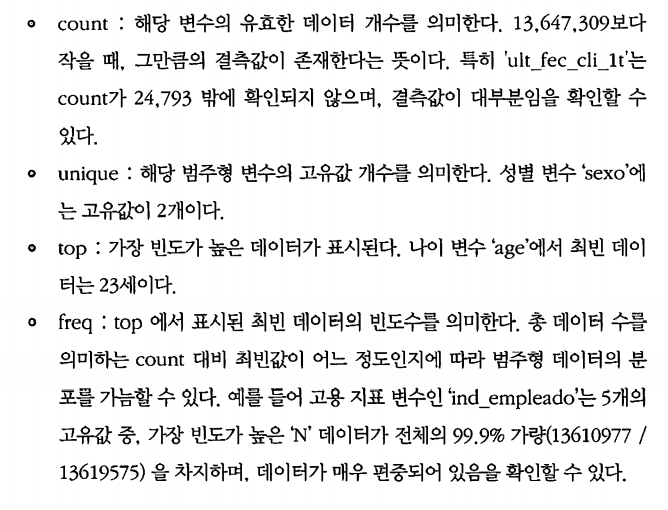

In [ ]:
Image('/content/drive/My Drive/DeepLearning/머신러닝 탐구생활/images/describe_trn2.png', width=600)

`note`   
* age가 수치형이 아닌 범주형이다.   
* 은행 누적 거리 기간도 범주형이다.


범주형 변수의 고유값 출력 해보기

In [ ]:
for col in cat_cols:
  uniq = np.unique(trn[col].astype(str))
  print('-' * 50)
  print('# col {}, n_uniq {}, uniq {}'.format(col, len(uniq), uniq))

--------------------------------------------------
# col fecha_dato, n_uniq 17, uniq ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
--------------------------------------------------
# col ind_empleado, n_uniq 6, uniq ['A' 'B' 'F' 'N' 'S' 'nan']
--------------------------------------------------
# col pais_residencia, n_uniq 119, uniq ['AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AU' 'BA' 'BE' 'BG' 'BM' 'BO' 'BR' 'BY'
 'BZ' 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CZ'
 'DE' 'DJ' 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES' 'ET' 'FI' 'FR' 'GA' 'GB'
 'GE' 'GH' 'GI' 'GM' 'GN' 'GQ' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HU' 'IE'
 'IL' 'IN' 'IS' 'IT' 'JM' 'JP' 'KE' 'KH' 'KR' 'KW' 'KZ' 'LB' 'LT' 'LU'
 'LV' 'LY' 'MA' 'MD' 'MK' 'ML' 'MM' 'MR' 'MT' 'MX' 'MZ' 'NG' 'NI' 'NL'
 'NO' 'NZ' 'OM' 'PA' 'PE' 'PH' 'PK' 'PL' 'PR' 'PT' 'PY' 'Q

범주형의 특성 확인해보기 (첫 3개 변수)

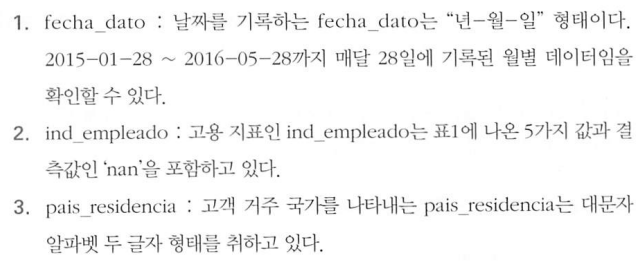

In [ ]:
Image('/content/drive/My Drive/DeepLearning/머신러닝 탐구생활/images/describe_trn3.png', width=600)

**내가 해본 자료 분석**
4. sexo : 성별을 의미하는 것으로 보이는 sexo 는 'H', 'V'와 'nan을 포함하고 있다.
5. age : 나이를 의미하는 age에는 1부터 164까지 높은 숫자 폭을 보이며 NA 역시 포함하고 있다. 164는 사실상 존재하기 힘든 숫자이므로 고객에 대한 정보가 만료되지 않은 것으로 추정된다. 이는 int형으로 변환하여도 예측에 긍정적인 영향을 미치기 어렵다고 판단된다.
6. fecha_alpha : 1995년 부터 2016년 정도의 날짜를 기록하는 데이터로 '년-월-일' 형태이다. nan 값을 포함한다.
7. antiguedad : 정수값으로 구성되는 것으로 보이는 자료형인데 -999999라는 이상치가 존재하여 처리가 필요할 것으로 보인다.
8. ult_fec_cli_1t : 2015년에서 2016년 정도의 날짜를 기록하는 데이터로 '년-월-일' 형태이다. nan 값을 포함한다.
9. indrel_1mes : ['1' '1.0' '2' '2.0' '3' '3.0' '4' '4.0' 'P' 'nan'] 의 정수와 실수, 'P'라는 값과 nan을 포함하는 자료이다. 등급같은 것을 나타내는 것으로 보인다.
10. tiprel_1mes : ['A' 'I' 'N' 'P' 'R' 'nan'] 의 한 개의 문자나 nan를 포함하는 자료이다.
11. canal_entrada : 네 가지 정도의 세자리 정수 조합을 포함하여 대부분의 'K'로 시작하는 세자리 문자 조합을 갖는 자료이다. nan을 포함한다.
12. indfall : 'N', 'S' 와 nan을 포함하는 자료이다.
13. nomprov : nan을 포함하는 문자열들의 자료이다.
14. segmento : ['01 - TOP' '02 - PARTICULARES' '03 - UNIVERSITARIO' 'nan'] 의 01, 02, 03 처럼 단계를 의미하는 듯한 정보와 nan을 포함하는 자료이다.

**실제 자료 분석**

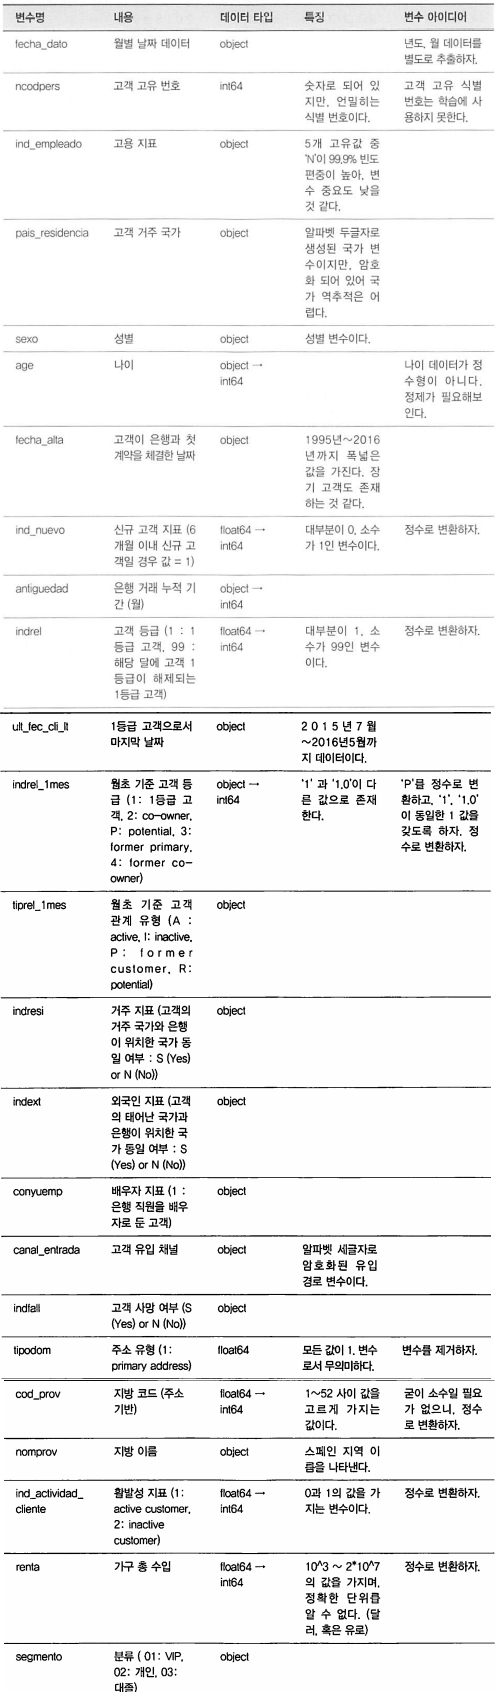

In [ ]:
Image('/content/drive/My Drive/DeepLearning/머신러닝 탐구생활/images/describe_trn4.png', width=600)

###시각화로 데이터 살펴보기

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# Jupyter Notebook 내부에 그래프를 출력하도록 설정
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


####변수를 막대 그래프로 시각화하기

고객 고유 식별 번호인 'ncodpers'와 총 수입인 'renta'는 고유값이 너무 많으므로 스킵한다.

--------------------------------------------------
col :  fecha_dato


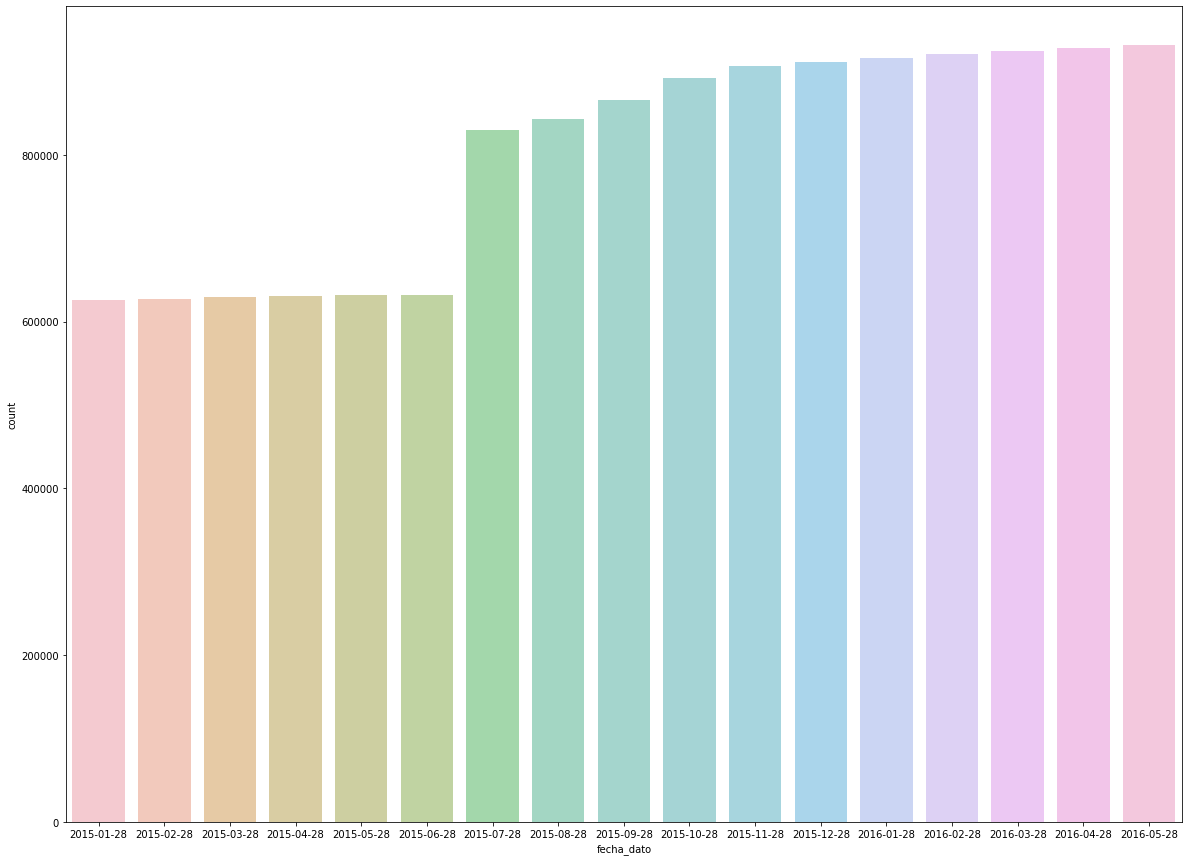

--------------------------------------------------
col :  ind_empleado


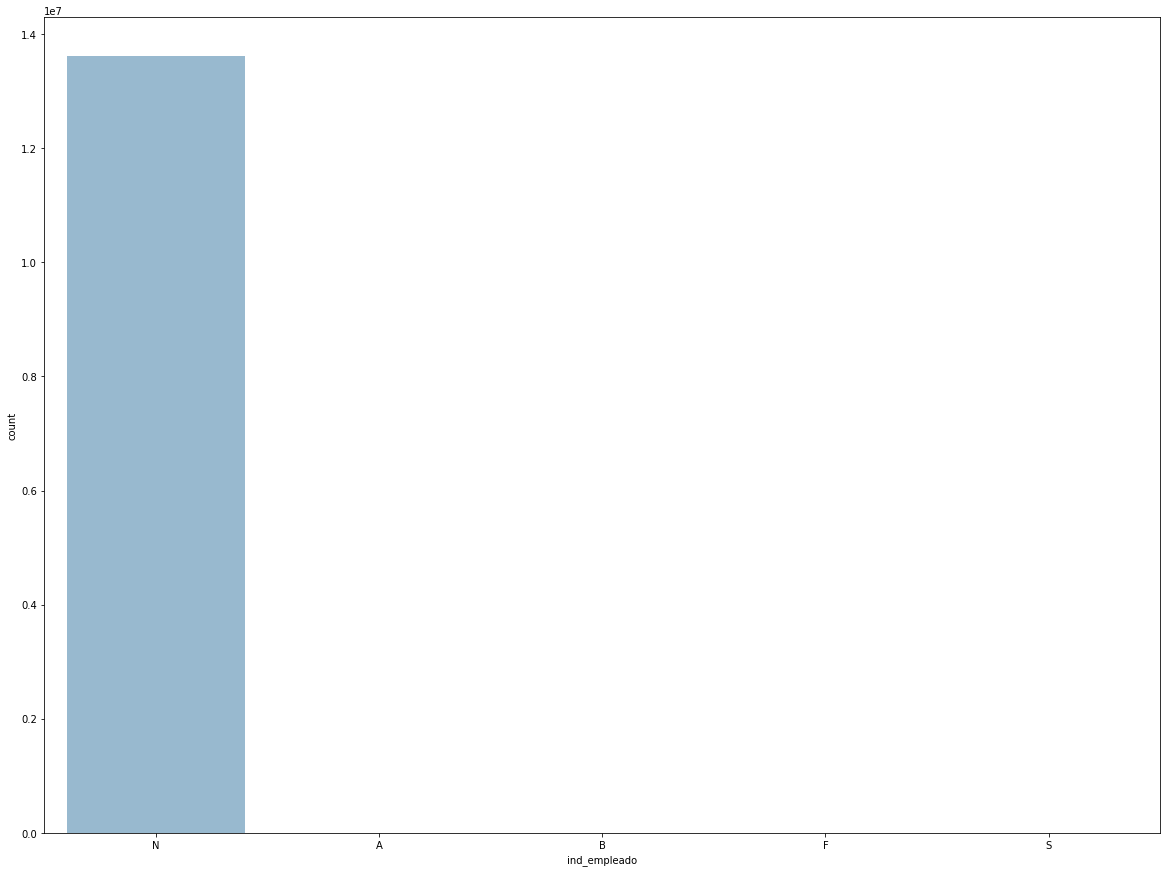

--------------------------------------------------
col :  pais_residencia


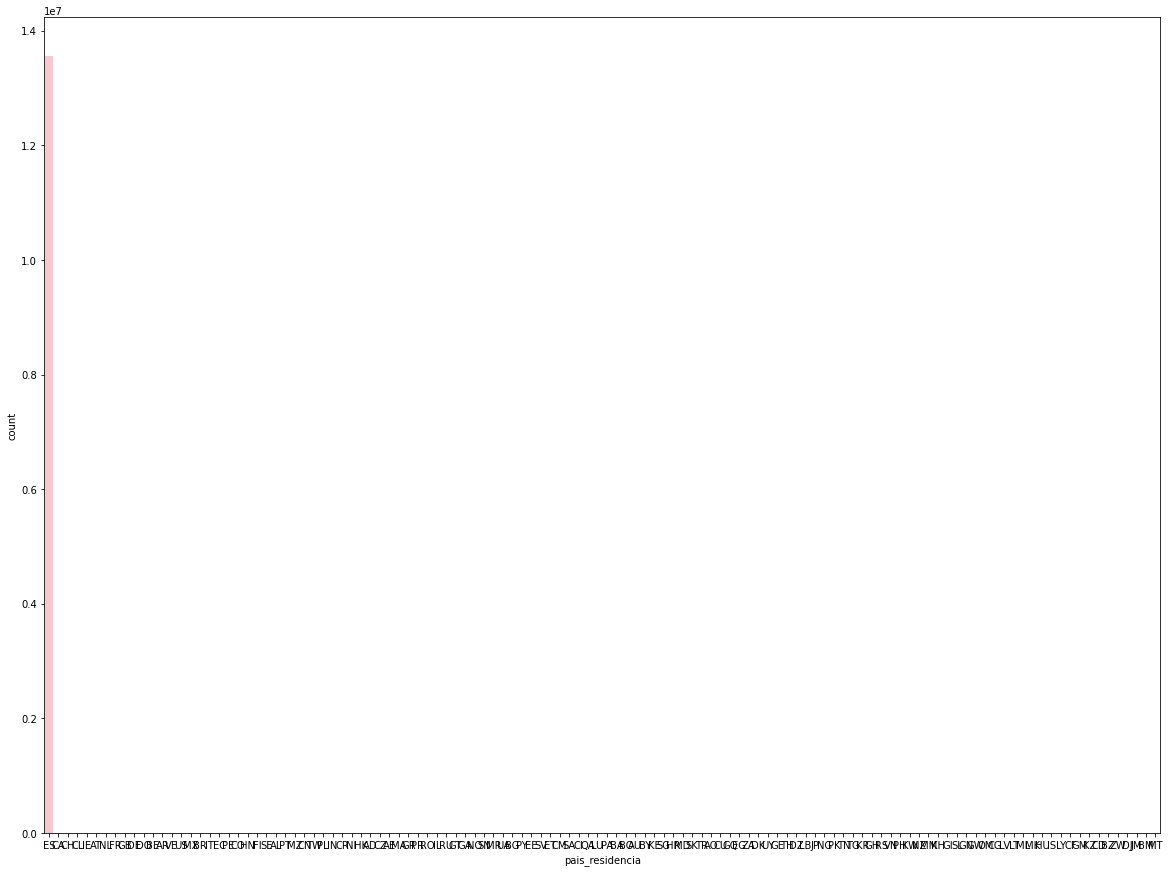

--------------------------------------------------
col :  sexo


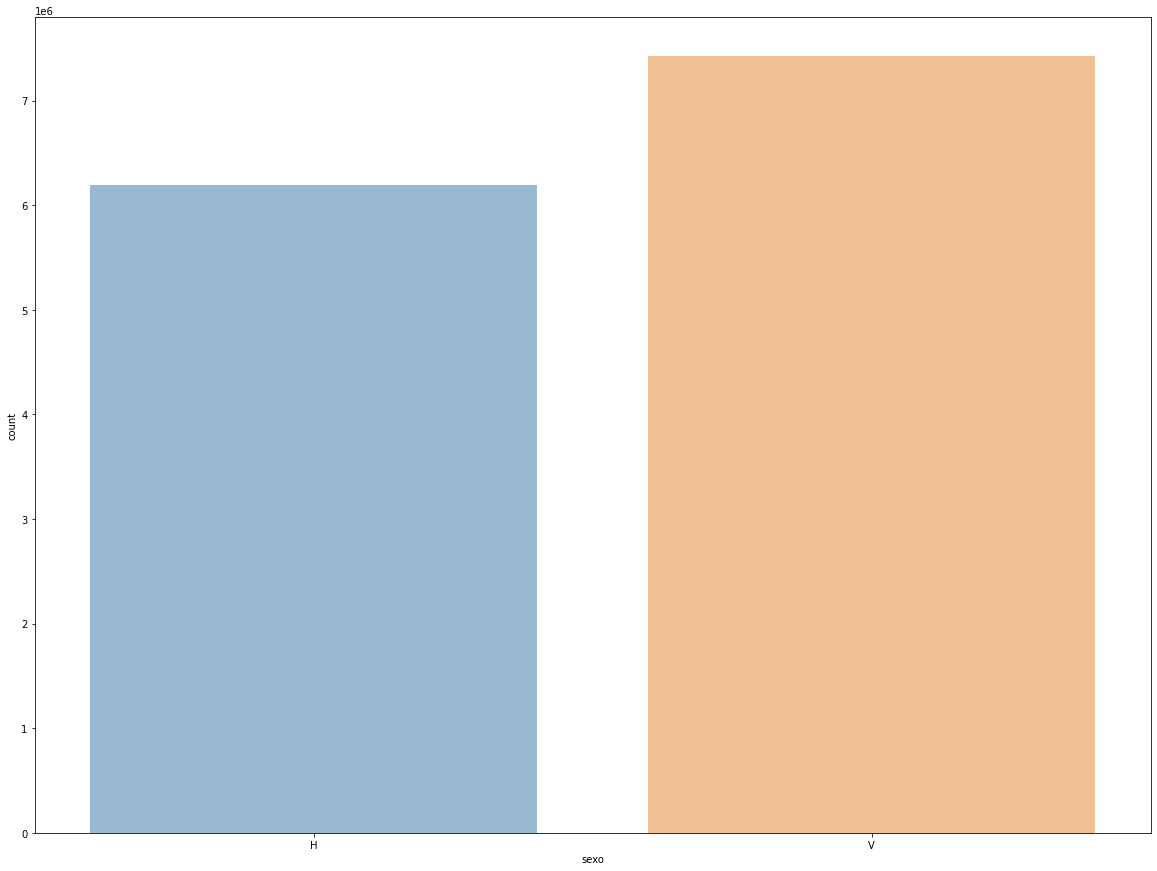

--------------------------------------------------
col :  age


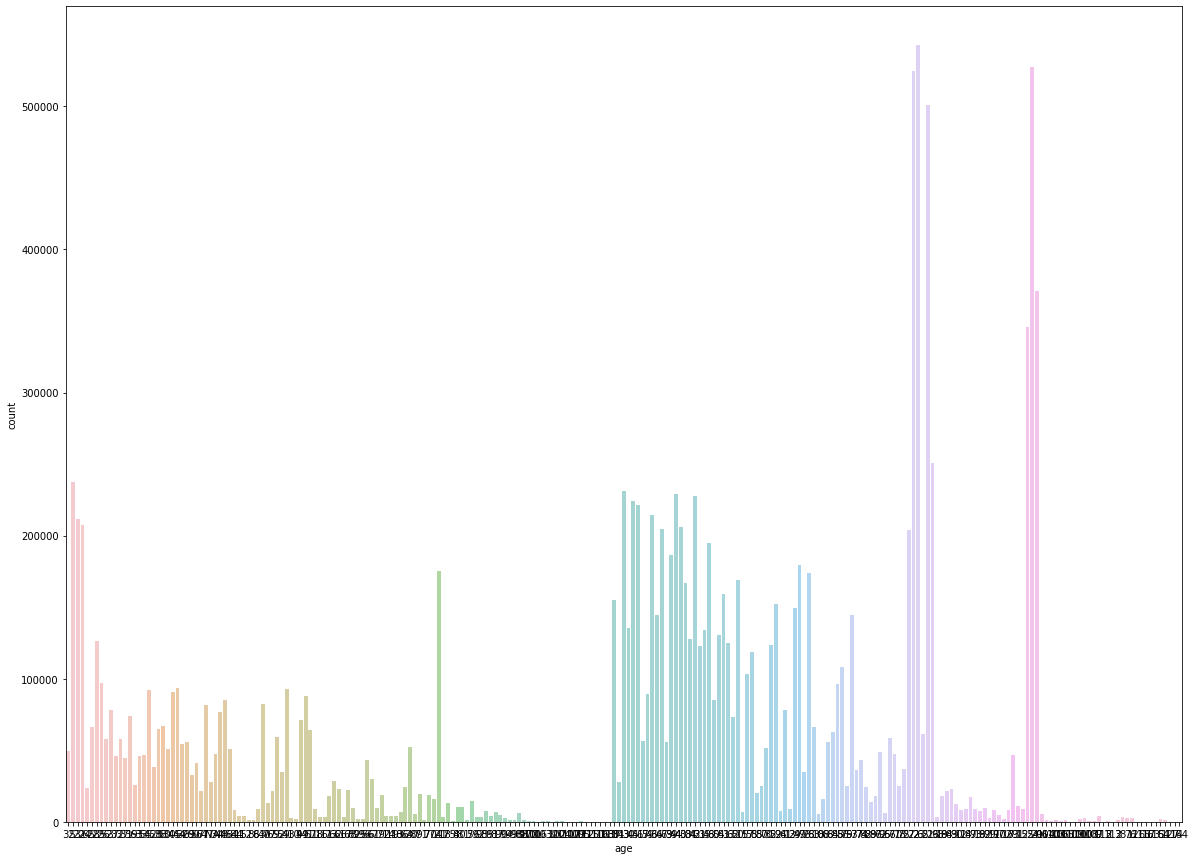

--------------------------------------------------
col :  fecha_alta


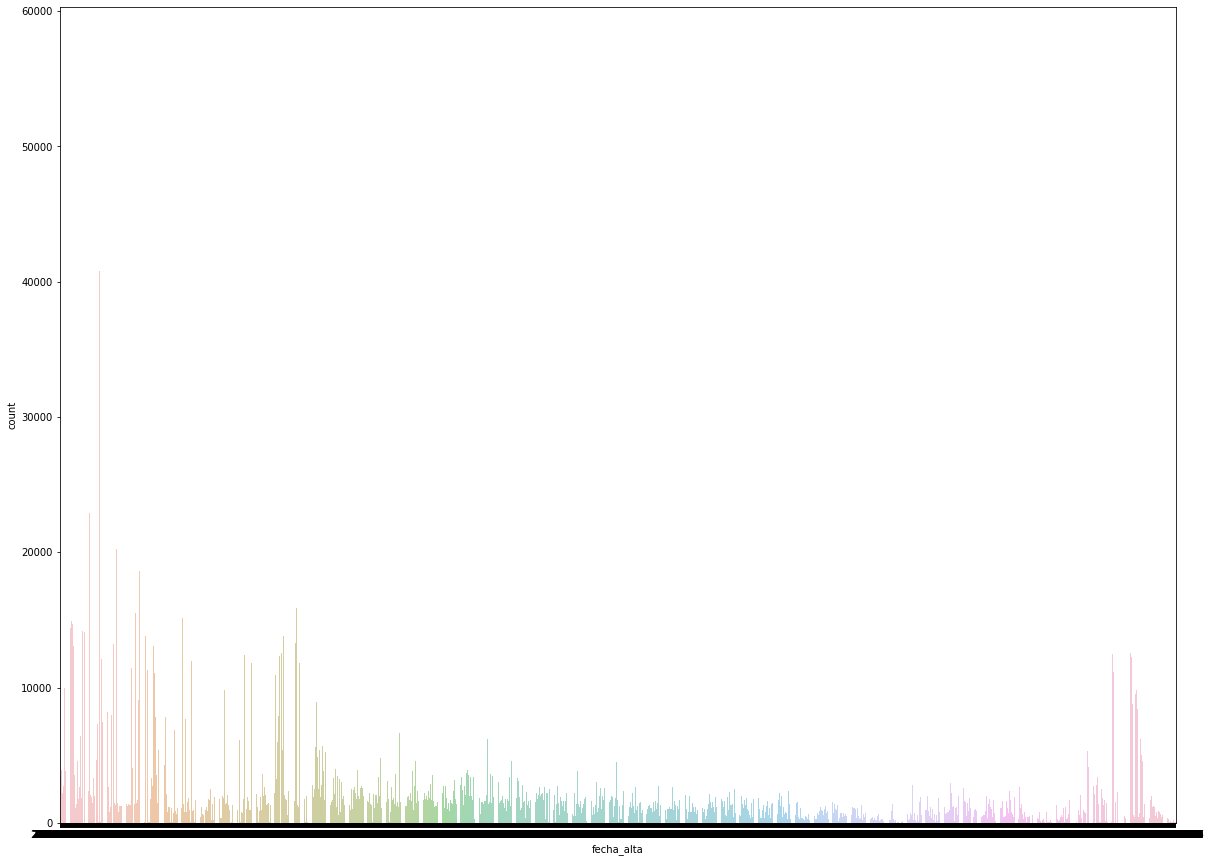

--------------------------------------------------
col :  ind_nuevo


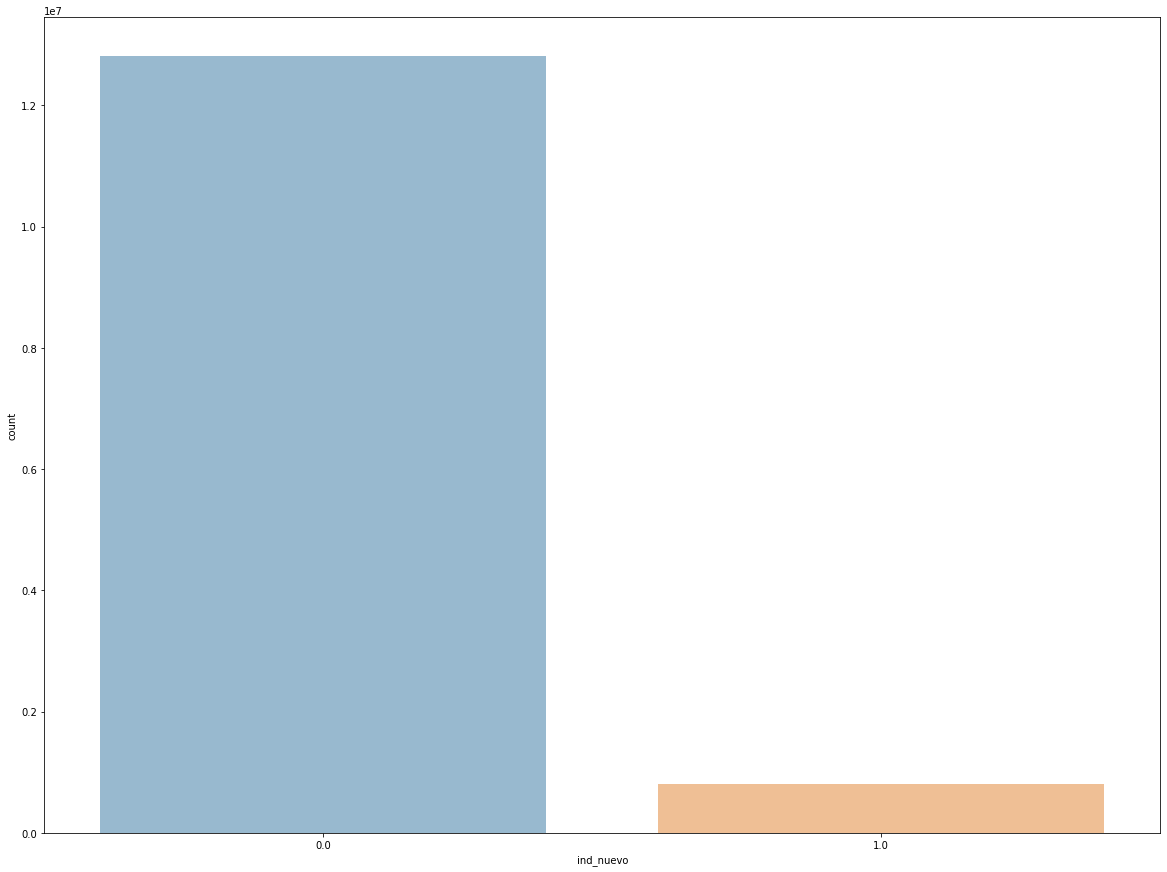

--------------------------------------------------
col :  antiguedad


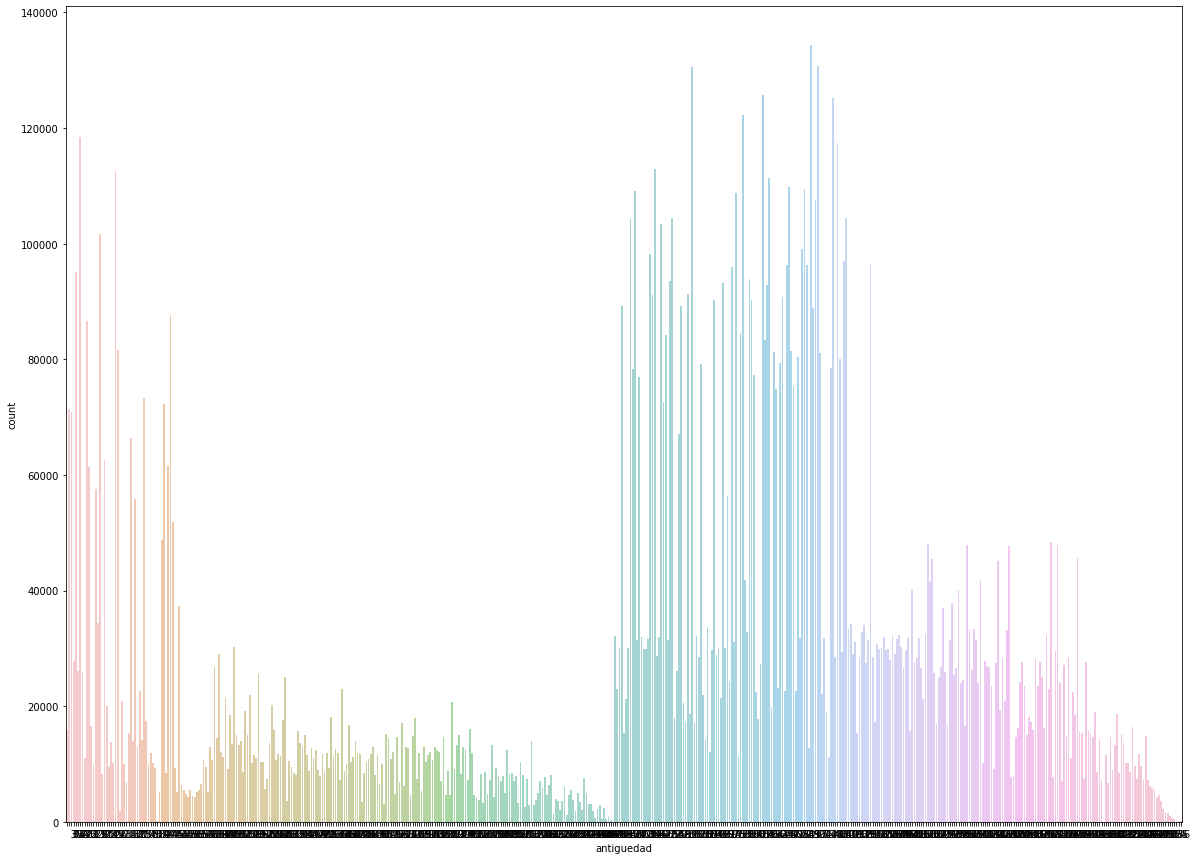

--------------------------------------------------
col :  indrel


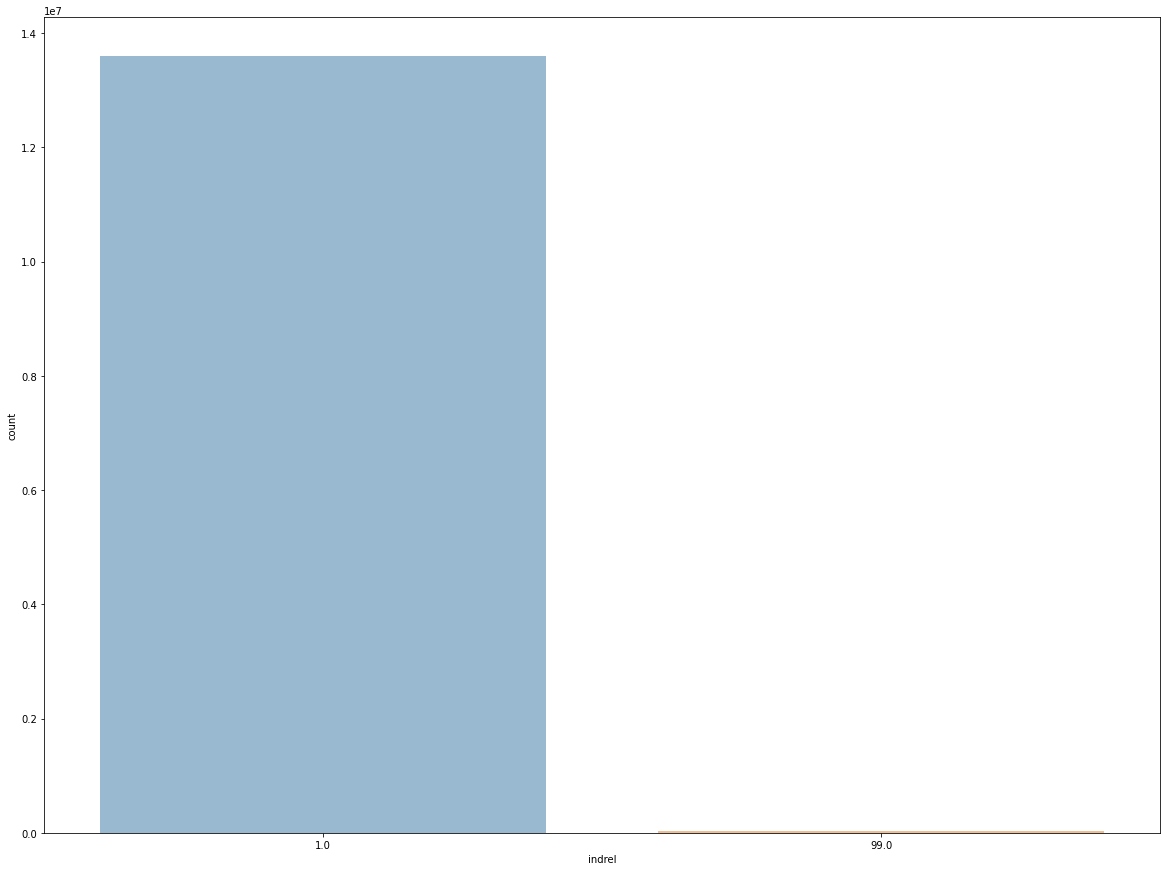

--------------------------------------------------
col :  ult_fec_cli_1t


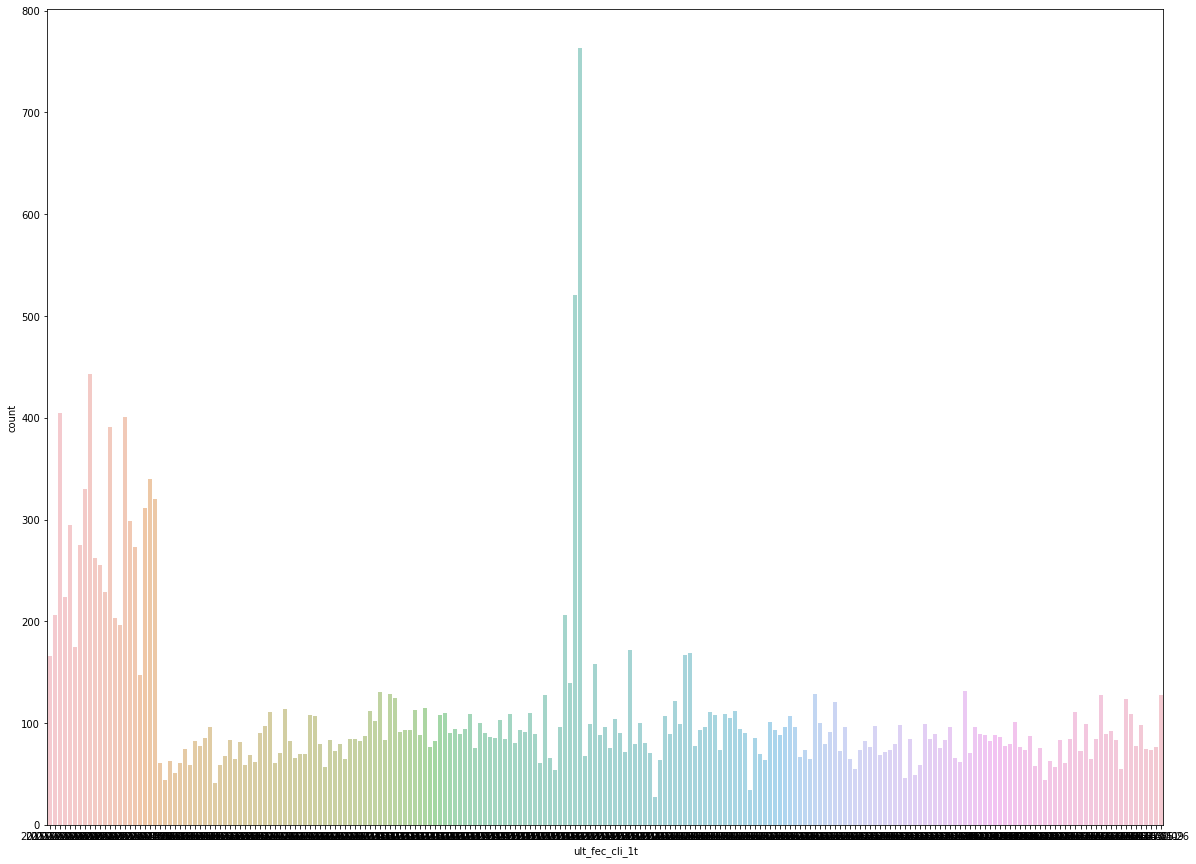

--------------------------------------------------
col :  indrel_1mes


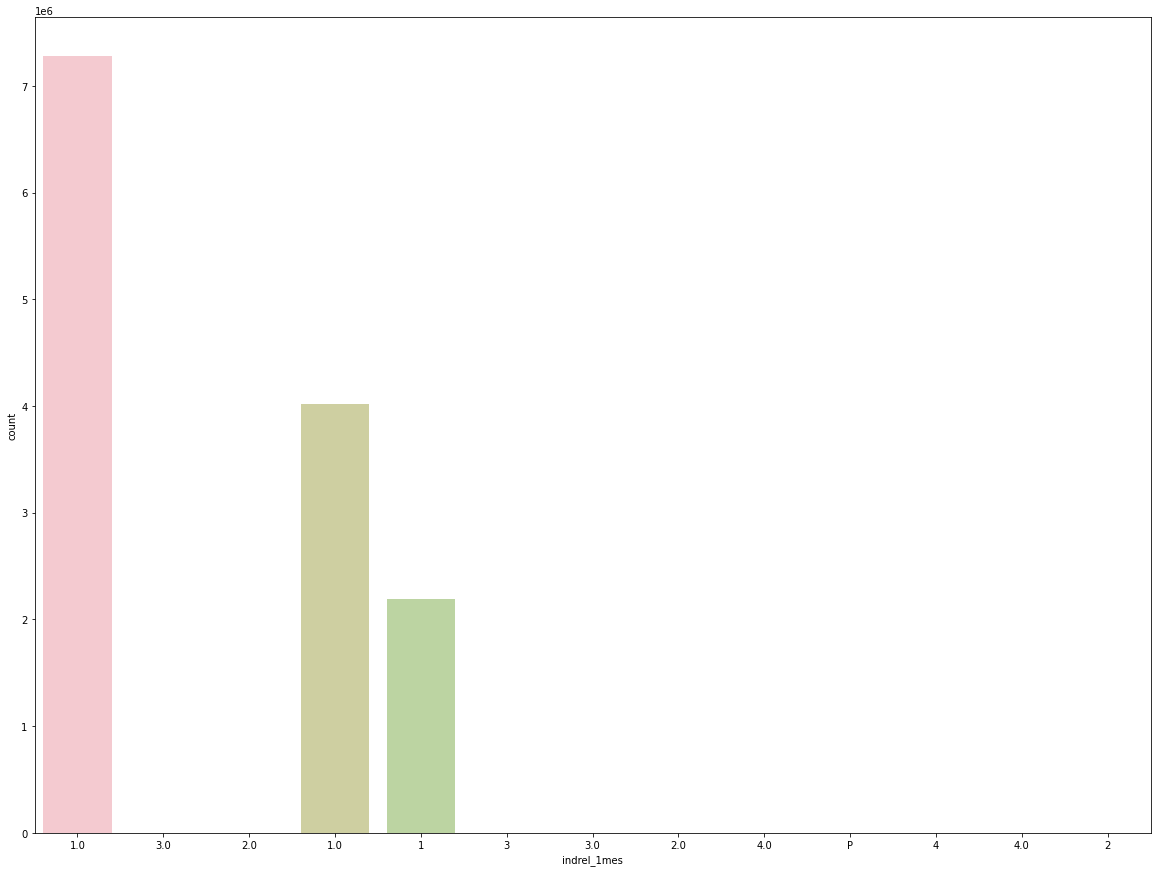

--------------------------------------------------
col :  tiprel_1mes


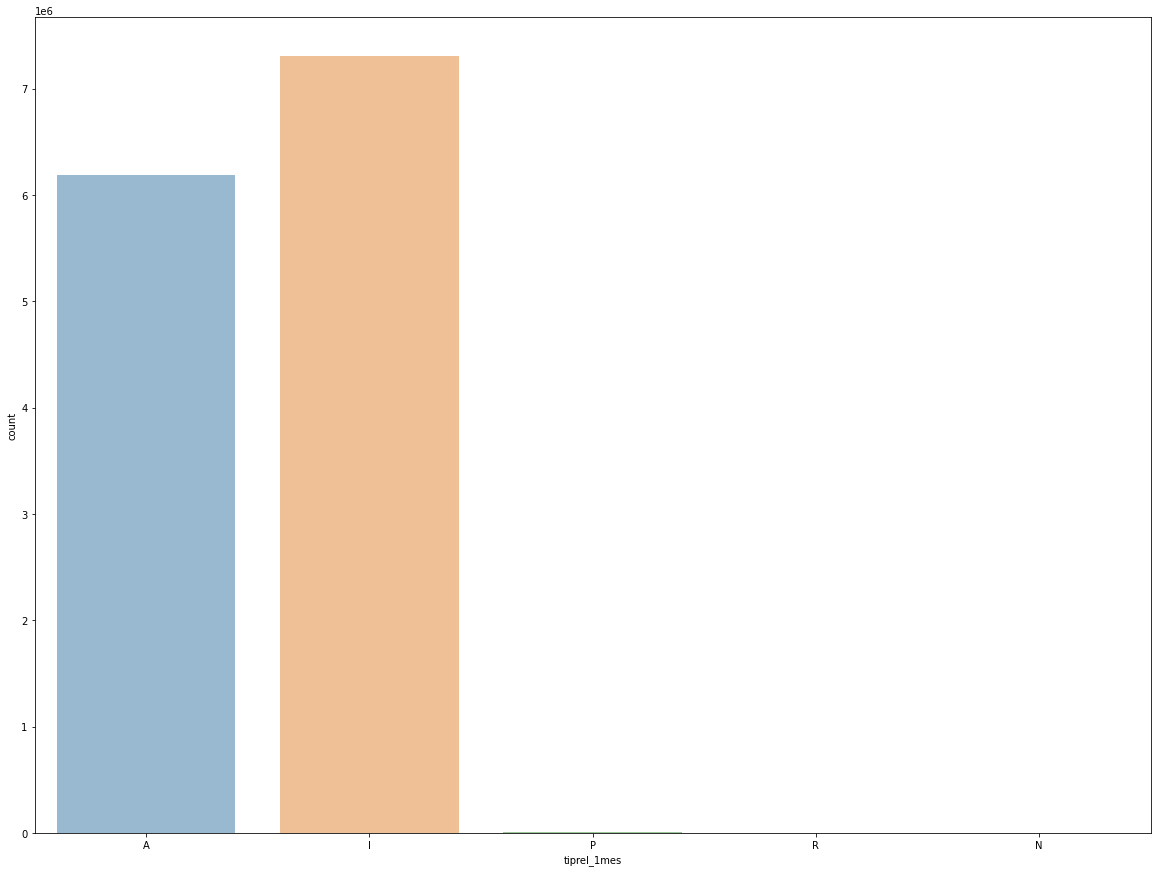

--------------------------------------------------
col :  indresi


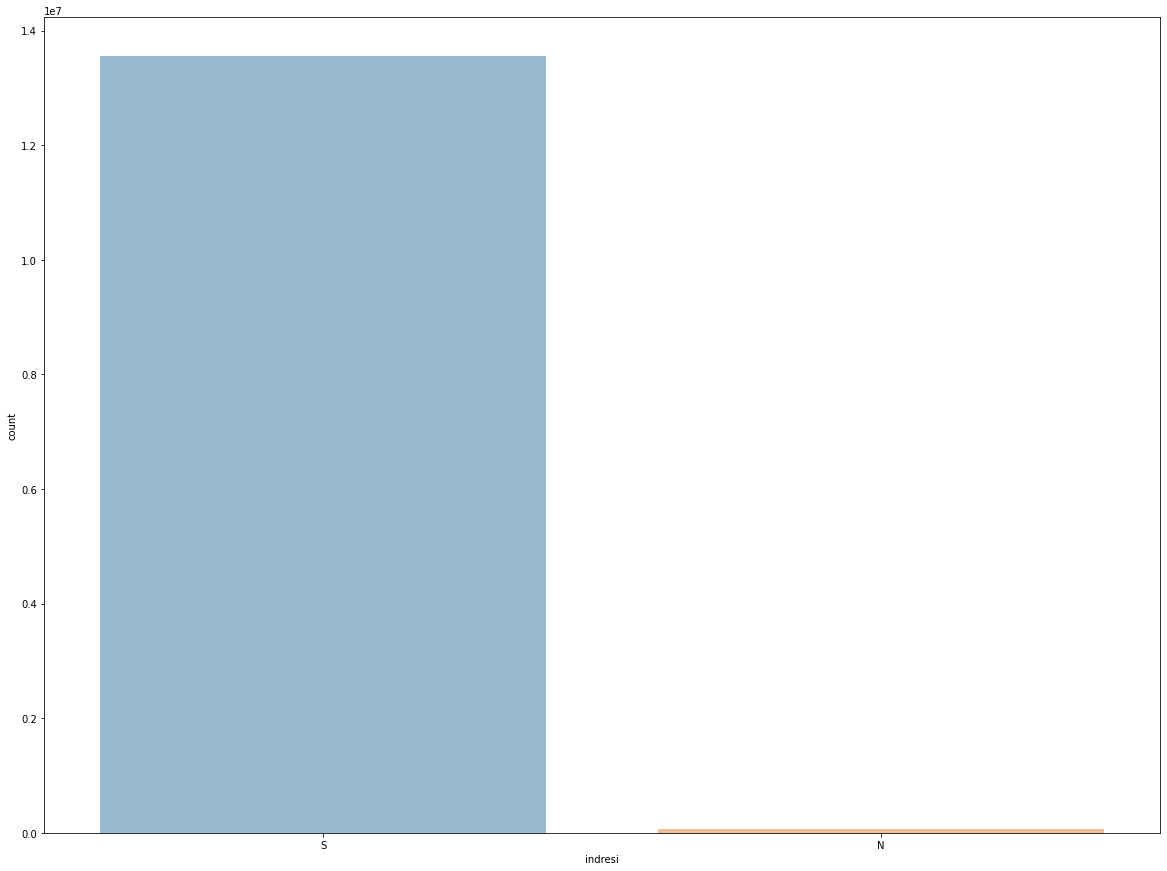

--------------------------------------------------
col :  indext


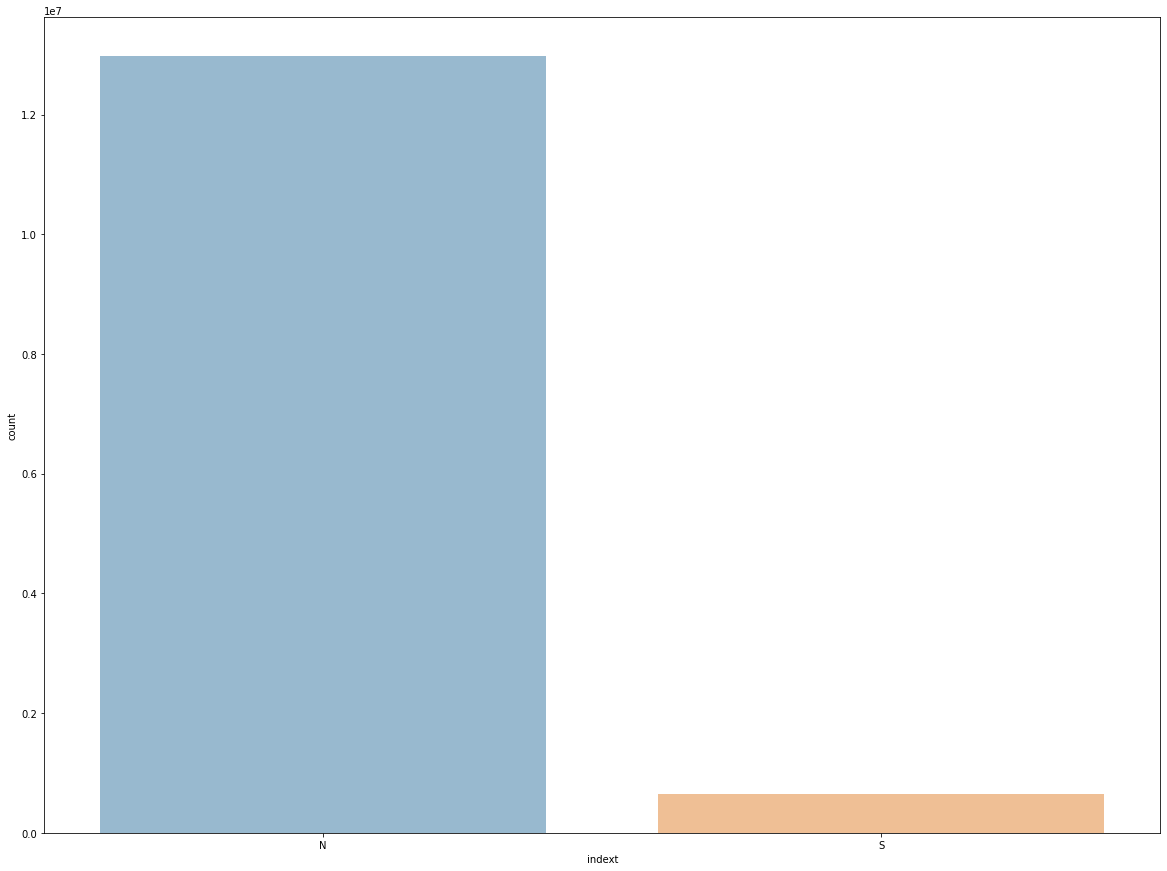

--------------------------------------------------
col :  conyuemp


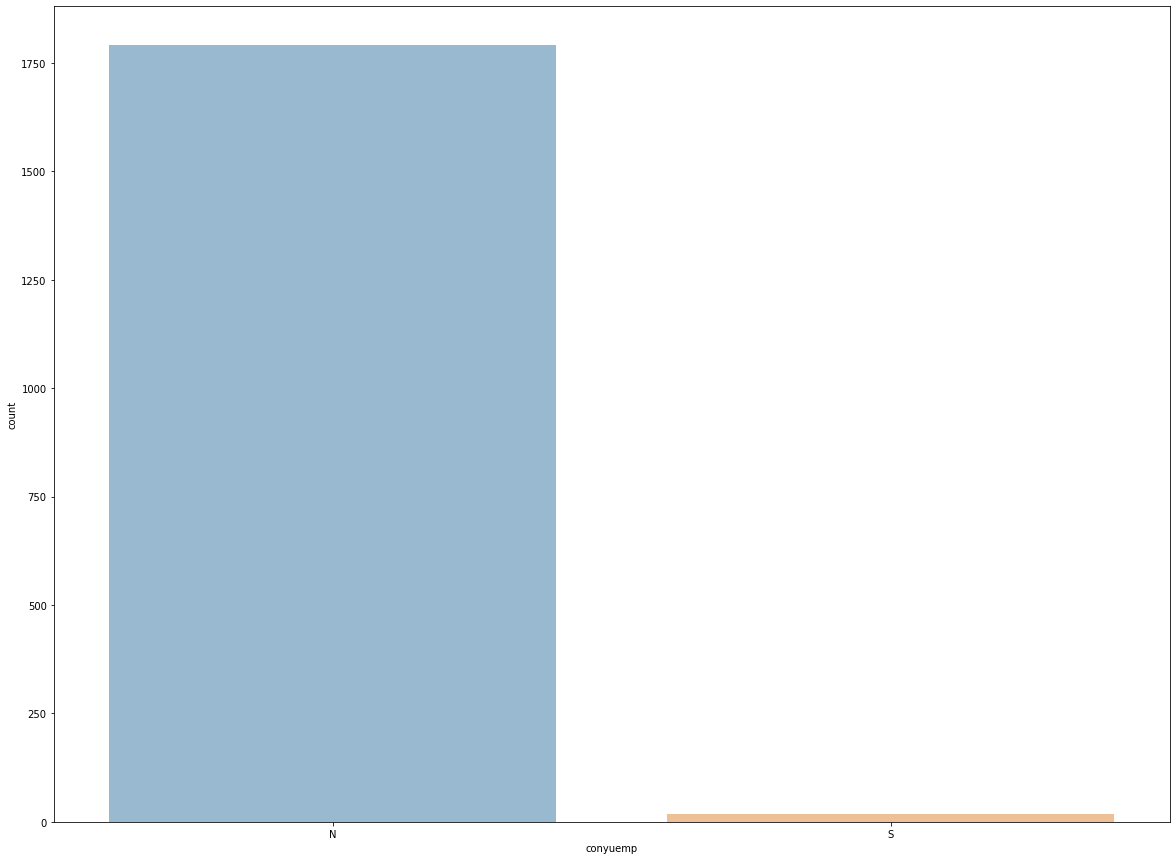

--------------------------------------------------
col :  canal_entrada


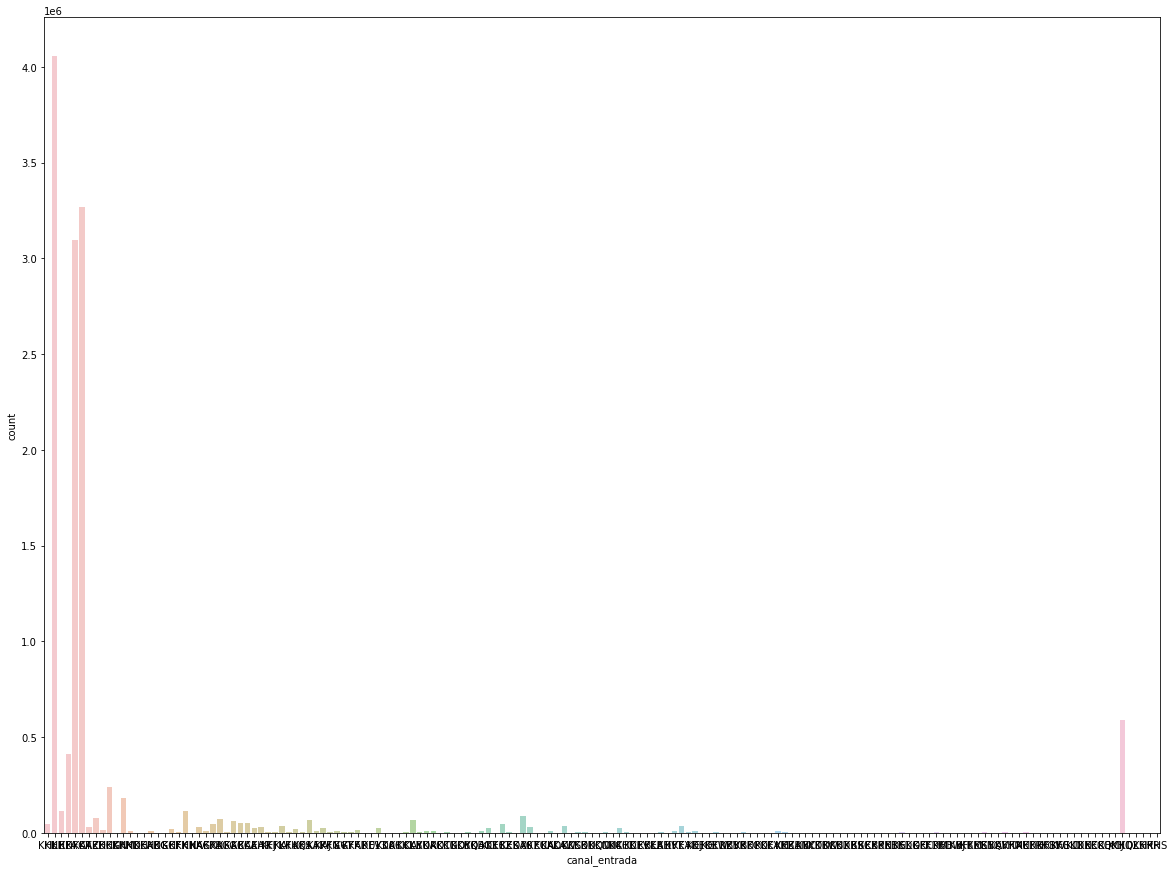

--------------------------------------------------
col :  indfall


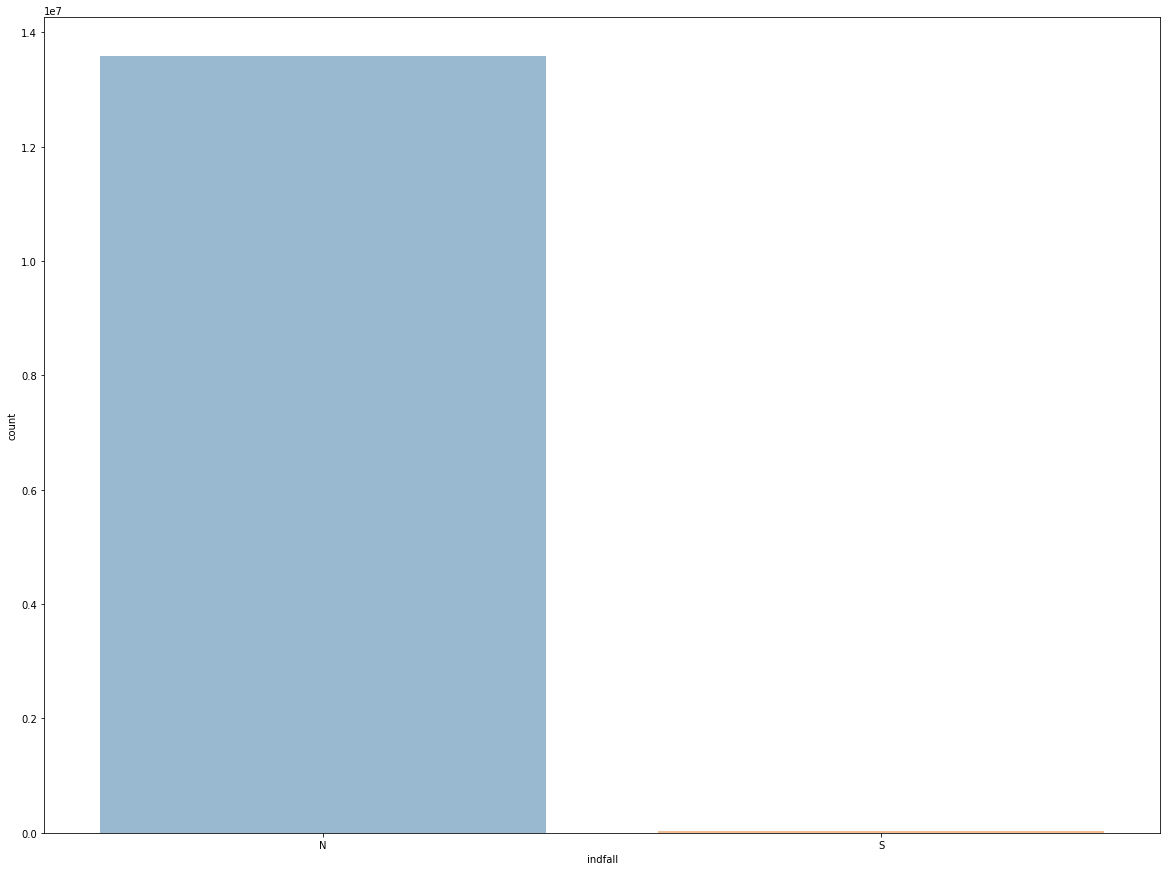

--------------------------------------------------
col :  tipodom


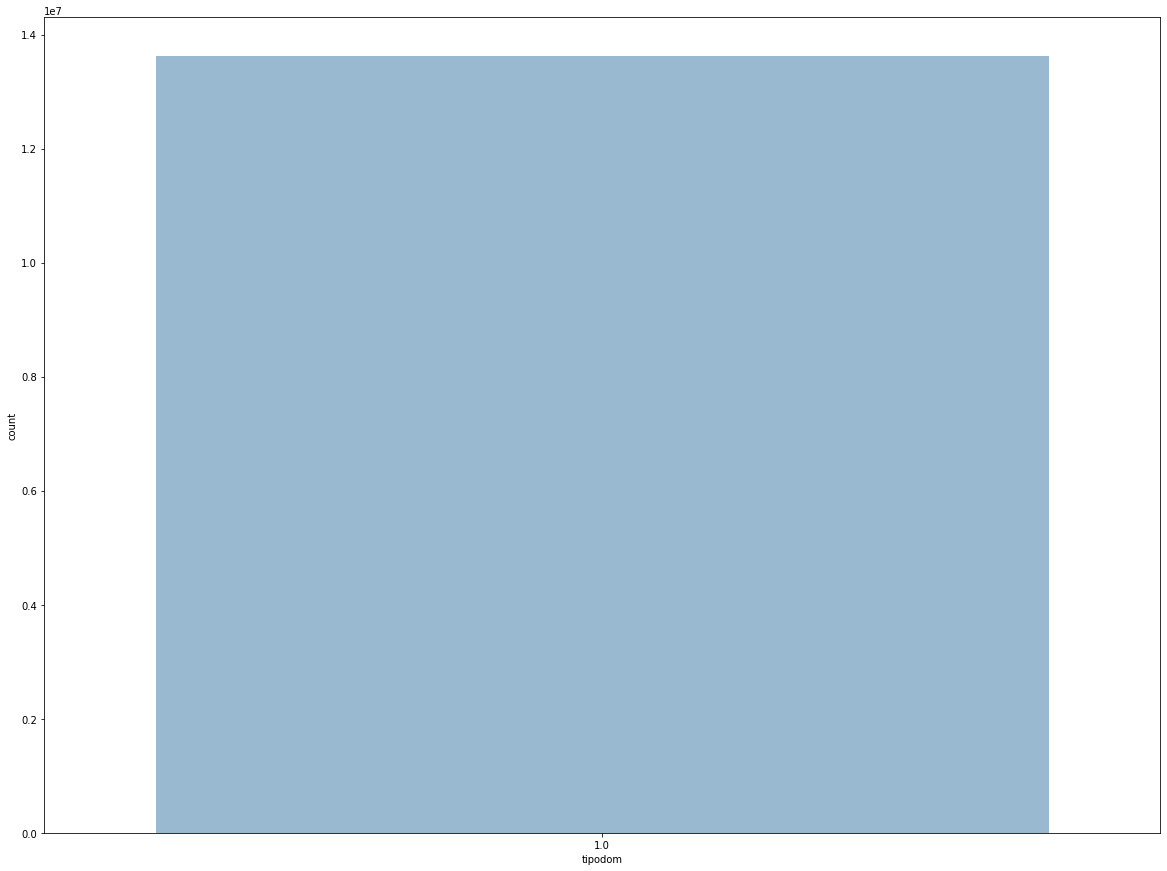

--------------------------------------------------
col :  cod_prov


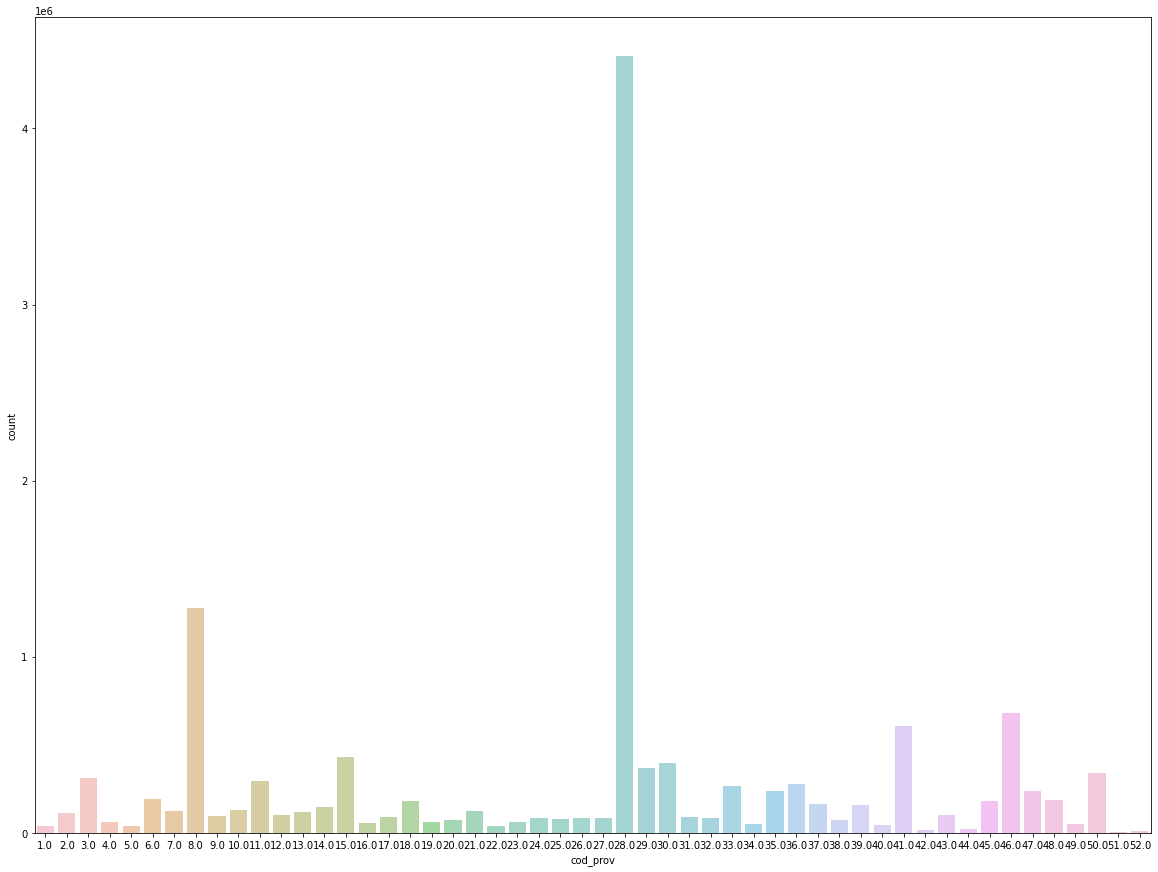

--------------------------------------------------
col :  nomprov


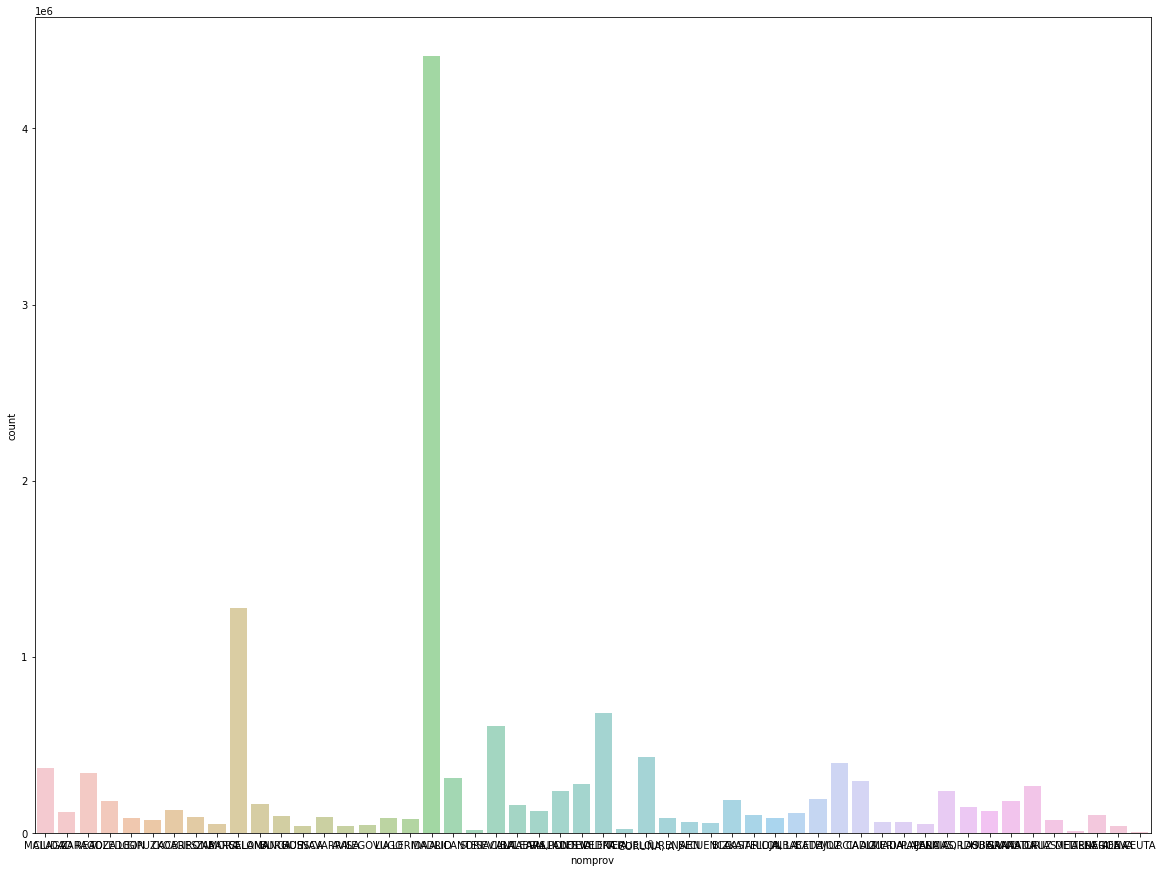

--------------------------------------------------
col :  ind_actividad_cliente


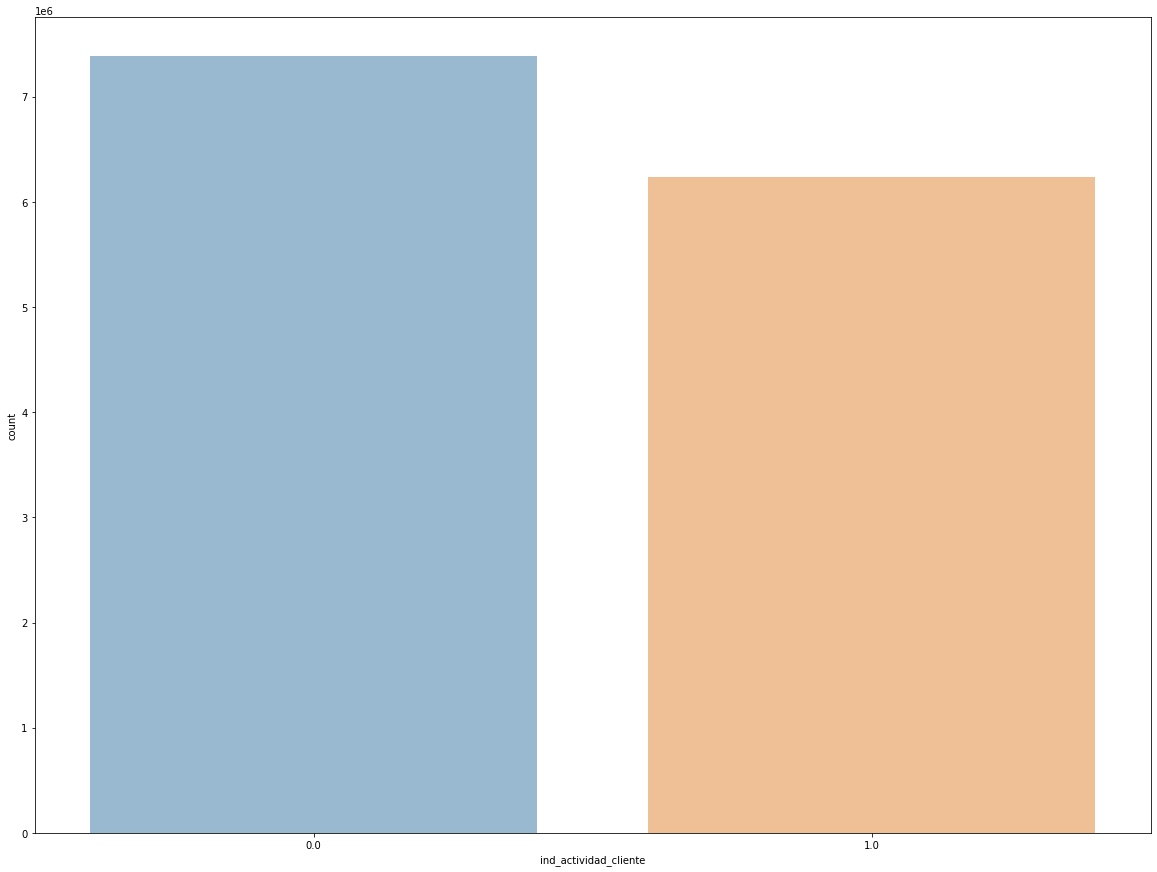

--------------------------------------------------
col :  segmento


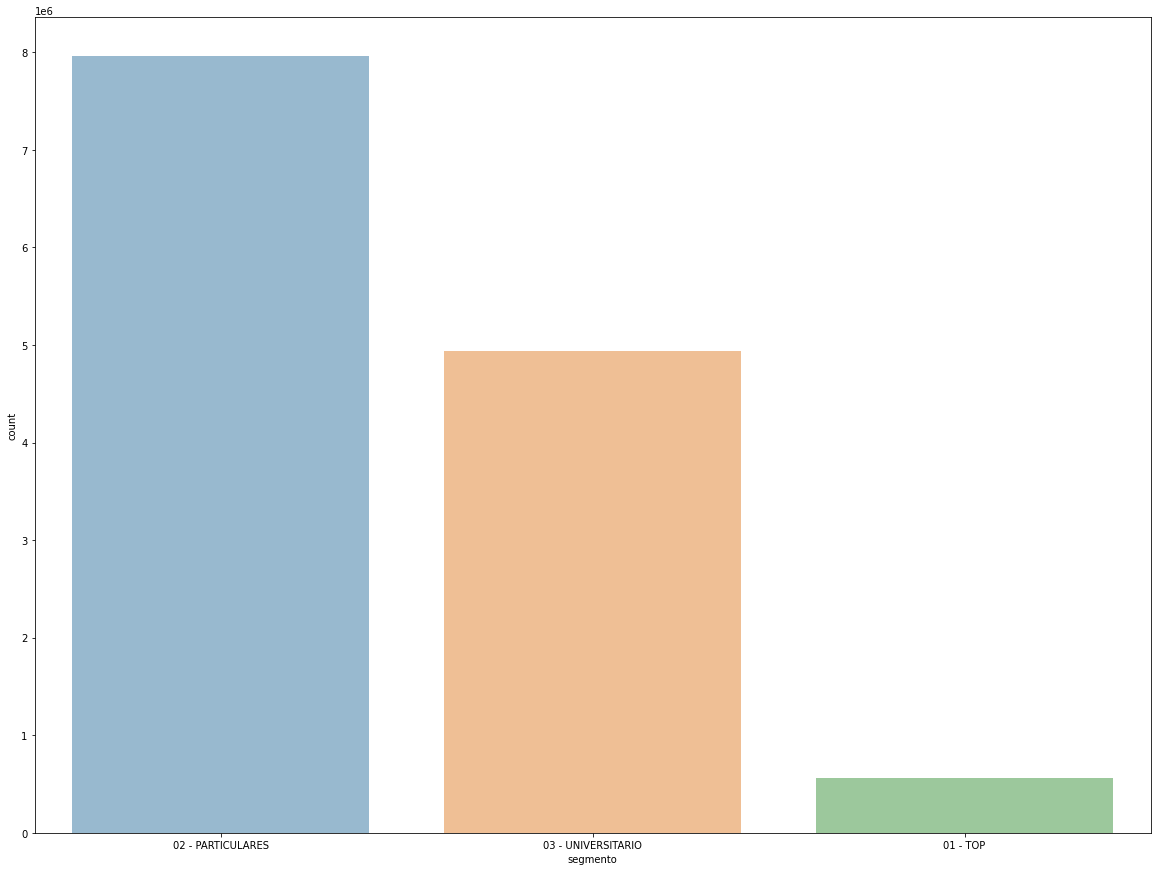

--------------------------------------------------
col :  ind_ahor_fin_ult1


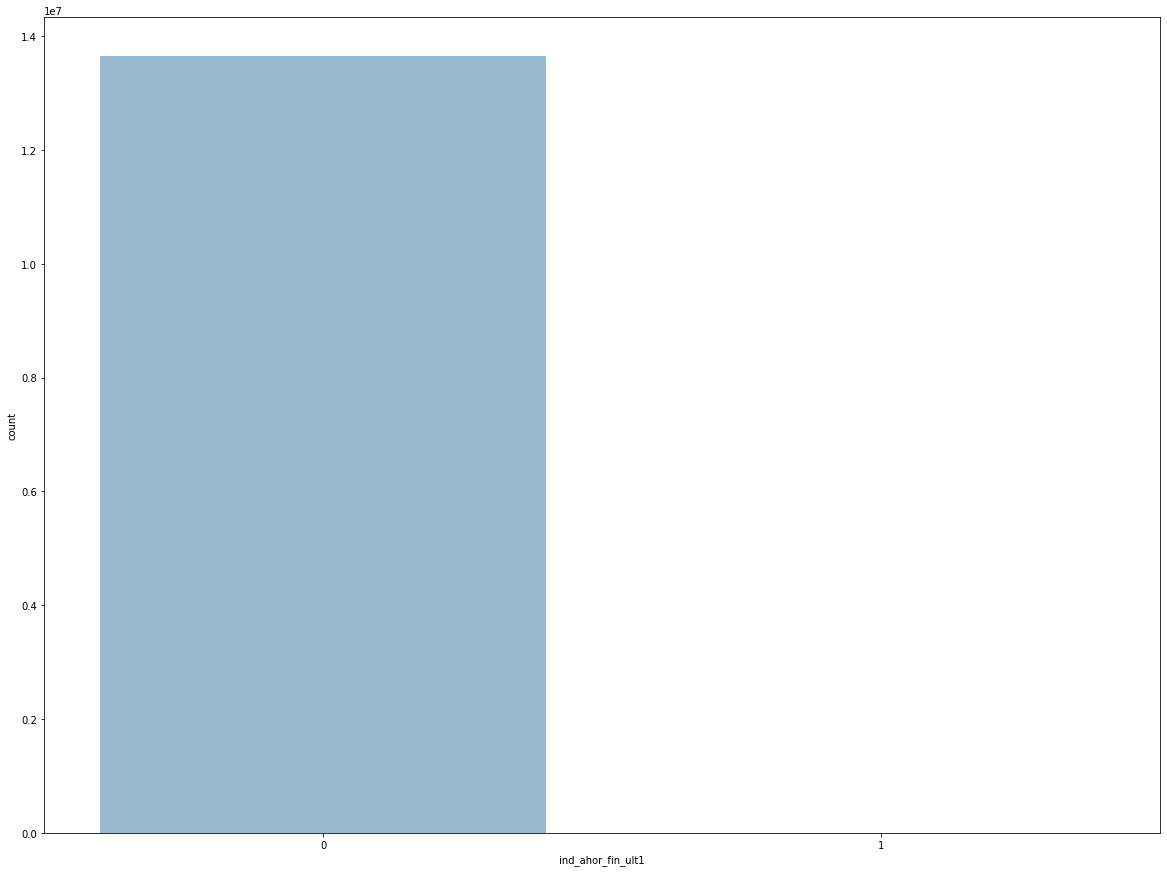

--------------------------------------------------
col :  ind_aval_fin_ult1


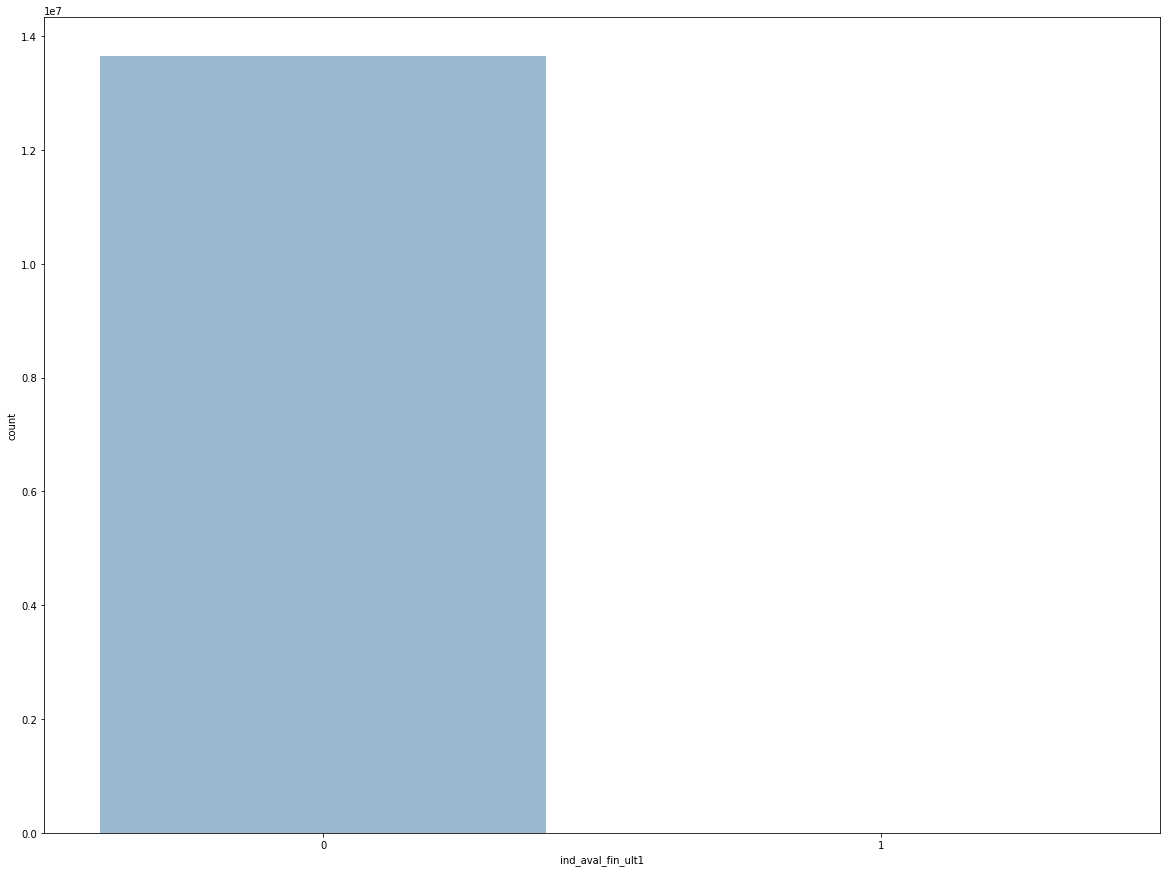

--------------------------------------------------
col :  ind_cco_fin_ult1


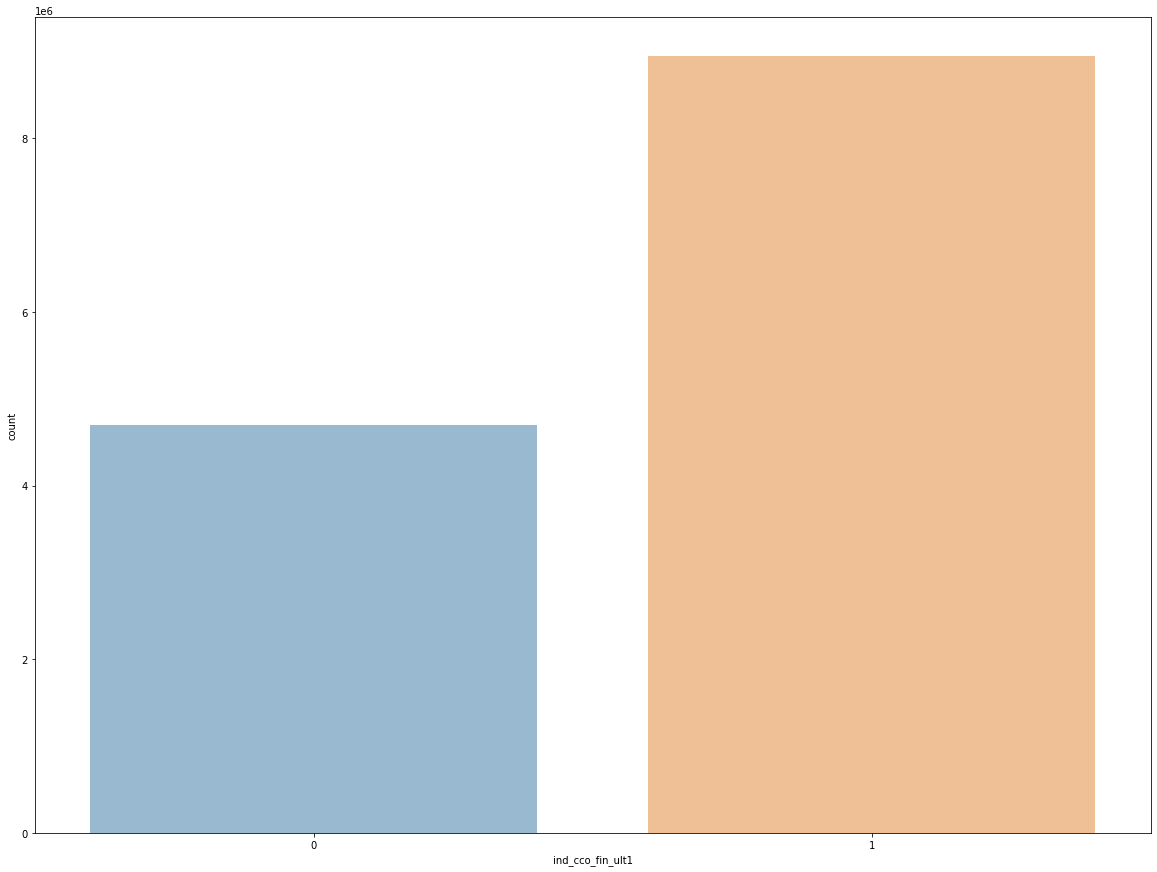

--------------------------------------------------
col :  ind_cder_fin_ult1


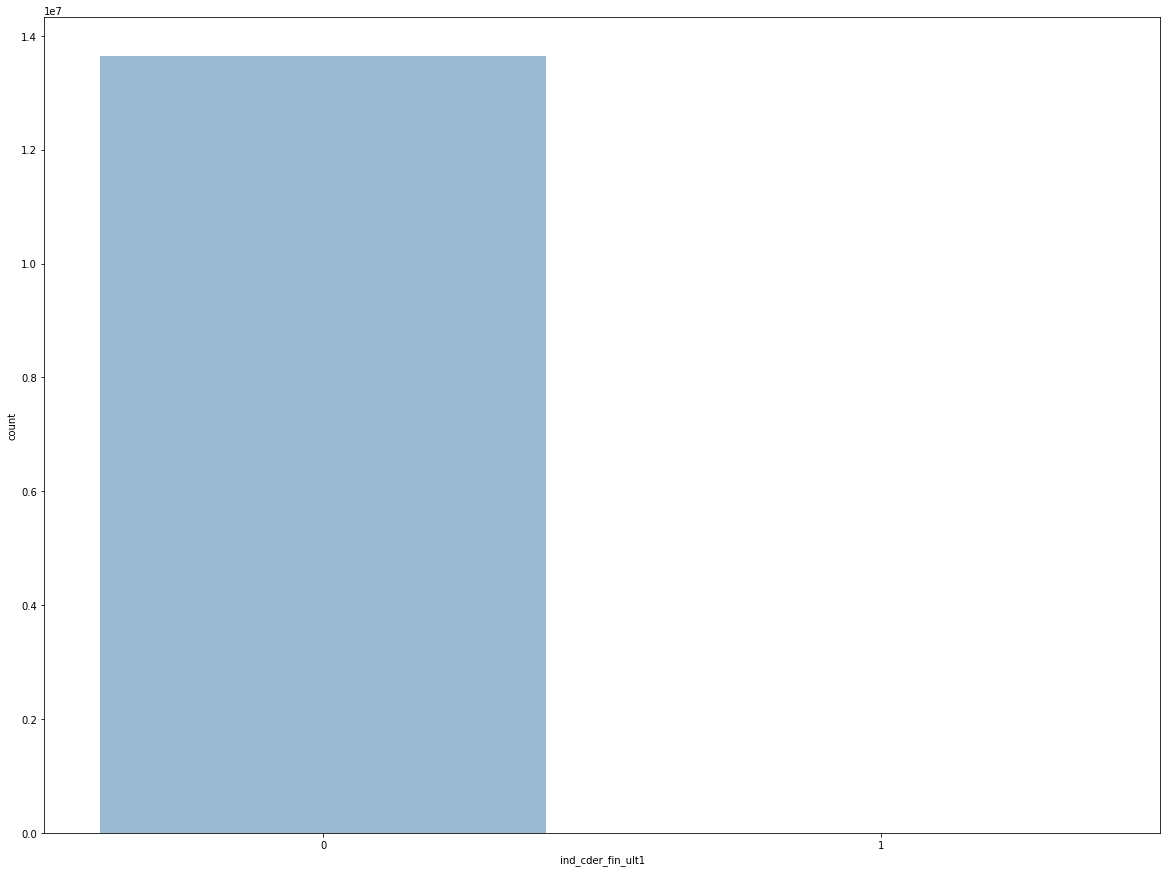

--------------------------------------------------
col :  ind_cno_fin_ult1


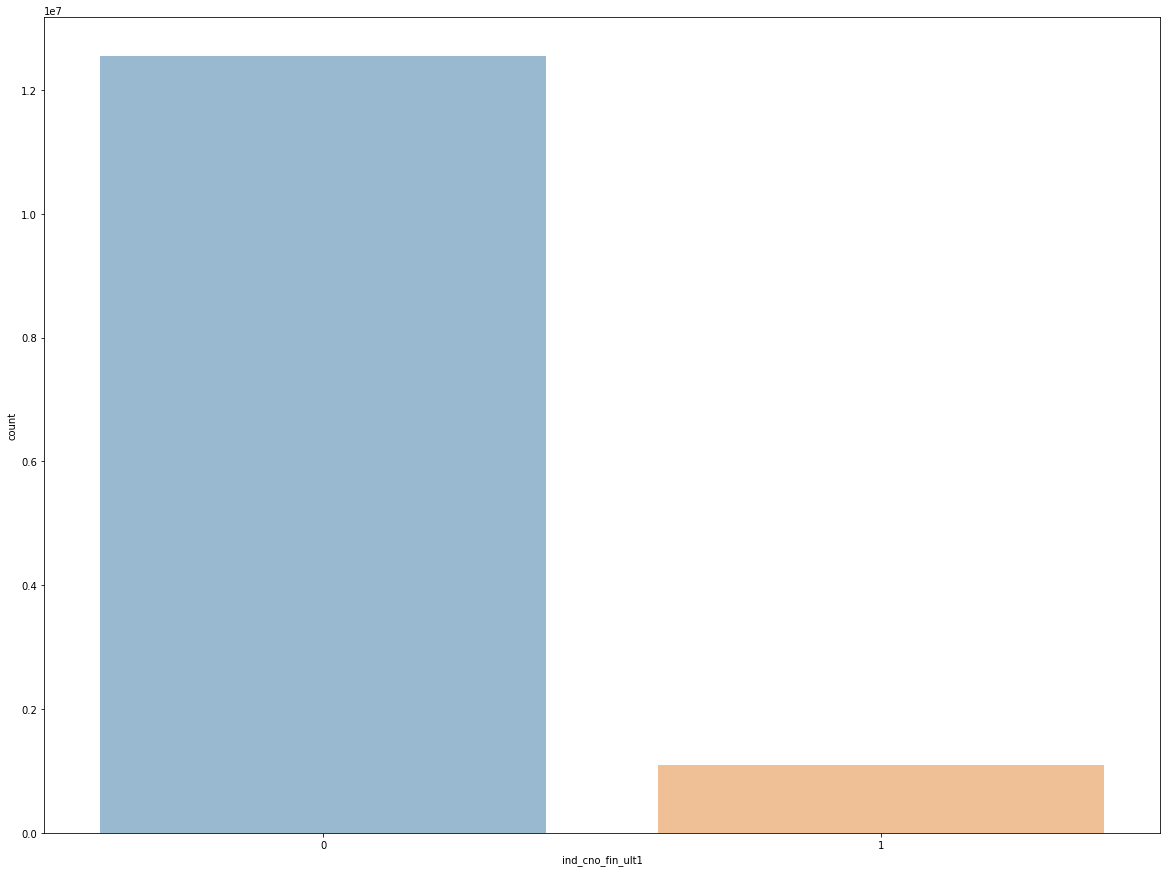

--------------------------------------------------
col :  ind_ctju_fin_ult1


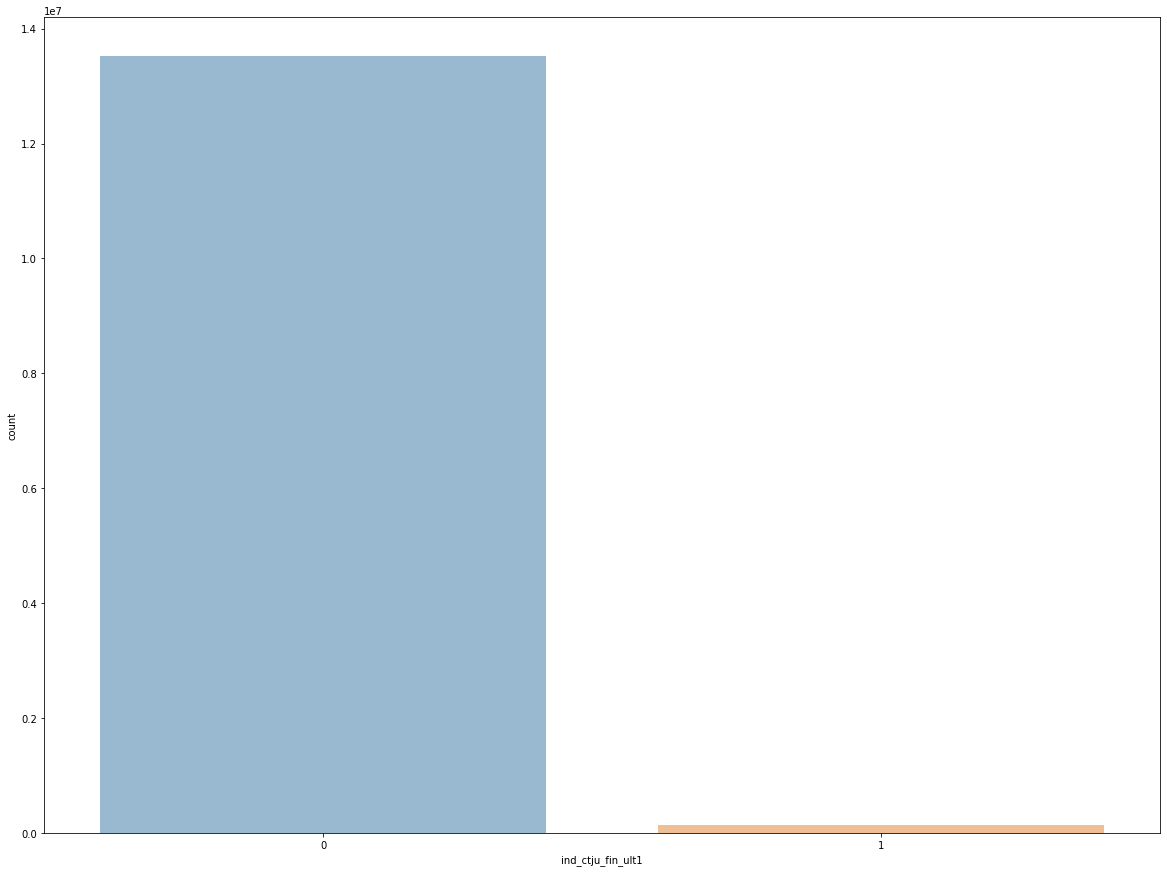

--------------------------------------------------
col :  ind_ctma_fin_ult1


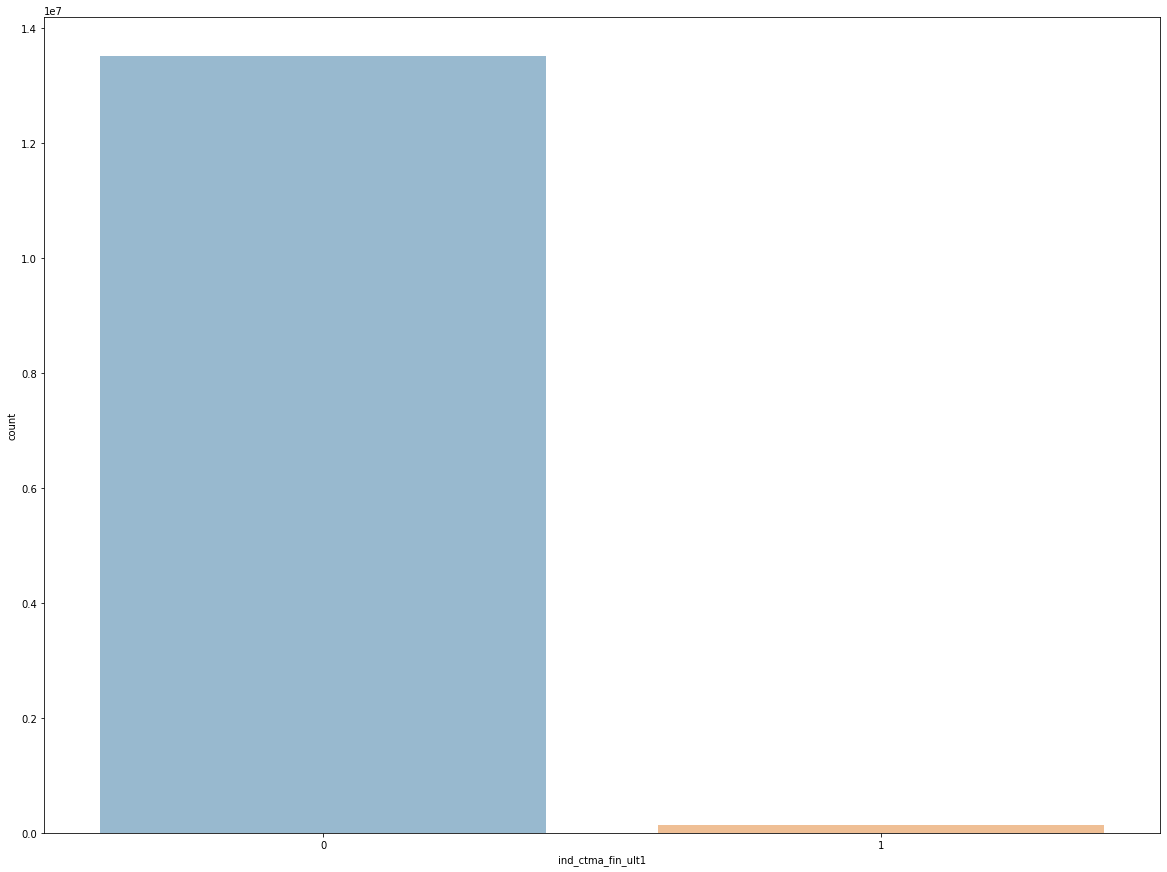

--------------------------------------------------
col :  ind_ctop_fin_ult1


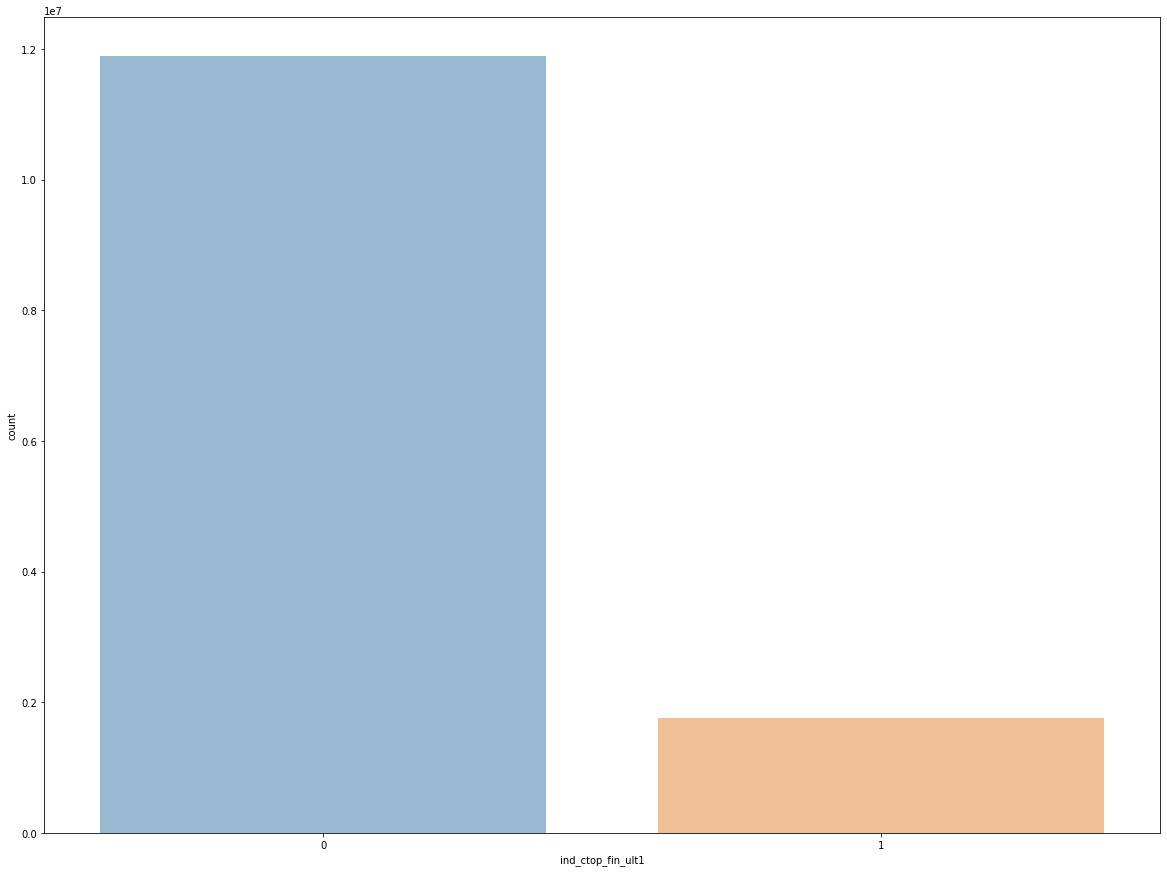

--------------------------------------------------
col :  ind_ctpp_fin_ult1


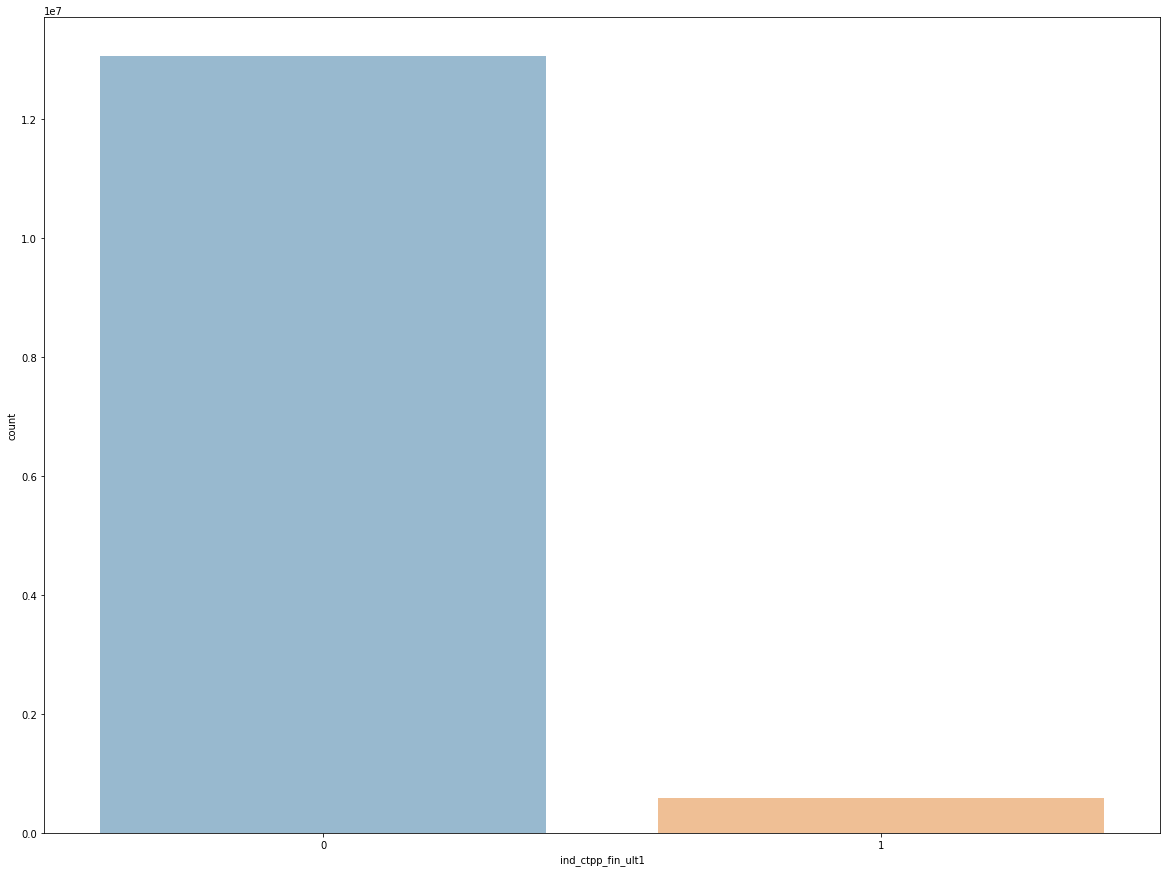

--------------------------------------------------
col :  ind_deco_fin_ult1


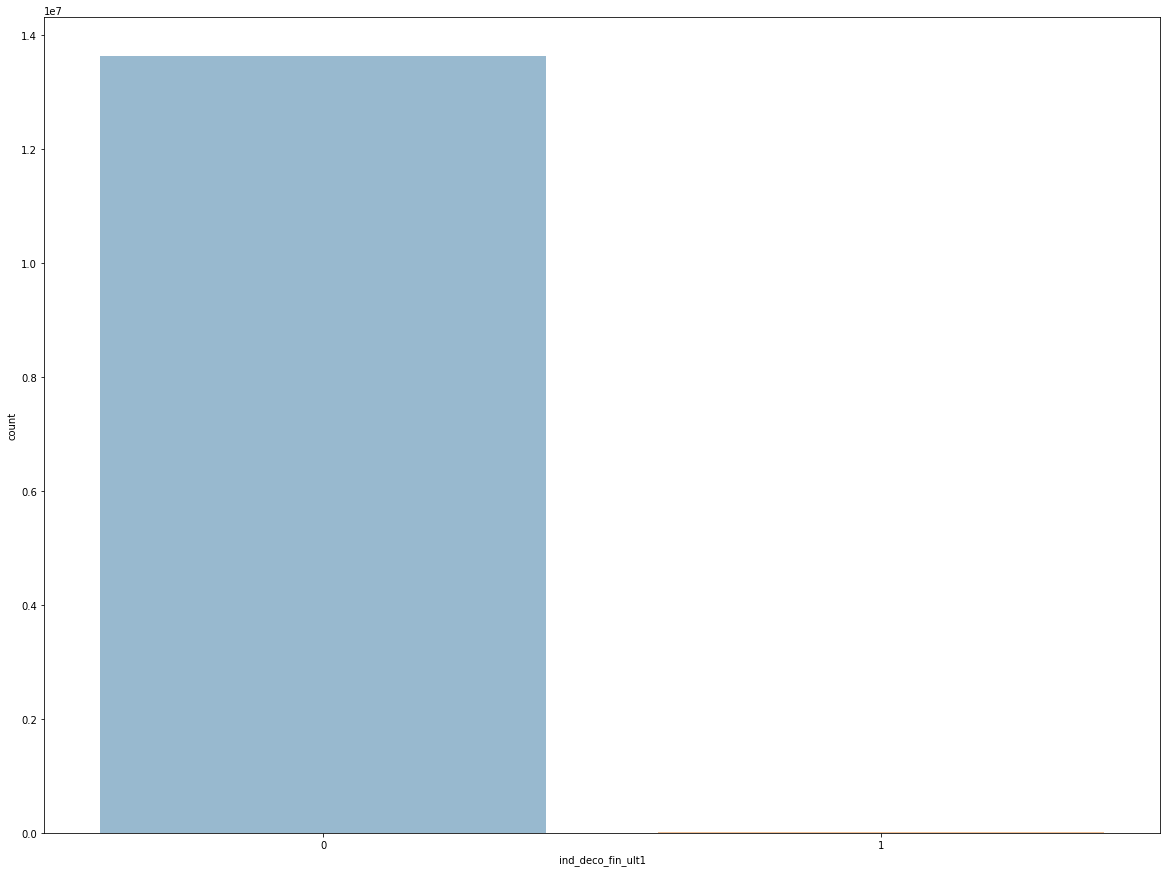

--------------------------------------------------
col :  ind_deme_fin_ult1


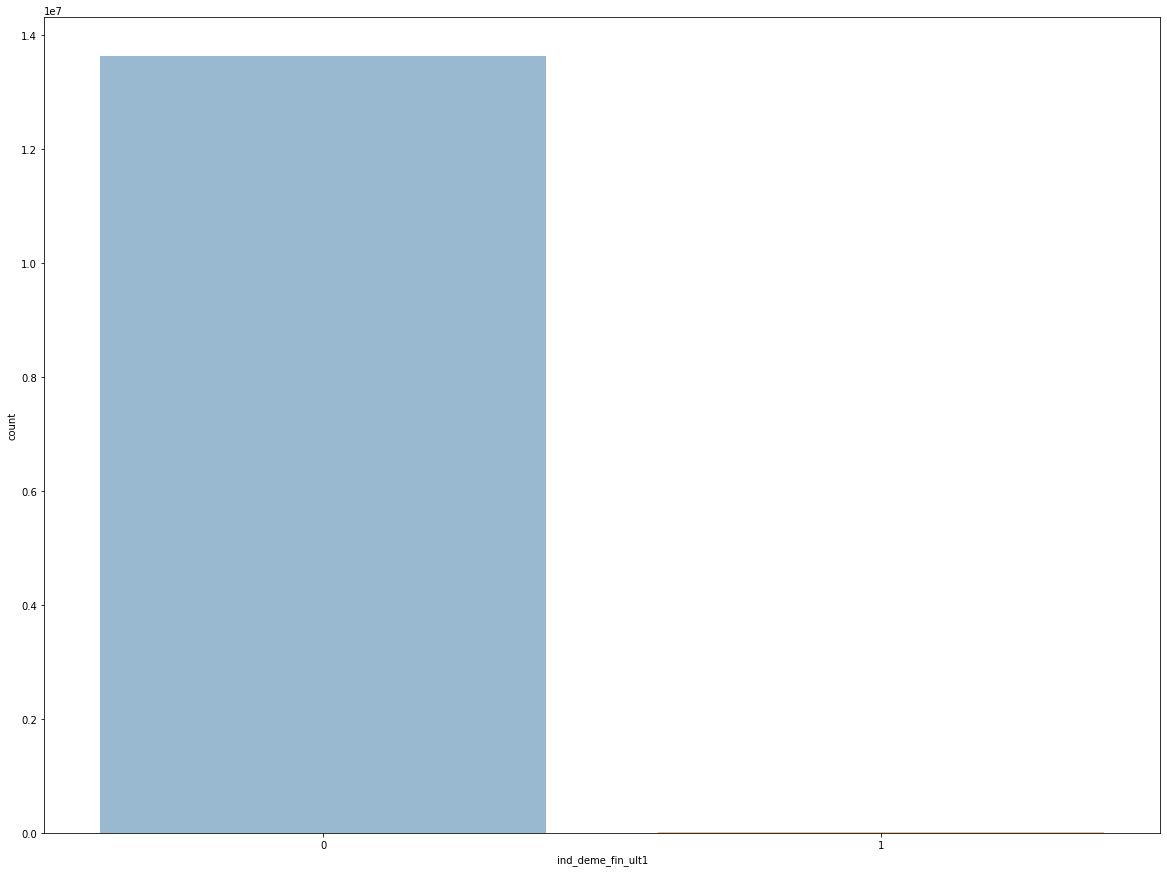

--------------------------------------------------
col :  ind_dela_fin_ult1


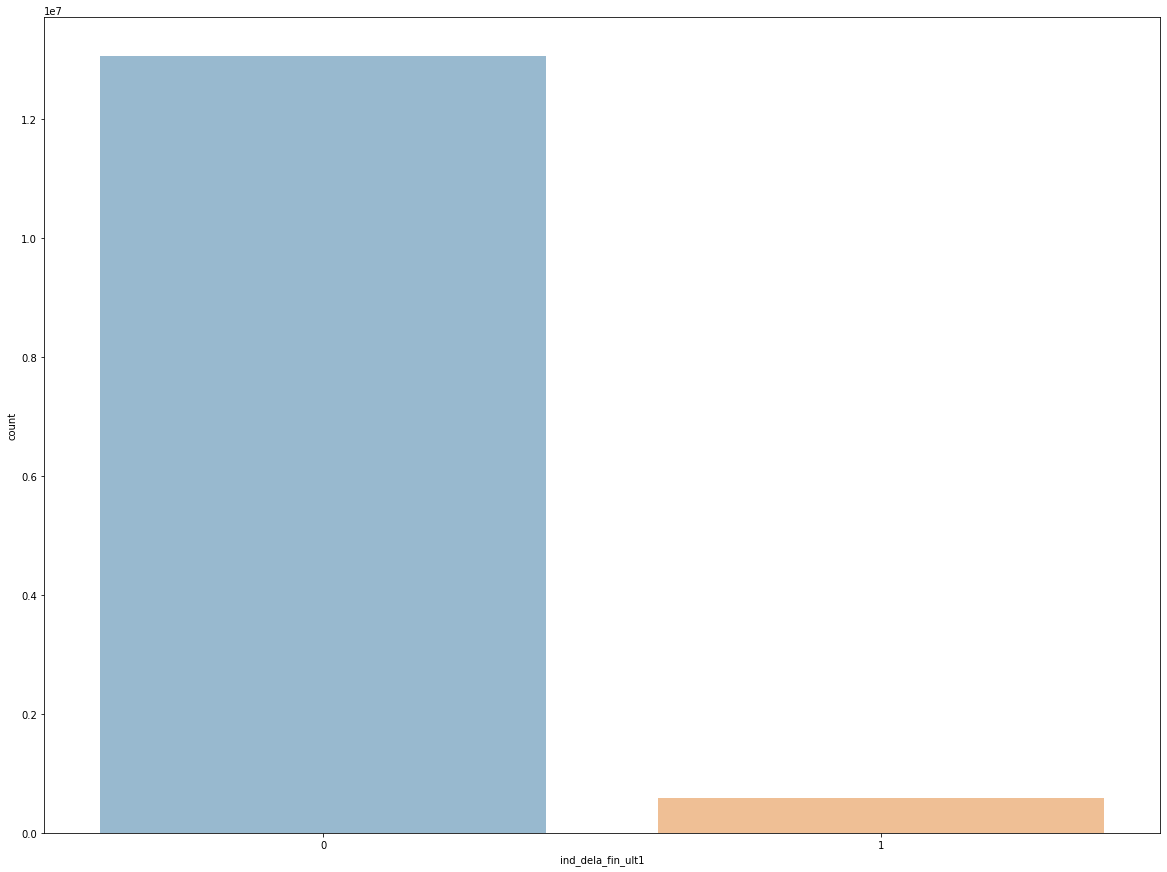

--------------------------------------------------
col :  ind_ecue_fin_ult1


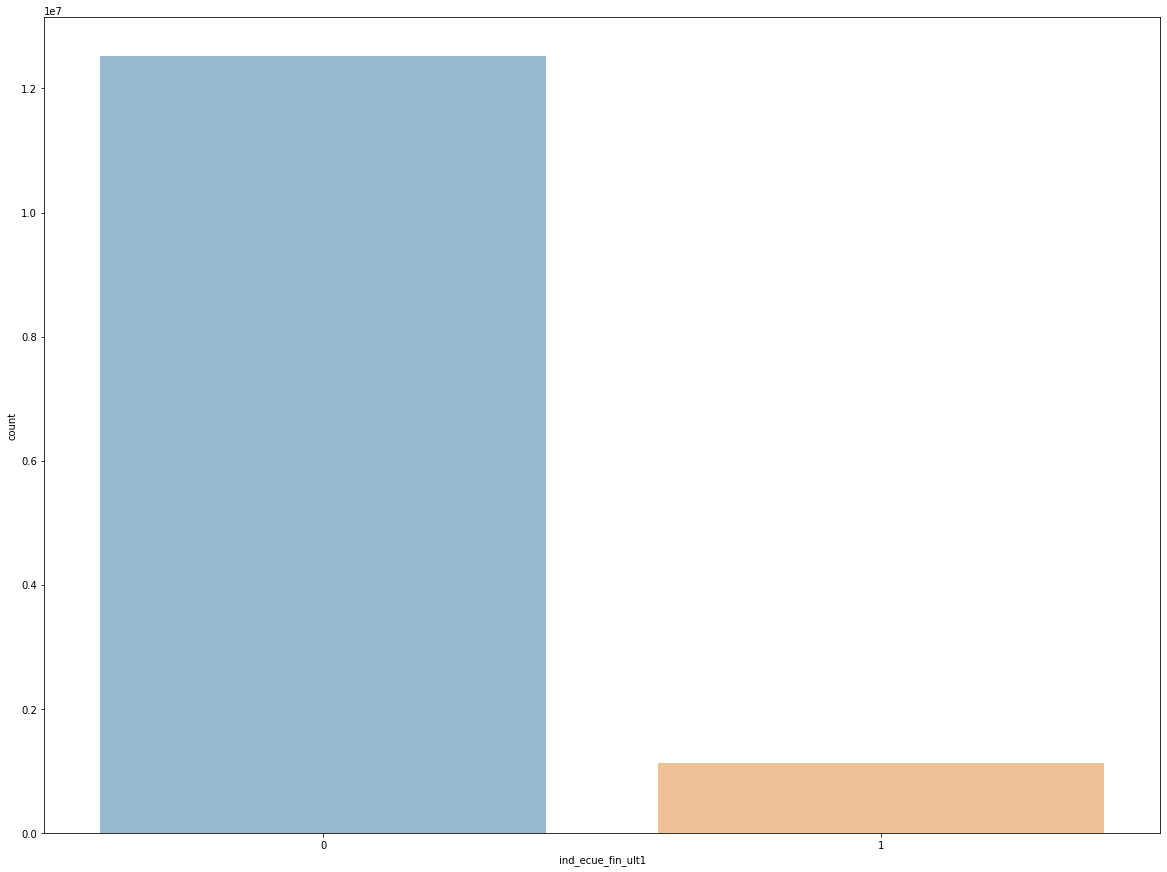

--------------------------------------------------
col :  ind_fond_fin_ult1


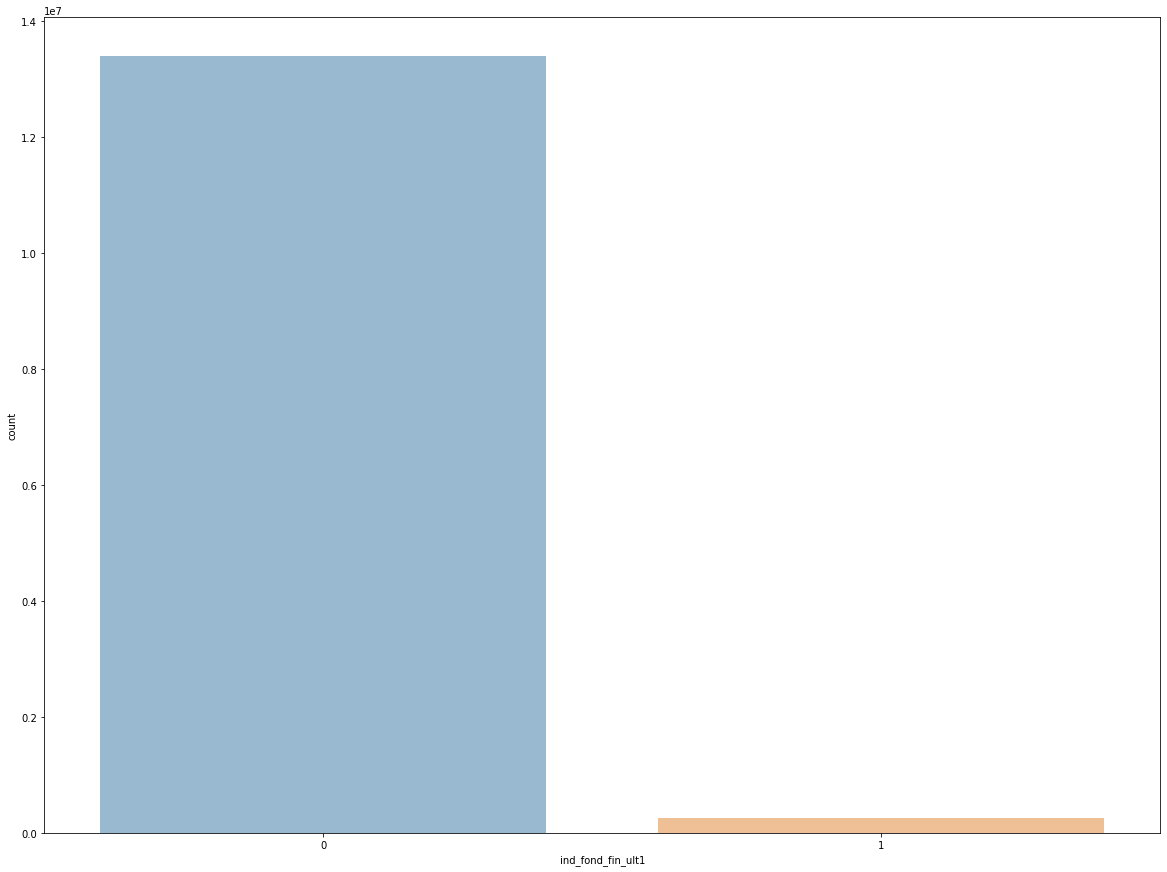

--------------------------------------------------
col :  ind_hip_fin_ult1


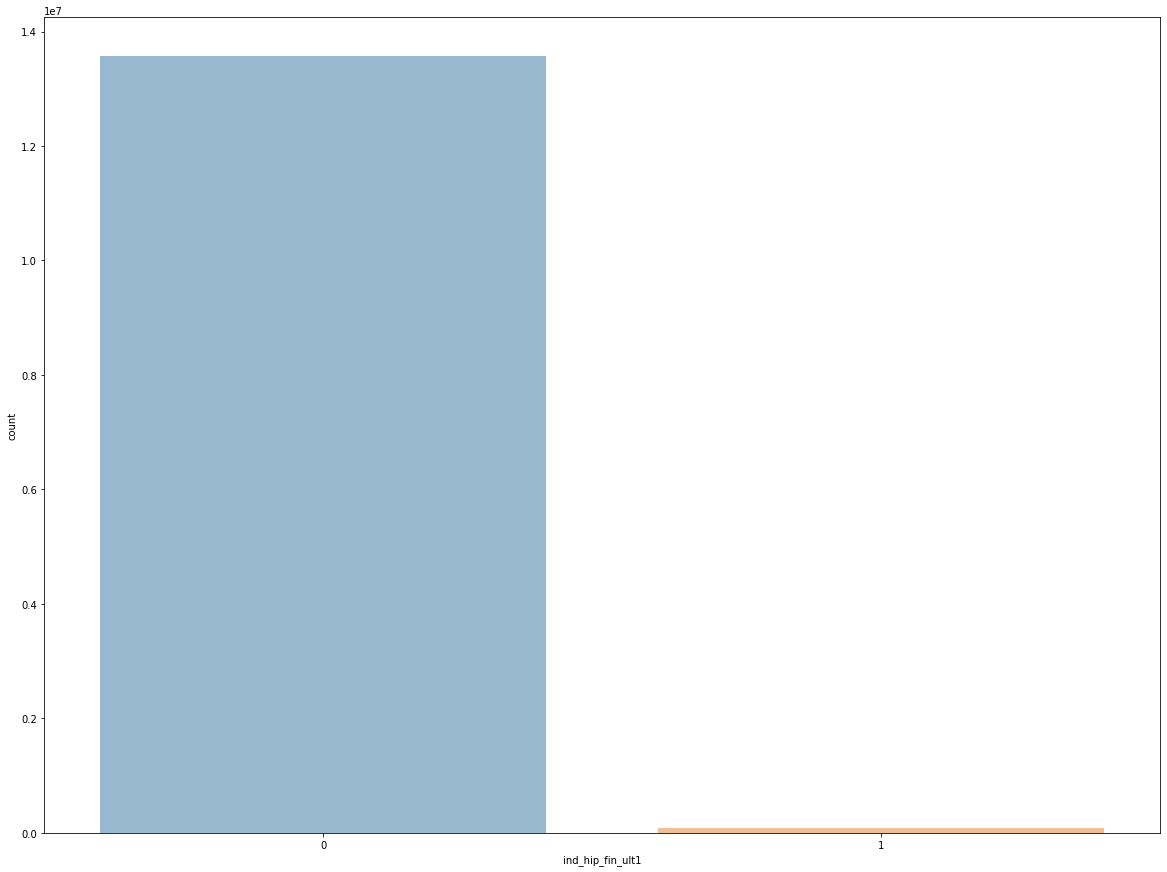

--------------------------------------------------
col :  ind_plan_fin_ult1


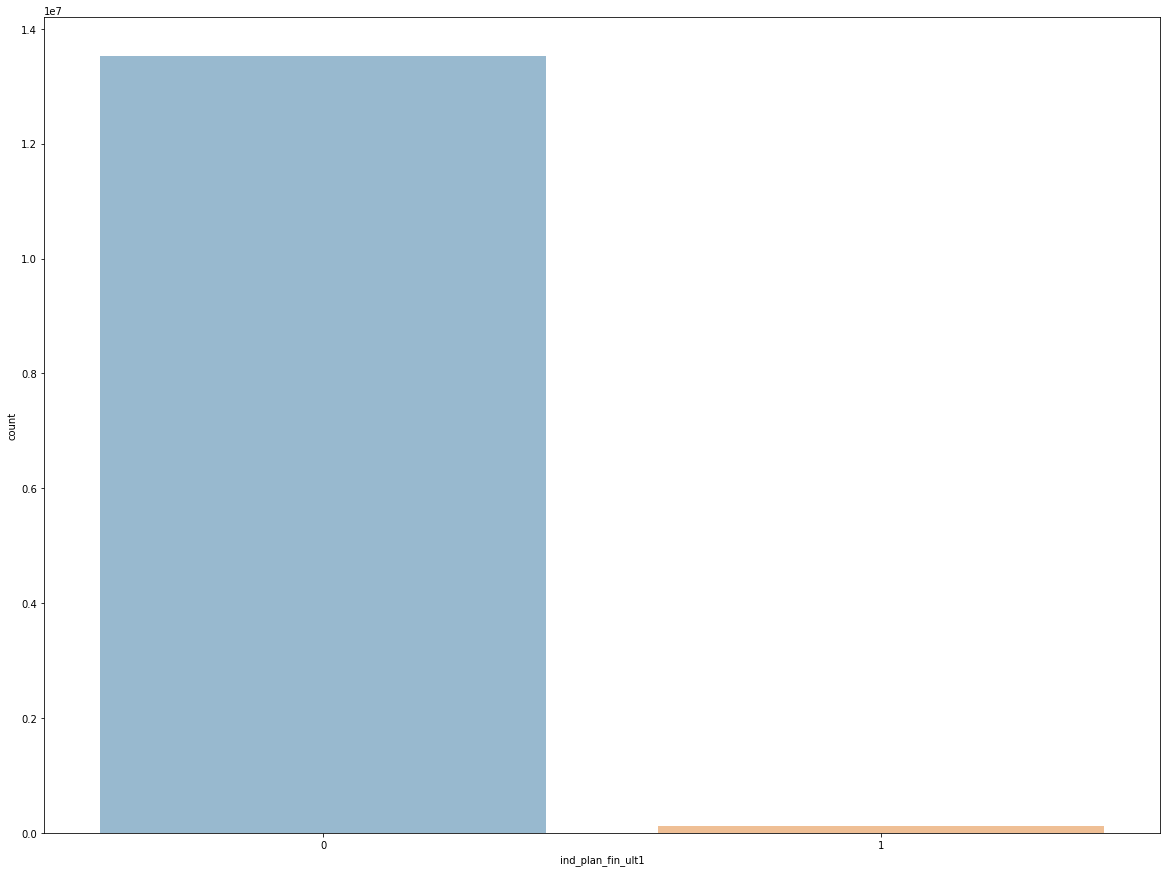

--------------------------------------------------
col :  ind_pres_fin_ult1


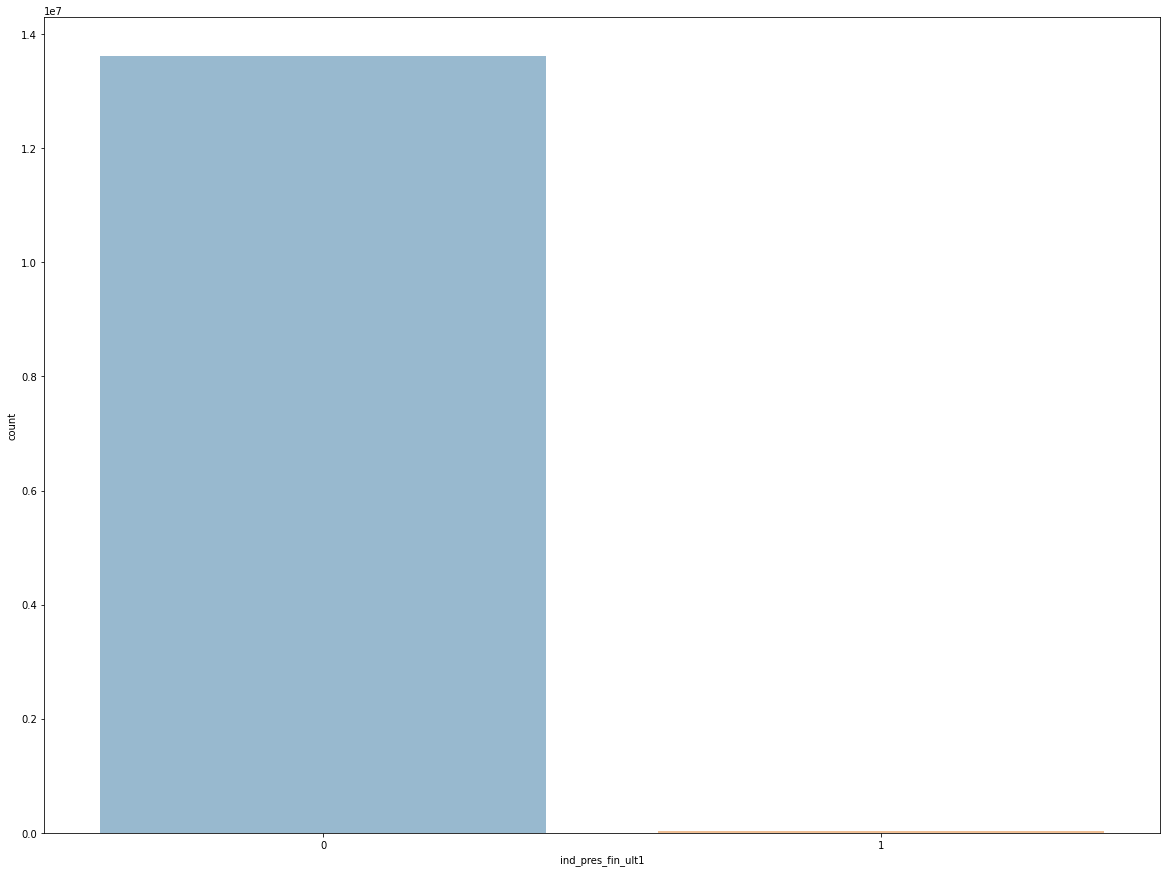

--------------------------------------------------
col :  ind_reca_fin_ult1


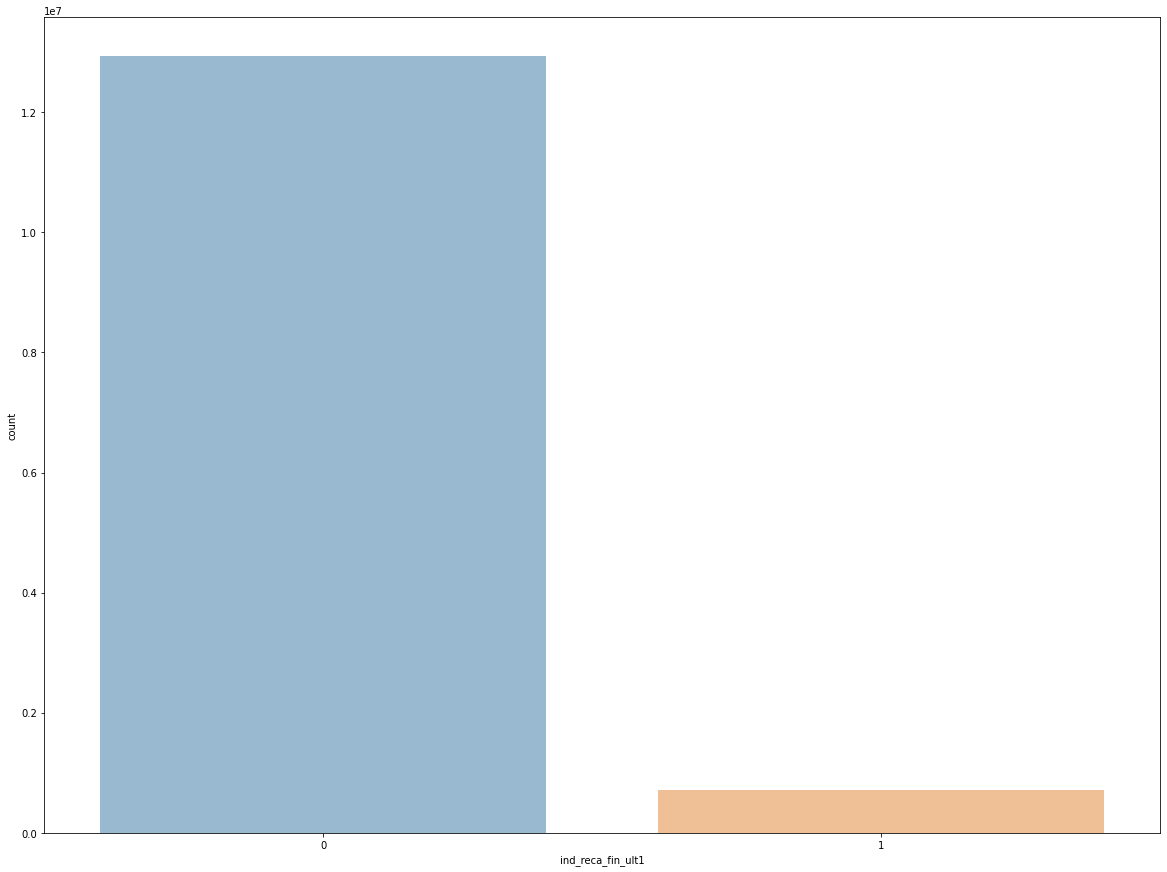

--------------------------------------------------
col :  ind_tjcr_fin_ult1


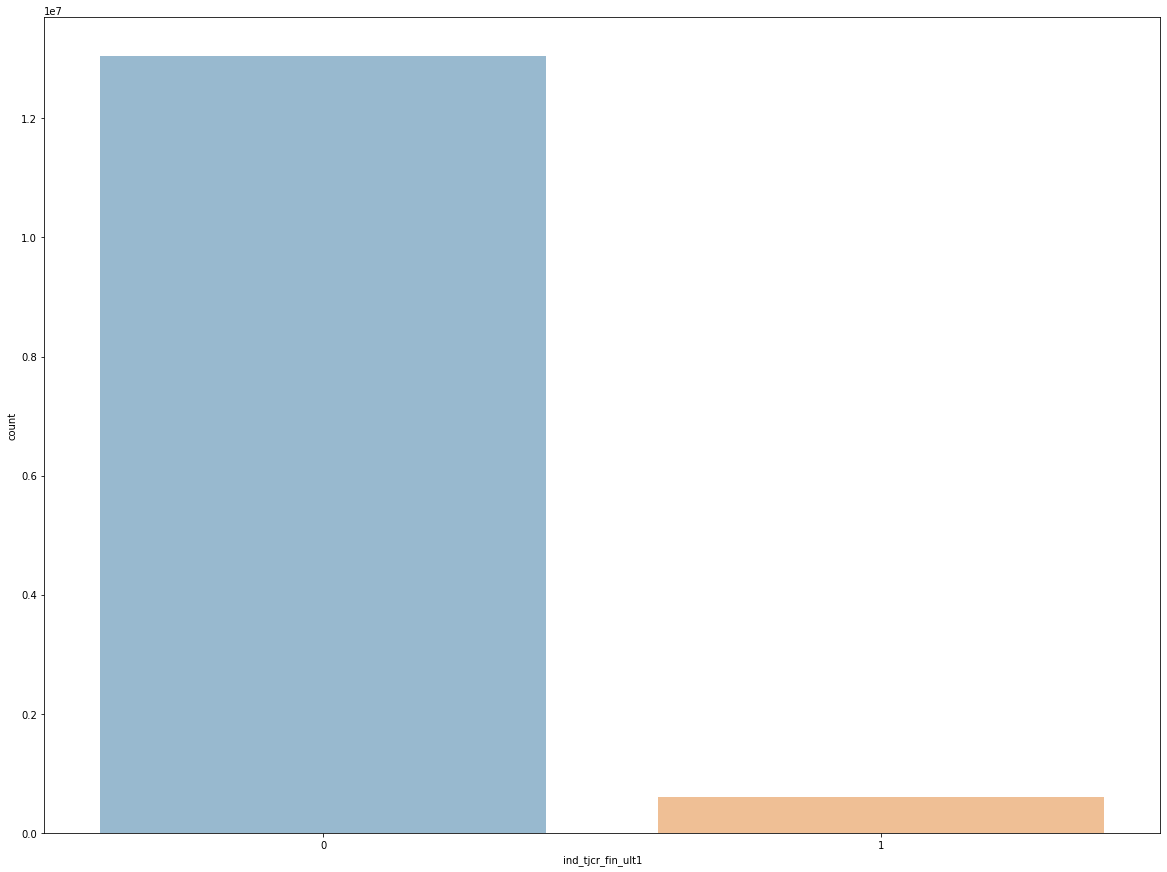

--------------------------------------------------
col :  ind_valo_fin_ult1


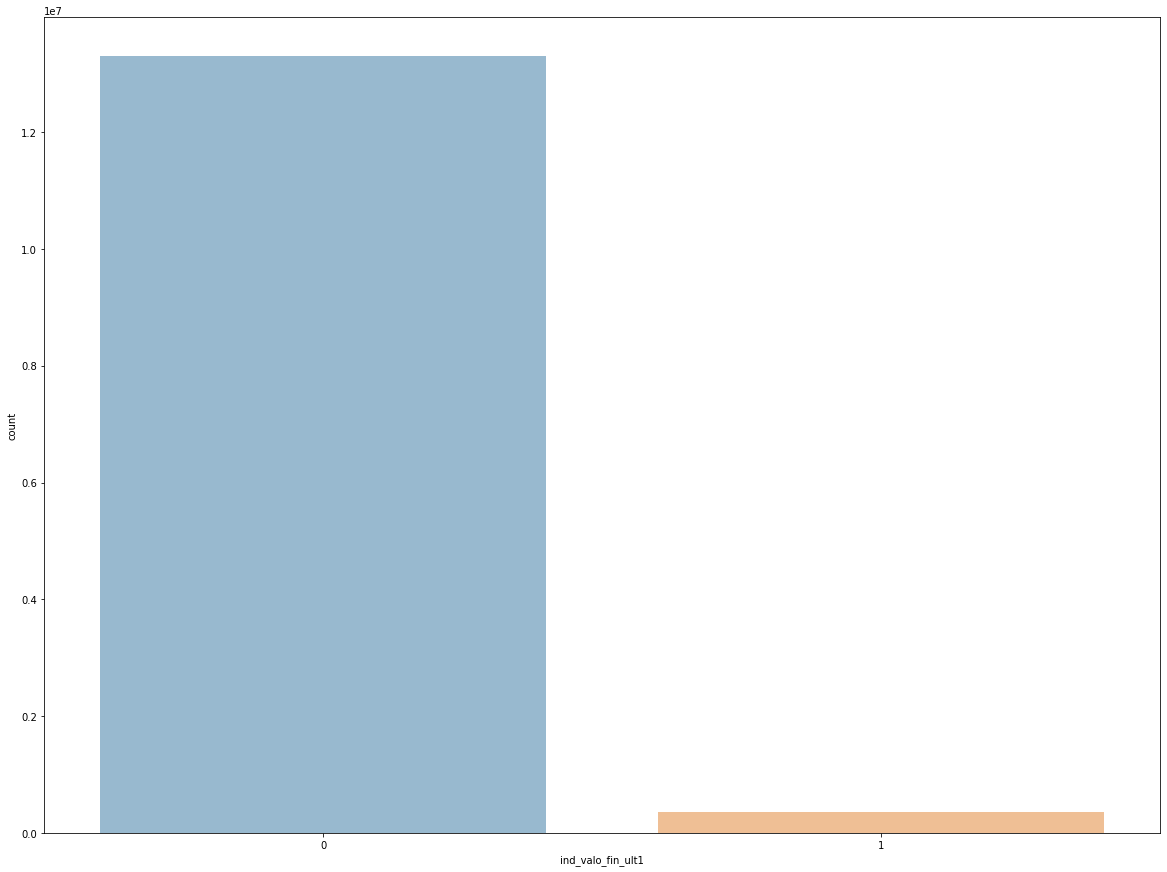

--------------------------------------------------
col :  ind_viv_fin_ult1


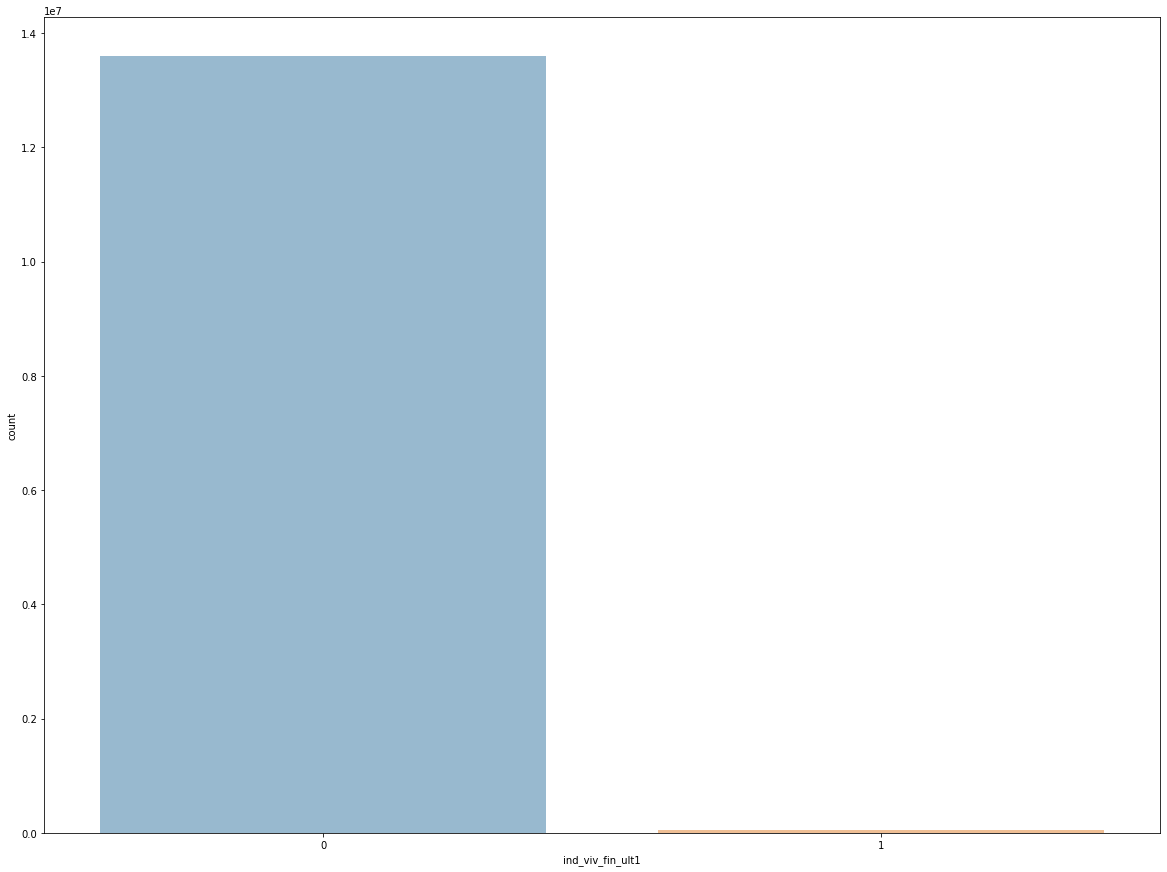

--------------------------------------------------
col :  ind_nomina_ult1


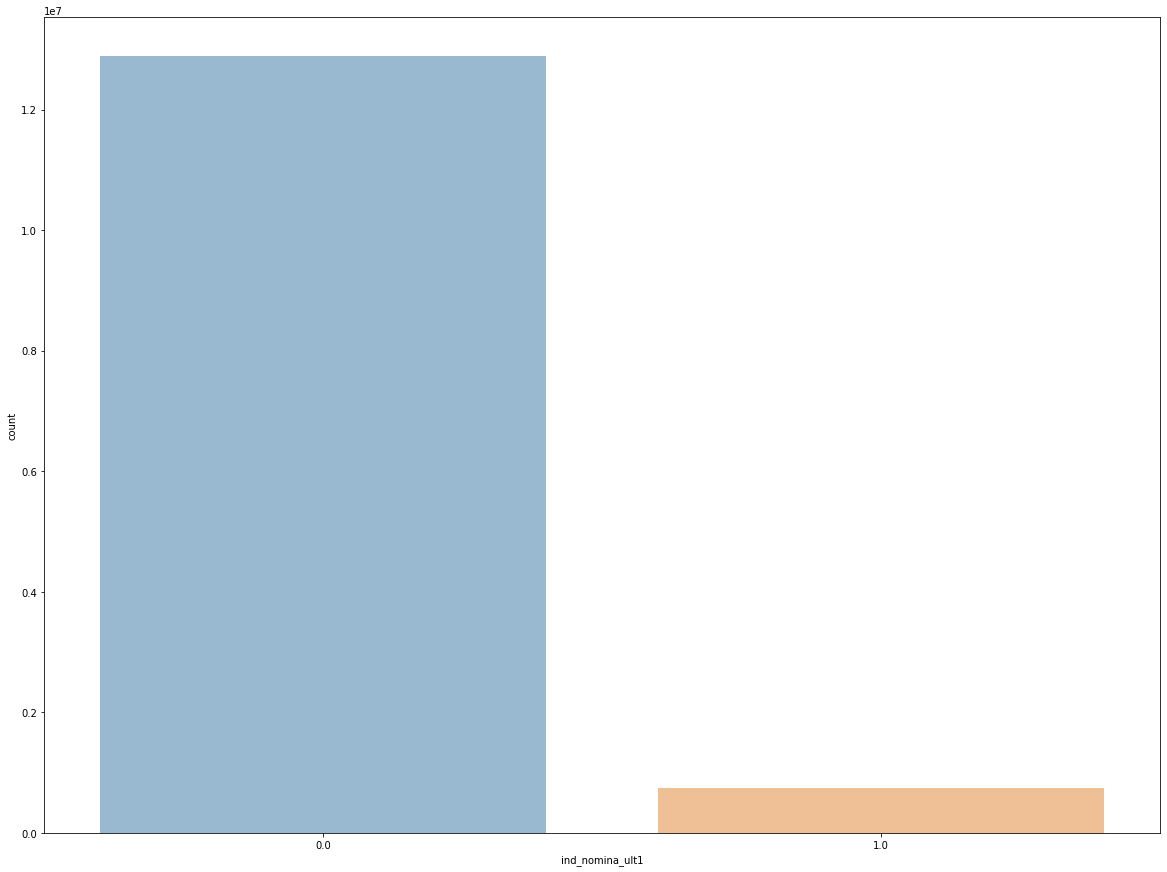

--------------------------------------------------
col :  ind_nom_pens_ult1


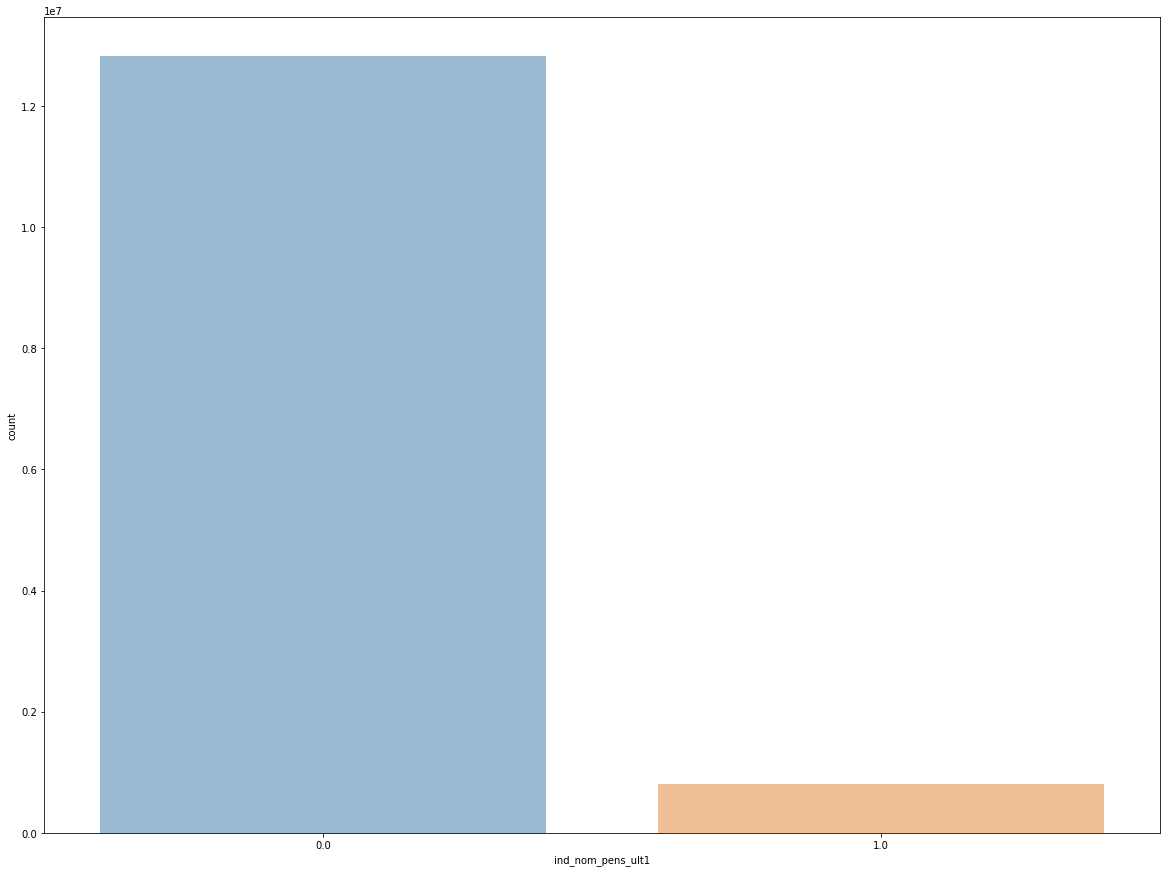

--------------------------------------------------
col :  ind_recibo_ult1


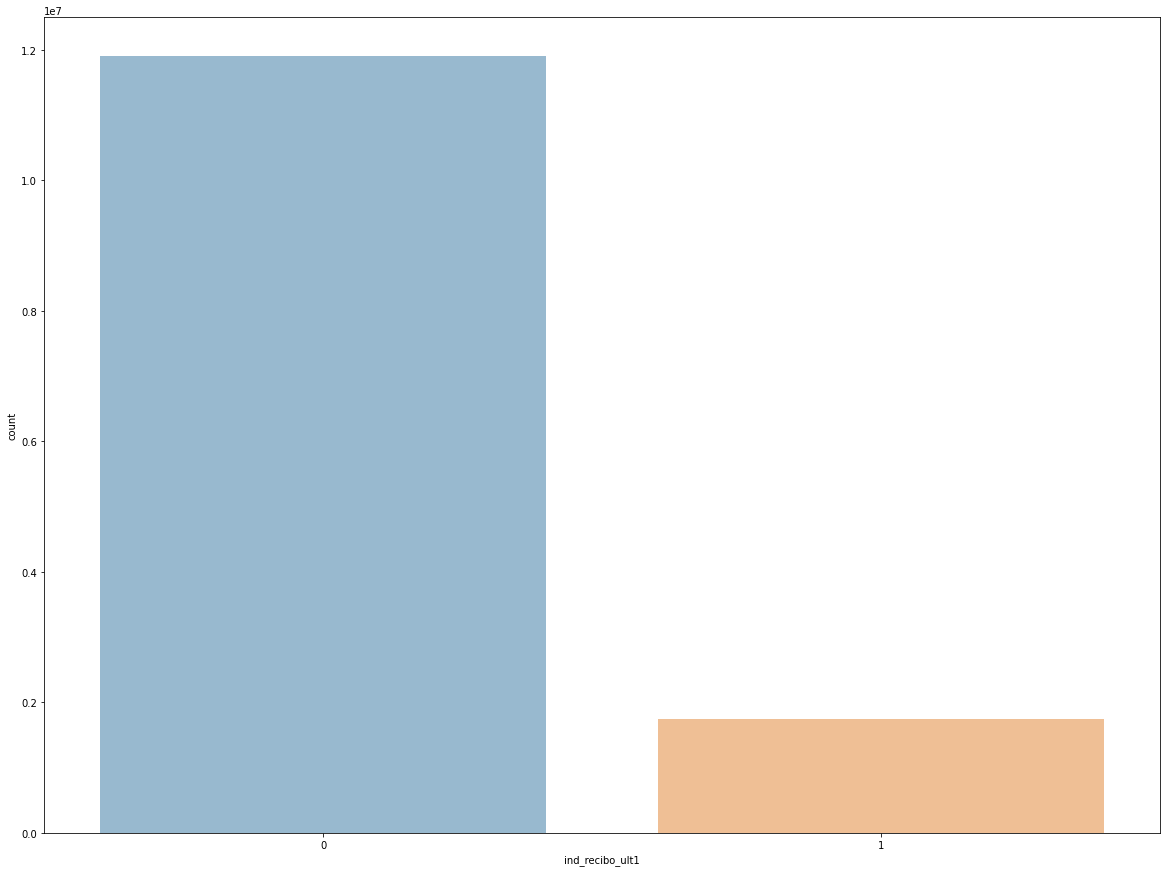

In [ ]:
skip_cols = ['ncodpers', 'renta']
for col in trn.columns:
  # 출력에 너무 많이 시간이 걸리는 두 변수는 skip
  if col in skip_cols:
    continue
  #보기 편하게 영역 구분과 변수명을 출력
  print('-' * 50)
  print('col : ', col)

  # 그래프 크기를(figsize) 설정한다.
  f, ax = plt.subplots(figsize=(20, 15))
  # seaborn을 사용한 막대 그래프 생성
  sns.countplot(x=col, data=trn, alpha=0.5)
  # show() 함수를 통해 시각화
  plt.show()

막대 그래프 시각화를 통해 얻은 결과를 다음과 같이 정리할 수 있다.

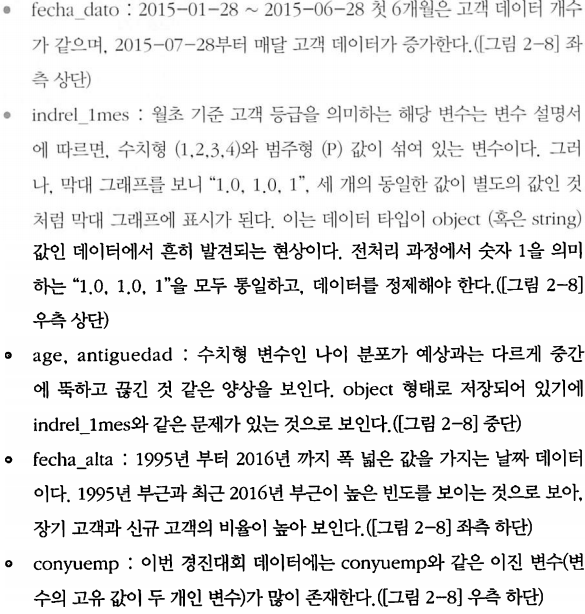

In [ ]:
Image('/content/drive/My Drive/DeepLearning/머신러닝 탐구생활/images/describe_trn5.png', width=600)

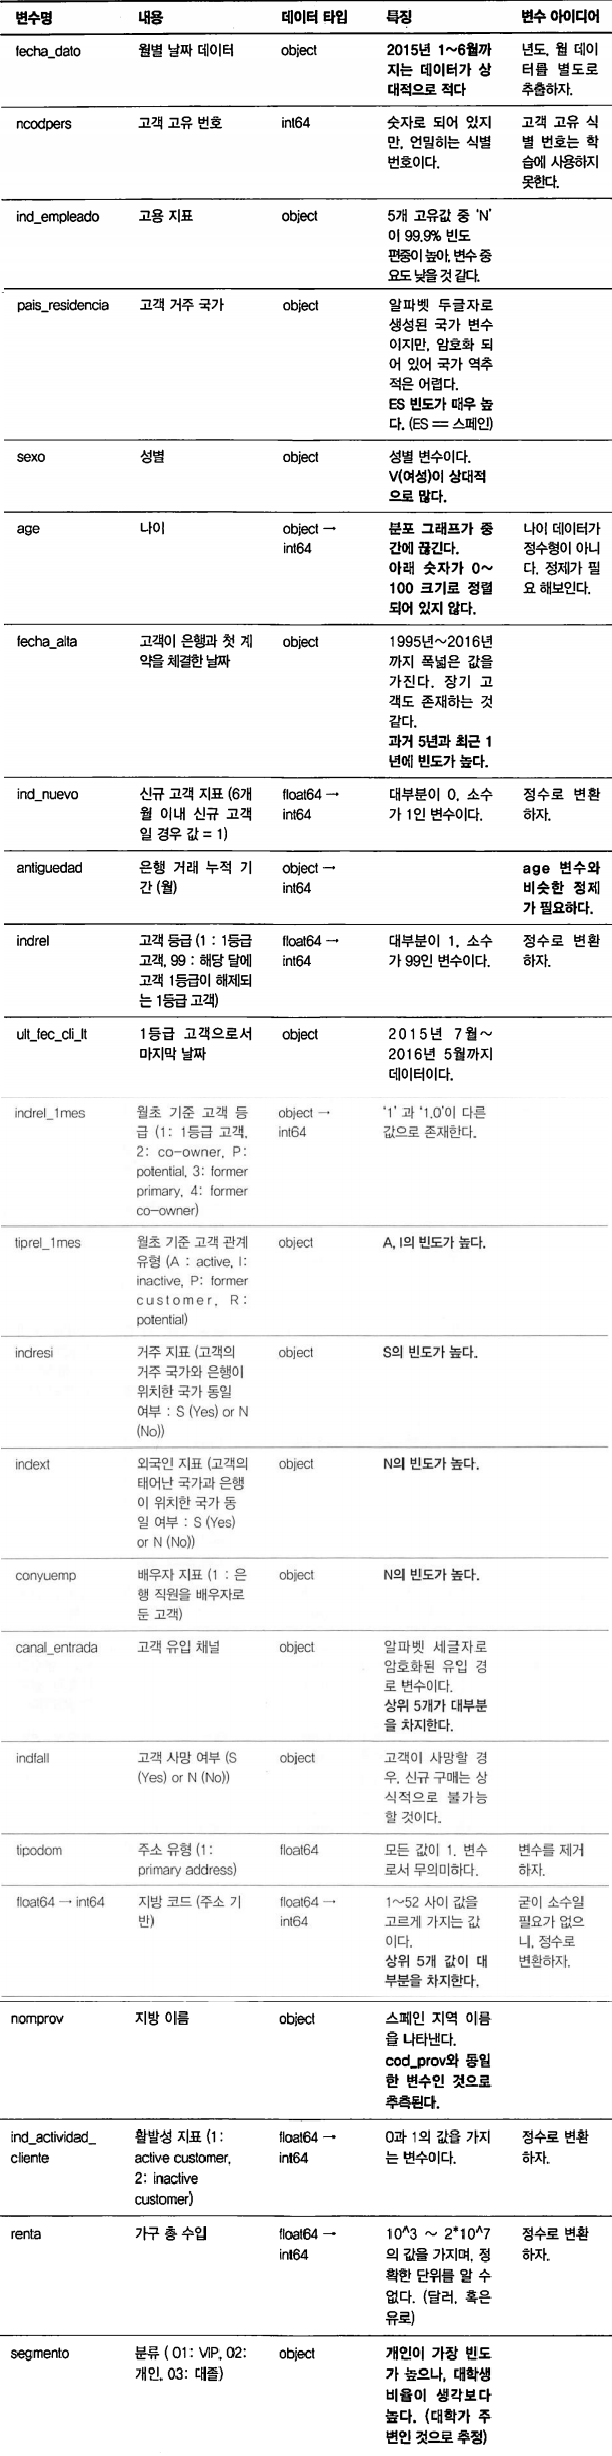

In [ ]:
Image('/content/drive/My Drive/DeepLearning/머신러닝 탐구생활/images/describe_trn6.png', width=600)

###시계열 데이터 시각화

* 앞서 시각화 해본 막대 그래프 데이터는 시계열성을 고려하지 않은 시각데이터 이기 때문에 올바른 분석을 위해서 데이터의 시간에 따른 변화 척도를 시각적으로 표현해야 한다.
* 이진 변수인 24개 제품에 대한 의미를 도출해내기 어렵다 이를 시계열성이 포함된 시각화 기법을 통해 확인한다.

- 0과 1로 구성된 24개의 제품 변수는 고객이 보유할 때 1이리 때문에 해당 변수를 다 더한 값은 제품 보유 수준을 의미한다.
* 가장 쉬운 접근으로 월별 제품 변수의 합을 누적 막대 그래프로 시각화하는 것이 있다.

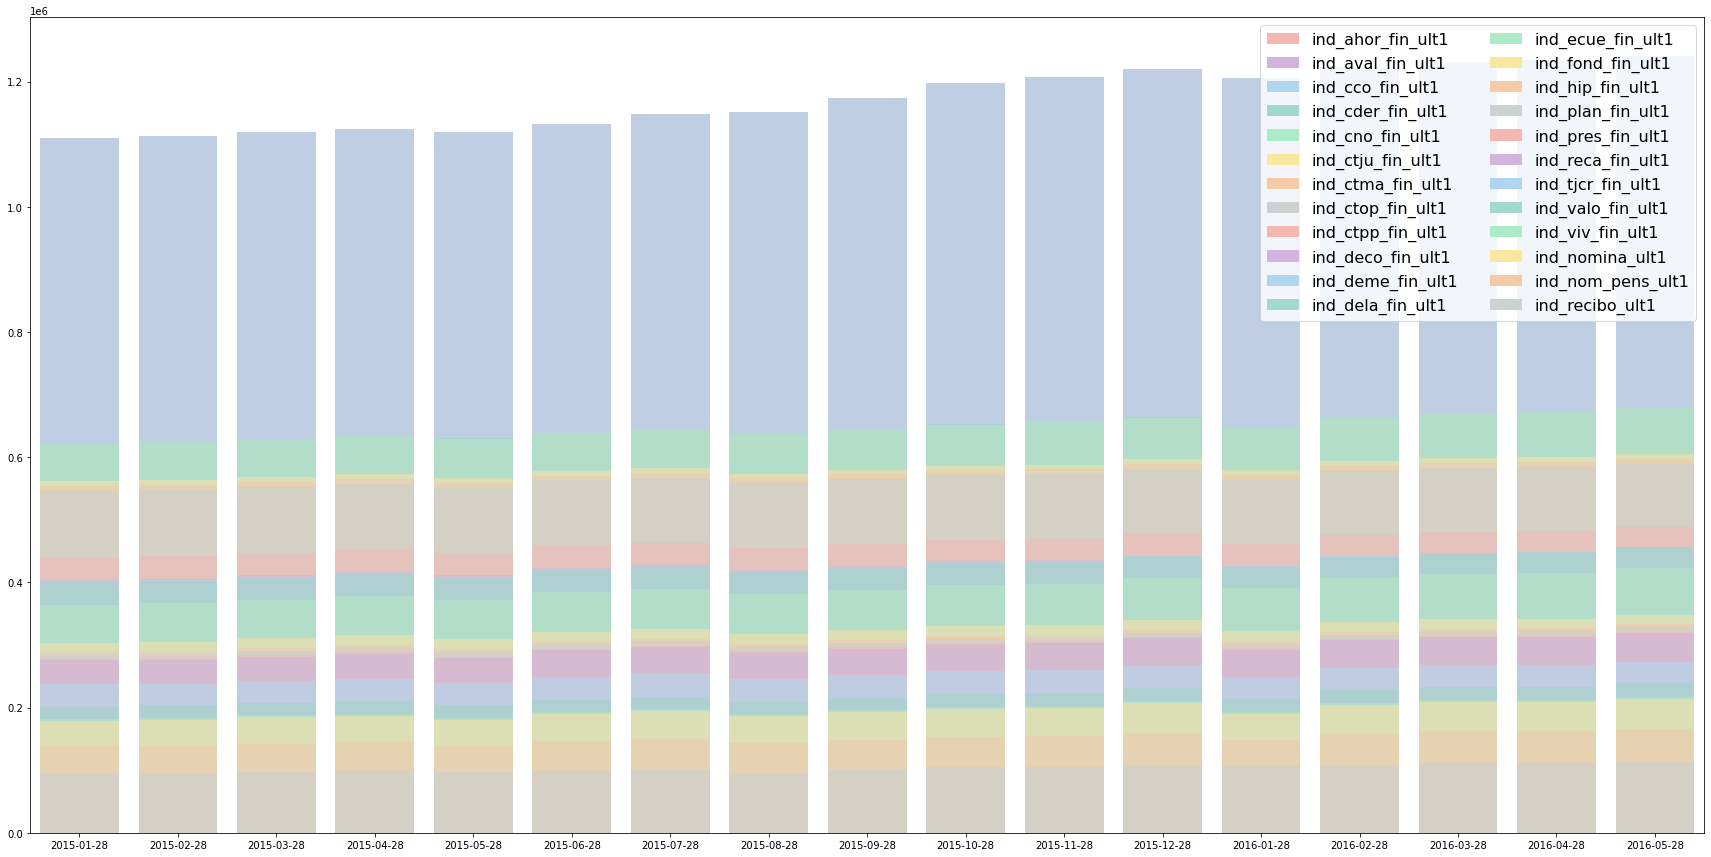

In [ ]:
# 날짜 데이터를 기준으로 분석하기 위하여, 날짜 데이터 별도로 추출한다.
months = trn['fecha_dato'].unique().tolist()
# 제품 변수를 24개 추출
label_cols = trn.columns[24:].tolist()

label_over_time = []
for i in range(len(label_cols)):
  # 매월, 각 제품의 총합을 groupby(..).agg('sum')으로 계산하여, label_sum에 저장한다.
  label_sum = trn.groupby(['fecha_dato'])[label_cols[i]].agg('sum')
  label_over_time.append(label_sum.tolist())

label_sum_ove
r_time = []
for i in range(len(label_cols)):
  #누적 막대 그래프를 시각화하기 위하여, n번째 제품의 총합을 1~n 번째 제품의 총합으로 만든다.
  label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))

# 시각화를 위해 색깔을 지정한다.
color_list = ['#F5B7B1', '#D2B4DE', '#AED6F1', '#A2D9CE', '#ABEBC6', '#F9E79F', '#F5CBA7', '#CCD1D1']

# 그림 크기를 사전에 정의한다.
f, ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
  # 24개 제품에 대하여 Histogram을 그린다.
  # x축에는 월 데이터, y 축에는 누적 총합, 색깔은 8개를 번갈아 가며 사용하며, 그림의 alpha값은 0.7로 지정
  sns.barplot(x=months, y=label_sum_over_time[i], color=color_list[i%8], alpha=0.7)

# 우측 상단에 Legend를 추가
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor='none') for i in range(len(label_cols))], 
           label_cols, loc=1, ncol=2, prop={'size':16})

매달 고객 숫자가 상승하는 탓에 그래프가 상승식으로 보인다. 그와 무관하게 확인하기 위해 절댓값이 아닌 상대값으로 시도해보자

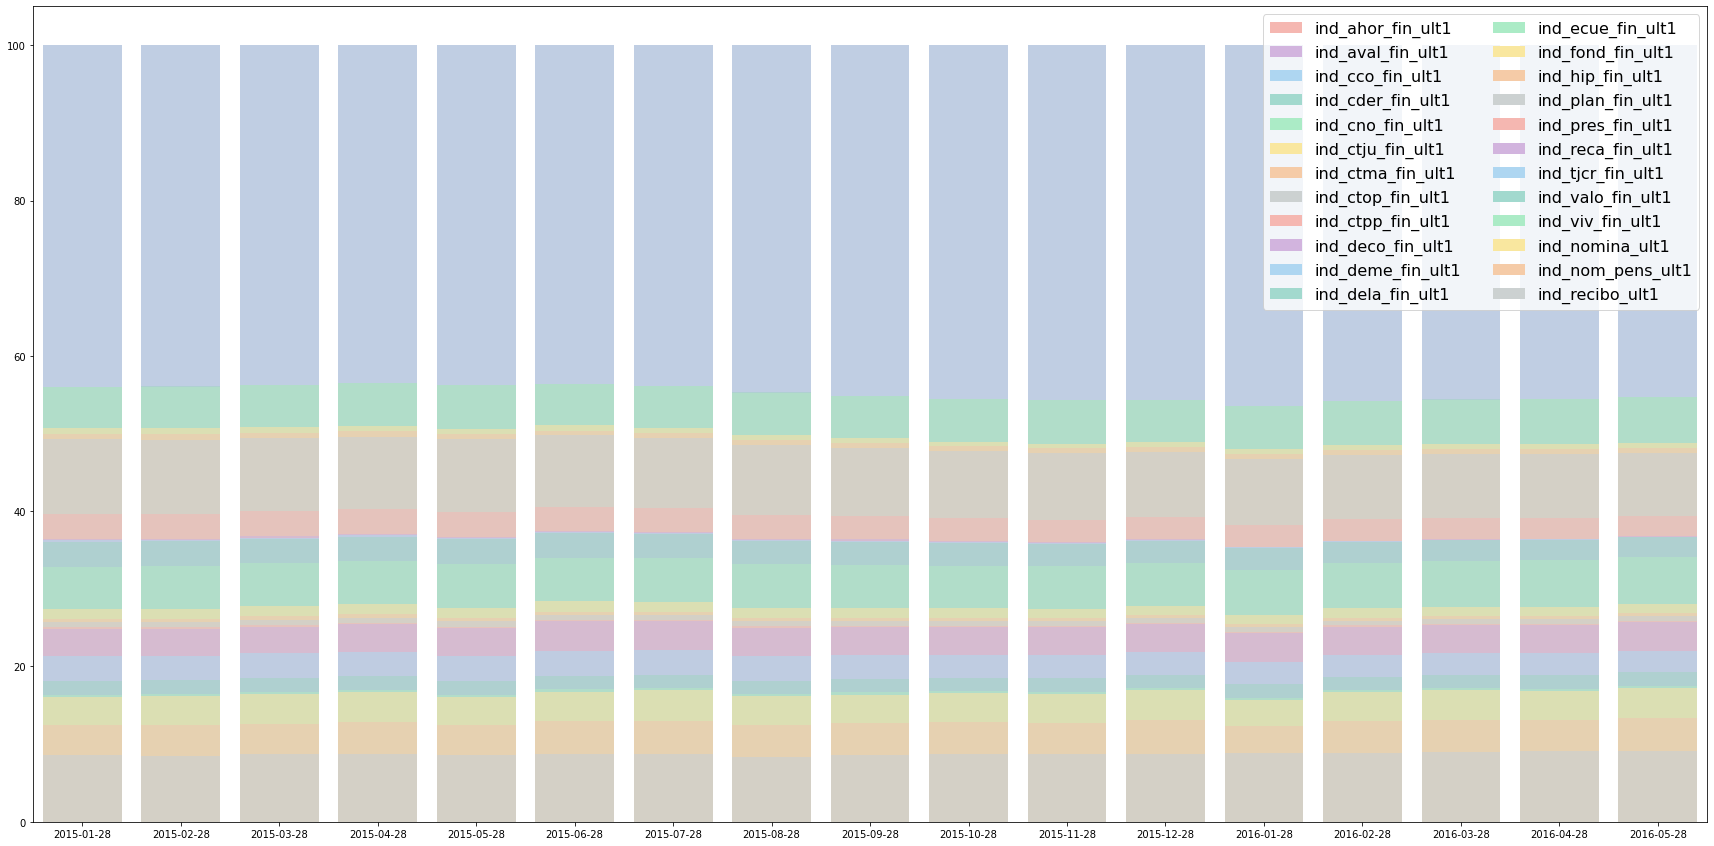

In [ ]:
# label_sum_over_time의 값을 퍼센트 단위로 변환한다.
label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0)))*100
months = trn['fecha_dato'].unique().tolist()

# 앞선 코드와 동일한, 시각화 실행 코드
f, ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
  sns.barplot(x=months, y=label_sum_percent[i], color=color_list[i%8], alpha=0.7)

plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor='none') for i in range(len(label_cols))], 
           label_cols, loc=1, ncol=2, prop={'size':16})

* 가장 보유량이 많다고 표시되는 'ind_cco_fin_ult1'이 항상 높은 것을 제외하고는 시각적으로 표현해도 패턴을 찾아내기 어렵다.

####데이터 분석의 목적을 잊지 않기

* 탐색적 데이터 분석은 데이터 속에 흩어져 있는 의미를 찾아내는 노동집약적 작업이다. 하지만 자칫하다 무의미한 분석 방법을 위해 코딩을 하게될 수 있다는 것이다.
* 무엇을 시각화 해야할지, 무엇을 분석해야 할지 정답을 알기 어렵다.
* 이 때, 예측을 위해 제공되는 변수(고객에 대한 변수)보다는 예측해야하는 변수(금융 제품 변수)을 올바르게 분석하고, 이해도를 높이는게 더 중요하다.
* 다음 세가지를 위한 분석을 해보자
  * 데이터 기초 통계와 시각화를 통해 데이터를 직접 눈으로 보기
  * 변수 아이디어를 찾아내기
  * 예측 변수 24개에 대한 특징 찾아내기

### 예측의 본질 되새기기

* 사실 위에서 알아본 막대 그래프는 고객들이 보유한 제품의 총 보유량이다.
* 정말 예측하고자 하는 대상이 총 보유량이 아닌 신규 등록 제품에 대한 것 임으로 알아야한다.
* 이를 위해 달이 바뀌면서 새로 등록된 데이터에 대한 정보를 추출하기 위한 코드가 필요하다.

In [ ]:
import pandas as pd
import numpy as np

# 훈련 데이터를 읽어온다.
train_df = pd.read_csv('/content/train_ver2.csv')

# 데이터 크기를 줄인다
frac = 1./100
train_df = train_df.sample(frac=frac, random_state=42)
train_df_date = train_df['fecha_dato']
train_df_date = pd.DataFrame(train_df_date.columns=['fecha_dato'])
cate_cols = [col for col in train_df.columns if train_df[col].dtype in ['int64','float64']]
for col in cate_cols:
    if train_df[col].dtype == 'int64':
        train_df[col] = train_df[col].astype(np.int8)
    else:
        train_df[col] = train_df[col].astype(np.float32)
# 제품 변수를 prods에 list형태로 저장한다.
prods = train_df.columns[24:].tolist()

# 날짜를 숫자로 변환하는 함수
def date_to_int(str_date):
    Y, M, D = [int(a) for  a in str_date.strip().split('-')]
    int_date = (int(Y) - 2015)*12 + int(M)
    return int_date

# 변환한 날짜를 int_data에 저장
train_df['int_date'] = train_df['fecha_dato'].map(date_to_int).astype(np.int8)

# 데이터를 복사하고 int_dat 날짜에 1을 더하여 lag를 생성, 변수명에 _prev를 추가
train_df_lag = train_df.copy()
train_df_lag['int_date'] += 1
train_df_lag.columns = [col + '_prev' if col not in ['ncodpers', 'int_date'] else col for col in train_df.columns]

# 원본 데이터와 lag 데이터를 ncodper와 int_date 기준으로 합친다.
# lag 데이터의 int_date는 1 밀려 있기 때문에 저번 달의 제품 정보가 삽입된다.
new_df = train_df.merge(train_df_lag, on=['ncodpers','int_date'], how='left')

# 메모리 효율을 위해 불필요한 변수를 메모리에서 제거
del train_df, train_df_lag

# 저번 달의 제품 정보가 존재하지 않을 경우를 대비하여 0으로 대체
for prod in prods:
  prev = prod + '_prev'
  new_df[prev].fillna(0, inplace=True)

# 원본 데이터에서의 제품 보유 여부 - lag데이터에서의 제품 보유 여부를 비교하여 신규 구매 변수 padd를 구함
for prod in prods:
  padd = prod + '_add'
  prev = prod + '_prev'
  new_df[padd] = ((new_df[prod]==1) & (new_df[prev] == 0)).astype(np.int8)

# 신규 구매 변수만을 추출하여 labels에 저장
add_cols = [prod + '_add' for prod in prods]
labels = new_df[add_cols].copy()
labels.columns = prods
labels.to_csv('/content/labels.csv', index=False)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


KeyError: ignored

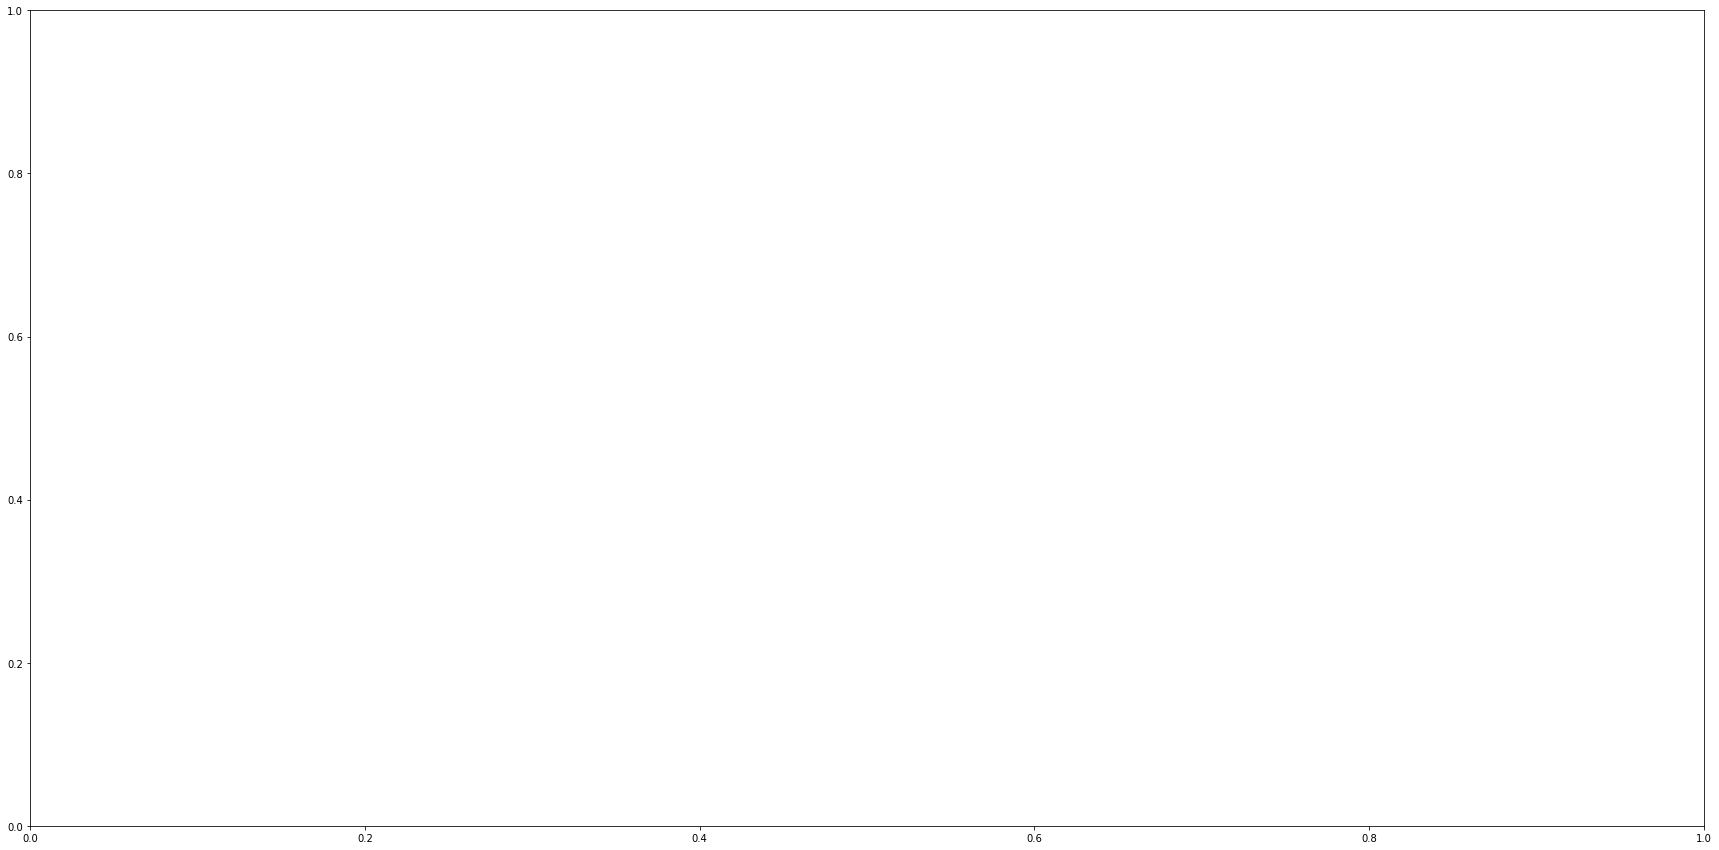

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

labels = pd.read_csv('/content/labels.csv').astype(int)

labels['date'] = train_df_date
months = np.unique(train_df_date).tolist()

label_cols = labels.columns.tolist()[:24]

label_over_time = []
for i in range(len(label_cols)):
  label_over_time.append(labels.groupby(['date'])[label_cols[i]].agg('sum').tolist())

label_sum_over_time = []
for i in range(len(label_cols)):
  label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))

color_list = ['#F5B7B1', '#D2B4DE', '#AED6F1', '#A2D9CE', '#ABEBC6', '#F9E79F', '#F5CBA7', '#CCD1D1']

f, ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
  # 24개 제품에 대하여 Histogram을 그린다.
  # x축에는 월 데이터, y 축에는 누적 총합, 색깔은 8개를 번갈아 가며 사용하며, 그림의 alpha값은 0.7로 지정
  sns.barplot(x=months, y=label_sum_over_time[i], color=color_list[i%8], alpha=0.7)

# 우측 상단에 Legend를 추가
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor='none') for i in range(len(label_cols))], 
           label_cols, loc=1, ncol=2, prop={'size':16})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


KeyError: ignored

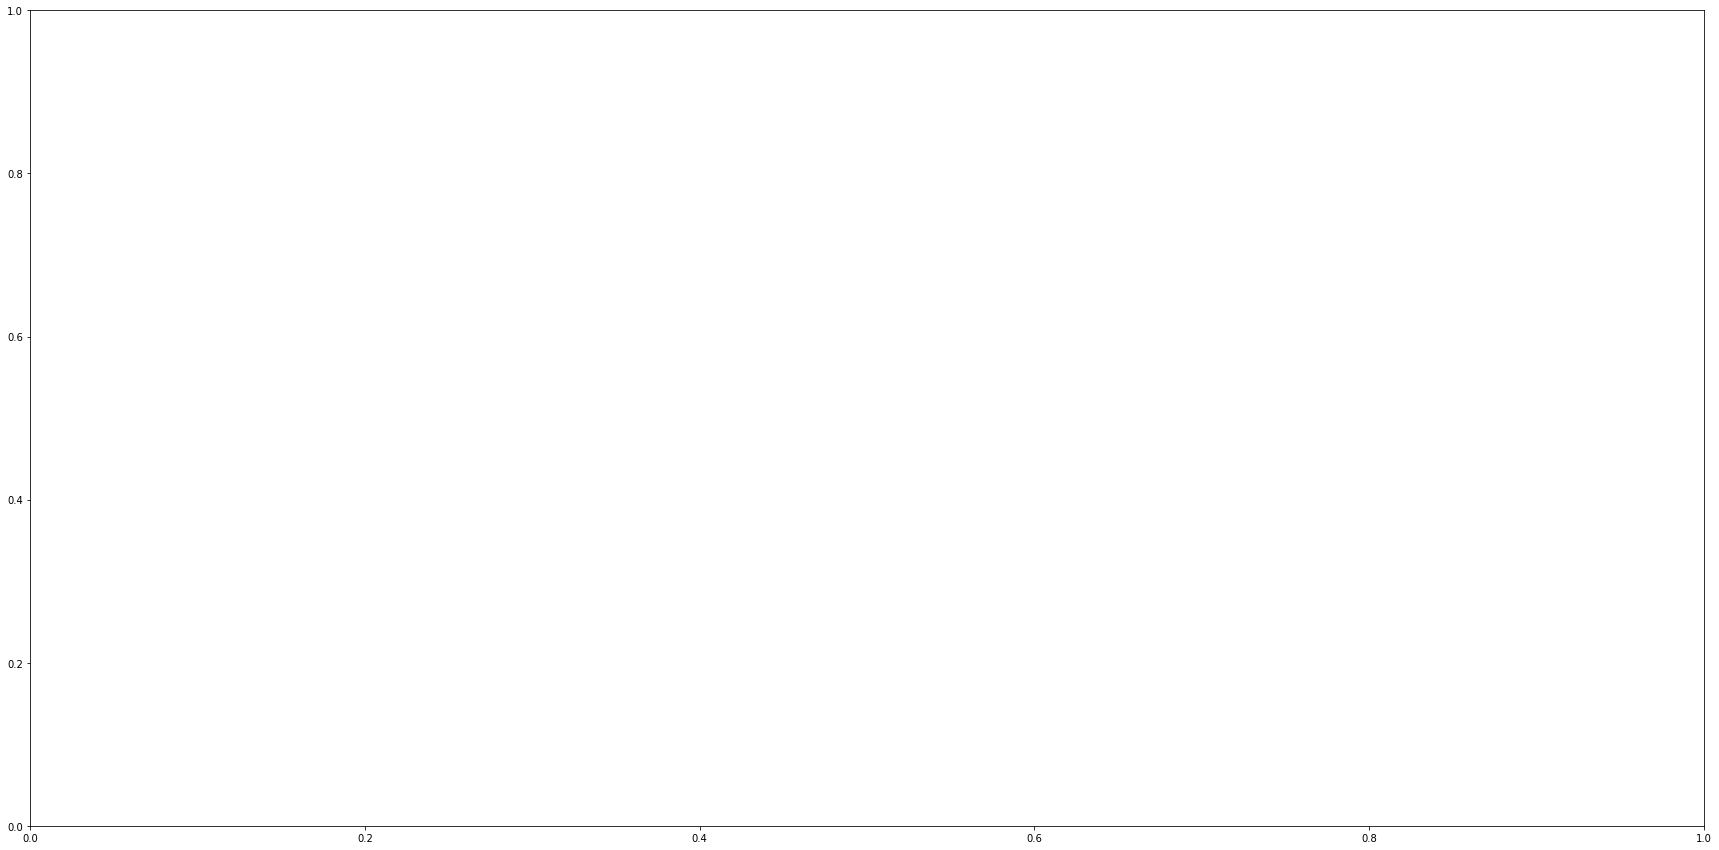

In [ ]:
# 24개 금융 제품에 대한 '신규 구매' 데이터를 생성하기

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 훈련 데이터를 읽어온다

train_df = pd.read_csv('train_ver2.csv')

# 데이터 크기를 줄인다
frac = 1./50
train_df = train_df.sample(frac=frac, random_state=42)
fecha_dato = train_df['fecha_dato'].copy()
fecha_dato = pd.DataFrame(fecha_dato,columns=['fecha_dato'])

cate_cols = [col for col in train_df.columns if train_df[col].dtype in ['int64','float64']]
for col in cate_cols:
    if train_df[col].dtype == 'int64':
        train_df[col] = train_df[col].astype(np.int8)
    else:
        train_df[col] = train_df[col].astype(np.float32)

# 제품 변수를 prods에 list형태로 저장한다
prods = train_df.columns[24:].tolist()

# 날짜를 숫자로 변환하는 함수이다. 2015-01-28은 1, 2016-06-28은 18로 변환된다
def date_to_int(str_date):
    Y, M, D = [int(a) for  a in str_date.strip().split('-')]
    int_date = (int(Y) - 2015)*12 + int(M)
    return int_date

# 날짜를 숫자로 변환하여 int_date에 저장한다
train_df['int_date'] = train_df['fecha_dato'].map(date_to_int).astype(np.int8)

# 데이터를 복사하고, int_date 날짜에 1을 더하여 lag를 생성한다. 변수명에 _prev를 추가한다
train_df_lag = train_df.copy()
train_df_lag['int_date'] += 1
train_df_lag.columns = [col + '_prev' if col not in ['ncodpers', 'int_date'] else col for col in train_df.columns]


new_df = pd.merge(train_df,train_df_lag, on=['ncodpers','int_date'], how='left')

# 메모리 효율을 위해 불필요한 변수를 메모리에서 제거한다
del train_df, train_df_lag

# 저번 달의 제품 정보가 존재하지 않을 경우를 대비하여 0으로 대체한다
for prod in prods:
    prev = prod + '_prev'
    new_df[prev].fillna(0, inplace=True)

# 원본 데이터에서 제품 보유 여부 - lag 데이터에서의 제품 보유 여부를 비교하여
# 신규 구매 변수 product_add를 구한다
for prod in prods:
    product_add = prod + '_add'
    prev = prod + '_prev'
    new_df[product_add] = ((new_df[prod]==1) & (new_df[prev] == 0)).astype(np.int8)

# 신규 구매 변수만을 추출하여 labels에 저장한다
add_cols = [prod + '_add' for prod in prods]
labels = new_df[add_cols].copy()
labels.columns = prods

labels['date'] = fecha_dato['fecha_dato']
months = np.unique(fecha_dato['fecha_dato']).tolist()
label_cols = labels.columns.tolist()[:24]

label_over_time = []
for i in range(len(label_cols)):
    label_over_time.append(labels.groupby(['date'])[label_cols[i]].agg('sum').tolist())

label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))

color_list = ['#F5B7B1','#D2B4DE','#AED6F1','#A2D9CE','#ABEBC6','#F9E79F','#F5CBA7','#CCD1D1']

f, ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
    sns.barplot(x=months, 
                y=label_sum_over_time[i], 
                color=color_list[i%8], 
                alpha=0.7)

plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8],edgecolor = 'none') for i in range(len(label_cols))], label_cols, loc=1,ncol=2,prop={'size':16})

첫 달인 2015-05-28의 신규 구매 숫자가 압도적인 이유는 데이터의 첫달에 모든 보유 제품이 신규 구매로 인식되기 때문이다.   
다른 달의 신규 구매 횟수를 더 자세히 보기 위해, 상대값 기준으로 다시 시각화

KeyError: ignored

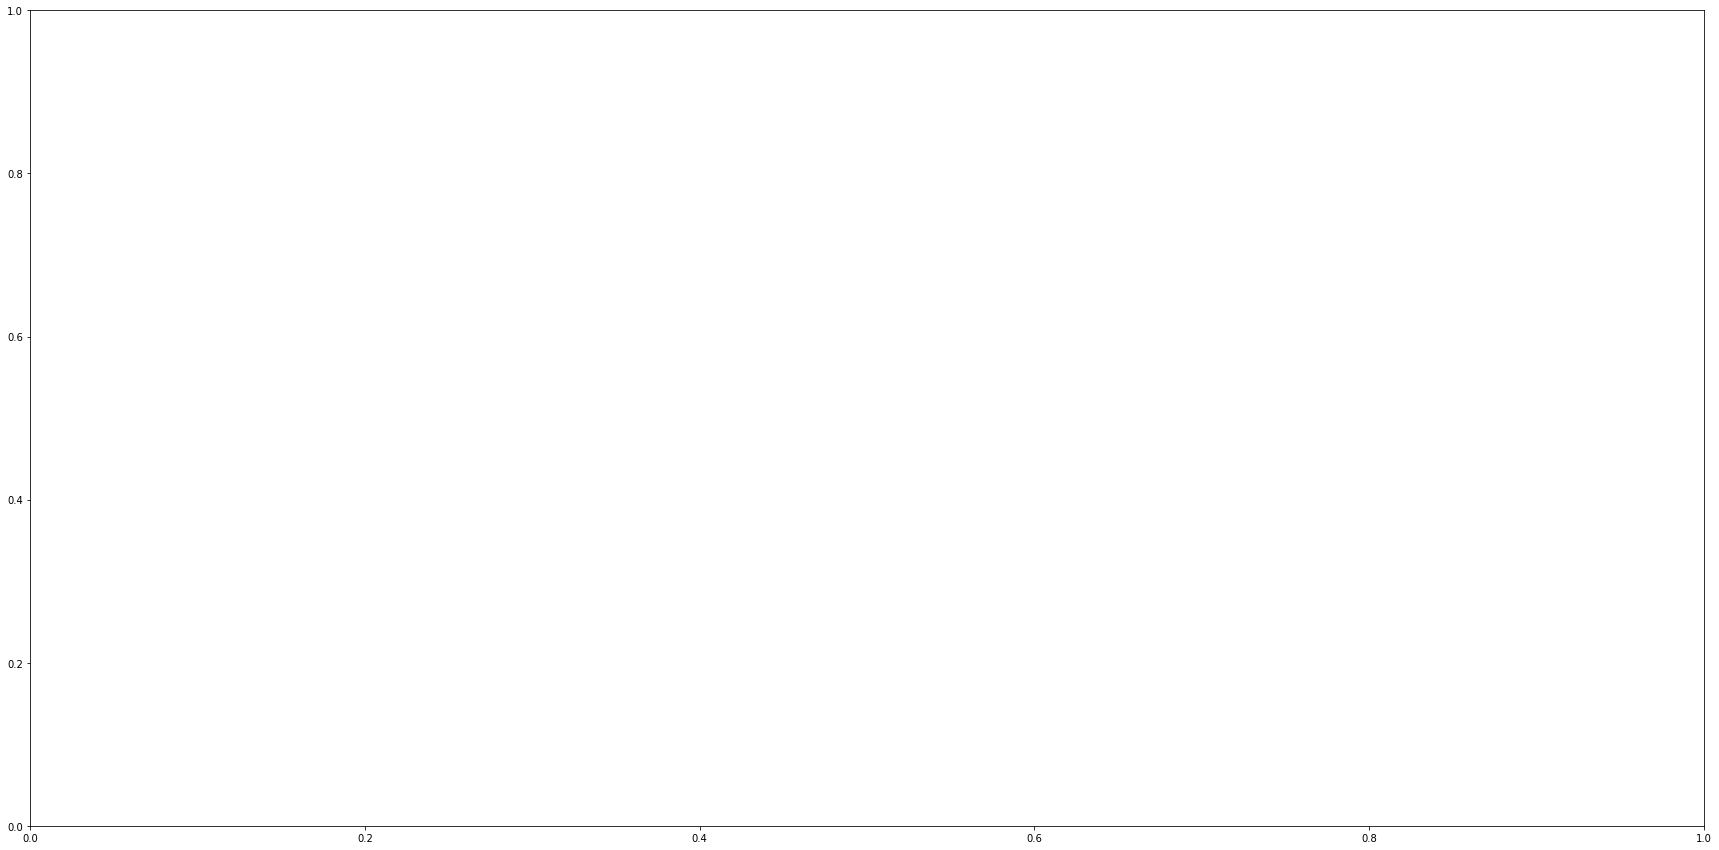

In [ ]:
# label_sum_over_time의 값을 퍼센트 단위로 변환한다.
label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0)))*100


# 앞선 코드와 동일한, 시각화 실행 코드
f, ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
  sns.barplot(x=months, y=label_sum_percent[i], color=color_list[i%8], alpha=0.7)

plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor='none') for i in range(len(label_cols))], 
           label_cols, loc=1, ncol=2, prop={'size':16})

발견된 패턴
* 당좌 예금(ind_cco_fin_ult1, 위에서 첫번째 영역)은 8월 여름에 가장 높은 값을 가지며 겨울에는 축소되는 계절 추이를 보임
* 단기 예금(ind_deco_fin_ult1) 은 2015-06-28에 특이하게 높은 값을 가지며, 다른 시기에는 매우 낮음
* 급여, 연금(ind_nomina_ult1, ind_nom_pens_ult1)은 당좌 예금과 반대로 8월 여름에 가장 낮은 값을 가지며 2016년 겨울에 가장 높은 값을 가짐
* 신규 구매 빈도가 가장 높은 상위 5개 금융 제품은 당좌 예금, 신용 카드, 급여, 연금 그리고 직불카드(ind_cco_fin_ult1, ind_tjcr_fin_ult1, ind_nomina_ult1, ind_nom_pens_ult1, ind_recibo_fin_ult1)이다.
이렇게 단순 고객의 금융 제품 보유 총합을 나타낸 앞선 그래프와 다르게 계절 추이들이 뚜렷하게 관찰된다.

추가 결정 사항
* 계절성에 맞춰 따로 모델을 구성할 것인지, 계절의 변동성을 모델링하는 하나의 모델을 구성할 것인지 선택
* 가장 좋은 방법은 성능이 좋은 방법을 선택하는 것
* 실무에서는 계절별로 구축하여 성능 개선폭과, 다수의 모델을 실시간으로 운영하는 비용 및 리스크를 비교하며 결정

### 탐색적 데이터 분석 요약

탐색적 데이터 분석의 두 가지 작업
1. 기초 통계를 통하여 Raw Data를 분석하는 방법
2. 시각화를 통해 Raw Data를 분석하는 방법

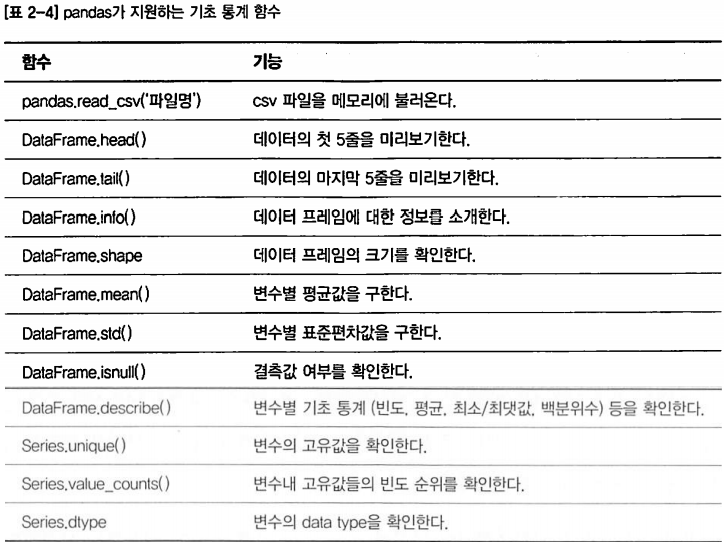

In [ ]:
Image('/content/drive/My Drive/DeepLearning/머신러닝 탐구생활/images/pandas_func.png', width=600)

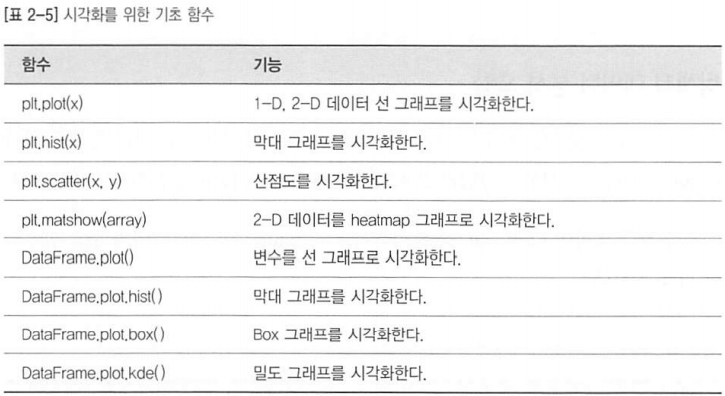

In [ ]:
Image('/content/drive/My Drive/DeepLearning/머신러닝 탐구생활/images/plt_func.png', width=600)

###훈련 / 테스트 데이터 설명

데이터의 기초 분석 결과

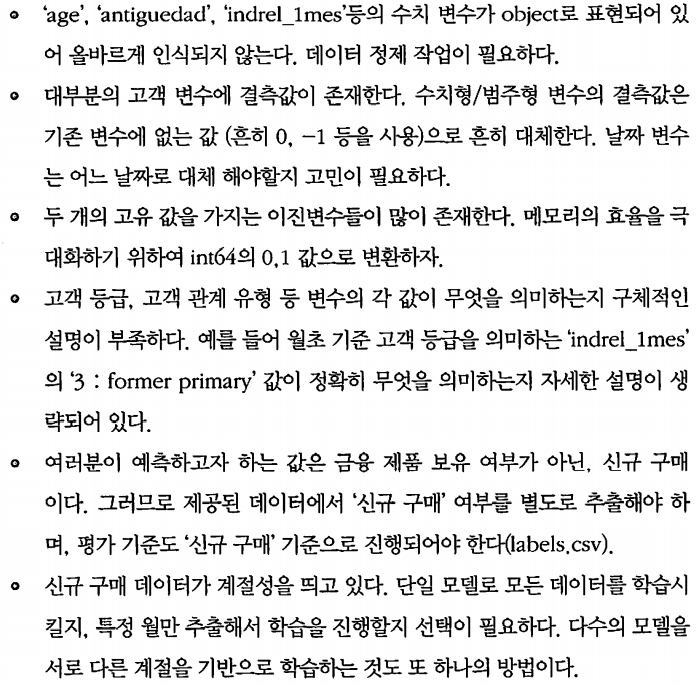

In [ ]:
Image('/content/drive/My Drive/DeepLearning/머신러닝 탐구생활/images/basic.png', width=500)

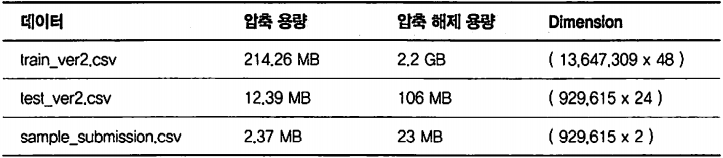

In [ ]:
Image('/content/drive/My Drive/DeepLearning/머신러닝 탐구생활/images/data_and_dimension.png', width=600)

#2.7 Baseline 모델

산탄데르 제품 추천 경진대회에 사용할 Baseline 모델을 구축한다.

**Tabular 데이터를 다루는 캐글 경진대회에서의 머신러닝 파이프라인의 순서**
1. 데이터 전처리
2. 피처 엔지니어링
3. 머신러닝 모델 학습
4. 테스트 데이터 예측 및 캐글 업로드

In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c santander-product-recommendation
!unzip /content/sample_submission.csv.zip
!unzip /content/test_ver2.csv.zip
!unzip /content/train_ver2.csv.zip

##(1) 데이터 전처리

* 제품 변수의 결측값을 0으로 대체, 제품 보유 여부에 대한 정보가 없으면 보유하지 않는다고 가정
* 훈련 데이터와 테스트 데이터를 통합한다.
  * 훈련 데이터와 테스트 데이터는 날짜 변수(fecha_dato)로 쉽게 구분된다.
  * 동일한 24개의 고객 변수를 공유하며 테스트 데이터에 없는 24개의 제품 변수는 0으로 채운다.
* 범주형, 수치형 데이터를 전처리한다.
  * 범주형 데이터는 .factorize()를 통해 Label Encoding을 수행한다.
  * 데이터 타입이 object로 표현되는 수치형 데이터에서는 .unique()를 통해 특이값들을 대체하거나 제거, 정수형 데이터로 변환
* 추후, 모델 학습에 사용할 변수 이름을 features 리스트에 미리 담는다.

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import gc

np.random.seed(2018)

# 데이터를 불러온다.
trn = pd.read_csv('/content/train_ver2.csv')
tst = pd.read_csv('/content/test_ver2.csv')

## 데이터 전처리 ##

# 제품 변수를 별도로 저장해 놓는다.
prods = trn.columns[24:].tolist()

# 제품 변수 결측값을 미리 0으로 대체한다.
trn[prods] = trn[prods].fillna(0.0).astype(np.int8)

# 24개 제품 중 하나도 보유하지 않은 고객 데이터를 제거한다.
no_product = trn[prods].sum(axis=1) == 0
trn = trn[~no_product]

# 훈련 데이터와 테스트 데이터를 통합한다. 테스트 데이터에 없는 제품 변수는 0으로 채운다.
for col in trn.columns[24:]:
  tst[col] = 0
df = pd.concat([trn, tst], axis=0)

# 학습에 사용할 변수를 담는 list
features = []

# 범주형 변수를 .factorize() 함수를 통해 label encoding한다.
categorical_cols = ['ind_empleado', 'pais_residencia', 'sexo', 'tiprel_1mes', 'indresi',
                    'indext', 'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'nomprov', 'segmento']
for col in categorical_cols:
  df[col], _ = df[col].factorize(na_sentinel=-99)
features += categorical_cols

# 수치형 변수의 특이값과 결측값을 -99로 대체하고, 정수형으로 변환한다.
df['age'].replace(' NA', -99, inplace=True)
df['age'] = df['age'].astype(np.int8)

df['antiguedad'].replace('     NA', -99, inplace=True)
df['antiguedad'] = df['antiguedad'].astype(np.int8)

df['renta'].replace('         NA', -99, inplace=True)
df['renta'].fillna(-99, inplace=True)
df['renta'] = df['renta'].astype(float).astype(np.int8)

df['indrel_1mes'].replace('P', 5, inplace=True)
df['indrel_1mes'].fillna(-99, inplace=True)
df['indrel_1mes'] = df['indrel_1mes'].astype(float).astype(np.int8)

# 학습에 사용할 수치형 변수를 features에 추구한다.
features += ['age', 'antiguedad', 'renta', 'ind_nuevo', 'indrel', 'indrel_1mes', 'ind_actividad_cliente']

# 가비지 컬렉션
gc.collect()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##(2) 피처 엔지니어링

피처 엔지니어링에서는 머신러닝 모델 학습에 사용할 **파생 변수**를 생성한다.   
Baseline 모델에서는 24개 고객변수, 4개 날짜 기반 파생변수 그리고 24개의 lag-1 변수를 사용한다.

In [ ]:
# (피처 엔지니어링) 두 날짜 변수에 연도와 월 정보를 추출한다.
df['fecha_alta_month'] = df['fecha_alta'].map(lambda x: 0.0 
      if x.__class__ is float else float(x.split('-')[1])).astype(np.int8)
df['fecha_alta_year'] = df['fecha_alta'].map(lambda x: 0.0 
      if x.__class__ is float else float(x.split('-')[0])).astype(np.int16)
features += ['fecha_alta_month', 'fecha_alta_year']

df['ult_fec_cli_1t_month'] = df['ult_fec_cli_1t'].map(lambda x: 0.0 
      if x.__class__ is float else float(x.split('-')[1])).astype(np.int8)
df['ult_fec_cli_1t_year'] = df['ult_fec_cli_1t'].map(lambda x: 0.0 
      if x.__class__ is float else float(x.split('-')[0])).astype(np.int16)
features += ['ult_fec_cli_1t_month', 'ult_fec_cli_1t_year']

# 그 외 변수의 결측값은 모두 -99로 대체한다.
df.fillna(-99, inplace=True)

# (피처 엔지니어링) lag-1 데이터를 생성한다.

# 날짜를 숫자로 변환하는 함수이다. 2015-01-28은 1, 2016-06-28은 18로 변환
def date_to_int(str_date):
    Y, M, D = [int(a) for  a in str_date.strip().split('-')]
    int_date = (int(Y) - 2015)*12 + int(M)
    return int_date

# 변환한 날짜를 int_data에 저장
df['int_date'] = df['fecha_dato'].map(date_to_int).astype(np.int8)

# 데이터를 복사하고 int_dat 날짜에 1을 더하여 lag를 생성, 변수명에 _prev를 추가
df_lag = df.copy()
df_lag['int_date'] += 1
df_lag.columns = [col + '_prev' if col not in ['ncodpers', 'int_date'] else col for col in df.columns]

# 원본 데이터와 lag 데이터를 ncodper와 int_date 기준으로 합친다.
# lag 데이터의 int_date는 1 밀려 있기 때문에 저번 달의 제품 정보가 삽입된다.
df_trn = df.merge(df_lag, on=['ncodpers','int_date'], how='left')

# 메모리 효율을 위해 불필요한 변수를 메모리에서 제거한다.
del df, df_lag

# 저번 달의 제품 정보가 존재하지 않을 경우를 대비하여 0으로 대체한다.
for prod in prods:
  prev = prod + '_prev'
  df_trn[prev].fillna(0, inplace=True)
df_trn.fillna(-99, inplace=True)

# lag-1 변수를 추가한다.
features += [feature + '_prev' for feature in features]
features += [prod + '_prev' for prod in prods]

###
### Baseline 모델 이후, 다양한 피처 엔지니어링을 추가한다.
###

##(3) 머신러닝 모델 학습

###**[교차 검증]**

경진대회 진행 중에는 하루에 최대 5개의 예측 결과물을 캐글에 제출할 수 이는데    
이는 학습하는 모델의 성능 개선 여부를 하루 5번 밖에 확인할 수 밖에 없다는 뜻이다.    
그러므로 올바른 교차 검정 과정을 통해 제한 없이 다양한 아이디어를 실험해야 한다.

모델 간소화를 위해 4개월치 데이터를 훈련, 1개월치 데이터를 검증 데이터로 사용한다.

In [ ]:
## 모델 학습
# 학습을 위하여 데이터를 훈련, 테스트용으로 분리한다.
# 학습에는 2016-01-28 ~ 2016-04-28 데이터만 사용하고, 검증에는 2016-05-28 데이터를 사용한다.

use_dates = ['2016-01-28', '2016-02-28', '2016-03-28', '2016-04-28', '2016-05-28']
trn = df_trn[df_trn['fecha_dato'].isin(use_dates)]
tst = df_trn[df_trn['fecha_dato'] == '2016-06-28']
del df_trn

# 훈련 데이터에서 신규 구매 건수만 추출한다.
X = []
Y = []
for i, prod in enumerate(prods):
    prev = prod + '_prev'
    prX = trn[(trn[prod] == 1) & (trn[prev] == 0)]
    prY = np.zeros(prX.shape[0], dtype=np.int8) + i
    X.append(prX)
    Y.append(prY)
XY = pd.concat(X)
Y = np.hstack(Y)
XY['y'] = Y

# 훈련, 검증 데이터로 분리한다. 
vld_date = '2016-05-28'
XY_trn = XY[XY['fecha_dato'] != vld_date]
XY_vld = XY[XY['fecha_dato'] == vld_date]

###**[모델]**

XGBoost 모델 사용 - 대부분의 캐글 상위 입상자들이 사용하는 모델  
`XGBoost에서 많이 사용하는 파라미터`
* max_depth : 트리 모델의 최대 깊이를 의미, 값이 높을 수록 복잡한 트리 모델 생성
* eat : 딥러닝의 learning rate와 같은 개념, 0과 1사이 값을 가짐
* colsample_bytree : 트리를 생성할 때 훈련 데이터에서 변수를 샘플링 해주는 비율(교차 검증 데이터 비율)
* colsample_bylevel : 트리의 레벨 별로 훈련 데이터의 변수를 샘플링 해주는 비율

`하지만 투자 대비 효율을 위해서 하이퍼파라미터 튜닝보다 피처 엔지니어링에 힘을 쓰자`

In [ ]:
# XGBoost 모델 parameter를 설정한다.
param = {
    'booster': 'gbtree',
    'max_depth': 8,
    'nthread': 4,
    'num_class': len(prods),
    'objective': 'multi:softprob',
    'silent': 1,
    'eval_metric': 'mlogloss',
    'eta': 0.1,
    'min_child_weight': 10,
    'colsample_bytree': 0.8,
    'colsample_bylevel': 0.9,
    'seed': 2018,
    }

# 훈련, 검증 데이터를 XGBoost 형태로 변환한다.
X_trn = XY_trn[features].values
Y_trn = XY_trn[['y']].values
dtrn = xgb.DMatrix(X_trn, label=Y_trn, feature_names=features)

X_vld = XY_vld[features].values
Y_vld = XY_vld[['y']].values
dvld = xgb.DMatrix(X_vld, label=Y_vld, feature_names=features)

# XGBoost 모델을 훈련 데이터로 학습한다!
watch_list = [(dtrn, 'train'), (dvld, 'eval')]
model = xgb.train(param, dtrn, num_boost_round=1000, evals=watch_list, early_stopping_rounds=20)

# 학습한 모델을 저장한다.
import pickle
pickle.dump(model, open("../model/xgb.baseline.pkl", "wb"))
best_ntree_limit = model.best_ntree_limit